# Temperature Forecast Project using ML

# Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.

# Attribute Information:

**For more information, read [Cho et al, 2020].**

1. station - used weather station number: 1 to 25

2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')

3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6

4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9

5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5

6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100

7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5

8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6

9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9

10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4

11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97

12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97

13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98

14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97

15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7

16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6

17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8

18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7

19. lat - Latitude (Â°): 37.456 to 37.645

20. lon - Longitude (Â°): 126.826 to 127.135

21. DEM - Elevation (m): 12.4 to 212.3

22. Slope - Slope (Â°): 0.1 to 5.2

23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9

24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9

25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

**You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.**


# Dataset Link-

https://github.com/dsrscientist/Dataset2/blob/main/temperature.csv

# Answer:-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Dataset2/main/temperature.csv')
df

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  30-06-2013          28.7          21.4    58.255688   
1         2.0  30-06-2013          31.9          21.6    52.263397   
2         3.0  30-06-2013          31.6          23.3    48.690479   
3         4.0  30-06-2013          32.0          23.4    58.239788   
4         5.0  30-06-2013          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   
1       90.604721         29.850689         24.035009   5.691890   51.937448   
2       83.973587         30.091292         24.565633   6.138224   20.573050   
3       96.483688         29.704629         23.326177   5.650050   65.727144   
4       90.155128         29.113934         23.486480   5.735004  107.965535   
...           ...               ...               ...        ...         ...   
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
0     ...    0.000000    0.000000    0.000000  37.6046  126.991  212.3350   
1     ...    0.000000    0.000000    0.000000  37.6046  127.032   44.7624   
2     ...    0.000000    0.000000    0.000000  37.5776  127.058   33.3068   
3     ...    0.000000    0.000000    0.000000  37.6450  127.022   45.7160   
4     ...    0.000000    0.000000    0.000000  37.5507  127.135   35.0380   
...   ...         ...         ...         ...      ...      ...       ...   
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
0     2.785000      5992.895996       29.1       21.2  
1     0.514100      5869.312500       30.5       22.5  
2     0.266100      5863.555664       31.1       23.9  
3     2.534800      5856.964844       31.7       24.3  
4     0.505500      5859.552246       31.2       22.5  
...        ...              ...        ...        ...  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[7752 rows x 25 columns]

# Exploratory Data Analysis(EDA)

In [3]:
#Checking all columns that are present in my dataset
df.columns.to_list()

['station',
 'Date',
 'Present_Tmax',
 'Present_Tmin',
 'LDAPS_RHmin',
 'LDAPS_RHmax',
 'LDAPS_Tmax_lapse',
 'LDAPS_Tmin_lapse',
 'LDAPS_WS',
 'LDAPS_LH',
 'LDAPS_CC1',
 'LDAPS_CC2',
 'LDAPS_CC3',
 'LDAPS_CC4',
 'LDAPS_PPT1',
 'LDAPS_PPT2',
 'LDAPS_PPT3',
 'LDAPS_PPT4',
 'lat',
 'lon',
 'DEM',
 'Slope',
 'Solar radiation',
 'Next_Tmax',
 'Next_Tmin']

In [4]:
#Checking for duplicated row in the Dataset
df.duplicated().sum()

0

**Here you can see no duplicate row is present in this dataset.**

In [5]:
#Checking the dimension of the dataset
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

**Observation:-**

*Here you can see all columns are float type and only Date is object type*

In [6]:
df.shape

(7752, 25)

**Here you can see our dataset has 7752 rows and 25 columns.**

In [7]:
#Checking null values for each columns
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

**Here you can see most of the columns has nan values and I will fill these nan values. So I will use median method to fill all the columns except station ,Date,Next_Tmax and Next_Tmin.For Next_Tmax and Next_Tmin columns I will use back fill method.**

In [8]:
#Filling nan values 
df["Present_Tmax"].fillna(round(df["Present_Tmax"].median(),1),inplace=True)
df["Present_Tmin"].fillna(round(df["Present_Tmin"].median(),1),inplace=True)
df["LDAPS_RHmin"].fillna(round(df["LDAPS_RHmin"].median(),3),inplace=True)
df["LDAPS_RHmax"].fillna(round(df["LDAPS_RHmax"].median(),3),inplace=True)
df["LDAPS_Tmax_lapse"].fillna(round(df["LDAPS_Tmax_lapse"].median(),3),inplace=True)
df["LDAPS_Tmin_lapse"].fillna(round(df["LDAPS_Tmin_lapse"].median(),3),inplace=True)
df["LDAPS_WS"].fillna(round(df["LDAPS_WS"].median(),4),inplace=True)
df["LDAPS_LH"].fillna(round(df["LDAPS_LH"].median(),3),inplace=True)
df["LDAPS_CC1"].fillna(round(df["LDAPS_CC1"].median(),4),inplace=True)
df["LDAPS_CC2"].fillna(round(df["LDAPS_CC2"].median(),4),inplace=True)
df["LDAPS_CC3"].fillna(round(df["LDAPS_CC3"].median(),4),inplace=True)
df["LDAPS_CC4"].fillna(round(df["LDAPS_CC4"].median(),4),inplace=True)
df["LDAPS_PPT1"].fillna(round(df["LDAPS_PPT1"].median(),4),inplace=True)
df["LDAPS_PPT2"].fillna(round(df["LDAPS_PPT2"].median(),4),inplace=True)
df["LDAPS_PPT3"].fillna(round(df["LDAPS_PPT3"].median(),4),inplace=True)
df["LDAPS_PPT4"].fillna(round(df["LDAPS_PPT4"].median(),4),inplace=True)

In [9]:
#Checking for null values again
df.isnull().sum()

station              2
Date                 2
Present_Tmax         0
Present_Tmin         0
LDAPS_RHmin          0
LDAPS_RHmax          0
LDAPS_Tmax_lapse     0
LDAPS_Tmin_lapse     0
LDAPS_WS             0
LDAPS_LH             0
LDAPS_CC1            0
LDAPS_CC2            0
LDAPS_CC3            0
LDAPS_CC4            0
LDAPS_PPT1           0
LDAPS_PPT2           0
LDAPS_PPT3           0
LDAPS_PPT4           0
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

**Observation:-** 

*So here you can see most of the null values I filled.So now I will fill the Next_Tmax and Next_Tmin and for now I Skipped the station and Date column.The reason I will tell later.* 

In [10]:
#Filling Next_Tmax and Next_Tmin column
df["Next_Tmax"].fillna(method="bfill",inplace=True)
df["Next_Tmin"].fillna(method="bfill",inplace=True)

In [11]:
#Checking the null value again
df.isnull().sum()

station             2
Date                2
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

**Now you can see only station and Date column has 2 nan values.Less investigate these two columns null valus:**

In [12]:
#Checking the rows for station column where nan values are present
df[df["station"].isna()==True]

station Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
7750      NaN  NaN          20.0          11.3    19.794666    58.936283   
7751      NaN  NaN          37.6          29.9    98.524734   100.000153   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  ...  \
7750         17.624954         14.272646   2.882580  -13.603212  ...   
7751         38.542255         29.619342  21.857621  213.414006  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon      DEM     Slope  \
7750    0.000000    0.000000    0.000000  37.4562  126.826   12.370  0.098475   
7751   21.621661   15.841235   16.655469  37.6450  127.135  212.335  5.178230   

      Solar radiation  Next_Tmax  Next_Tmin  
7750      4329.520508       17.4       11.3  
7751      5992.895996       38.9       29.8  

[2 rows x 25 columns]

**Here you can see in station column 7750 and 7751 has nan value and these row locations are also same for Date column nan value.Let's check their last 5 rowa for this dataset.**

In [13]:
df.tail()

station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7747     23.0  30-08-2017          23.3          17.1    26.741310   
7748     24.0  30-08-2017          23.3          17.7    24.040634   
7749     25.0  30-08-2017          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
7747    78.869858         26.352081         18.775678   6.148918   72.058294   
7748    77.294975         27.010193         18.733519   6.542819   47.241457   
7749    77.243744         27.939516         18.522965   7.289264    9.090034   
7750    58.936283         17.624954         14.272646   2.882580  -13.603212   
7751   100.000153         38.542255         29.619342  21.857621  213.414006   

      ...  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM  \
7747  ...    0.000000    0.000000    0.000000  37.5372  126.891   15.5876   
7748  ...    0.000000    0.000000    0.000000  37.5237  126.909   17.2956   
7749  ...    0.000000    0.000000    0.000000  37.5237  126.970   19.5844   
7750  ...    0.000000    0.000000    0.000000  37.4562  126.826   12.3700   
7751  ...   21.621661   15.841235   16.655469  37.6450  127.135  212.3350   

         Slope  Solar radiation  Next_Tmax  Next_Tmin  
7747  0.155400      4443.313965       28.3       18.1  
7748  0.222300      4438.373535       28.6       18.8  
7749  0.271300      4451.345215       27.8       17.4  
7750  0.098475      4329.520508       17.4       11.3  
7751  5.178230      5992.895996       38.9       29.8  

[5 rows x 25 columns]

**Now you can see according to the dataset:**
    
**station - used weather station number: 1 to 25**

**Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')**
    
**So I already have the 1 to 25 for station and I also have till 2017-08-30 date data for all stations so I don't need these 2 rows so I will delete these.Let's do this:**

In [14]:
#Deleting the rows which have null values
df.dropna(axis=0,inplace=True)

In [15]:
#Checking for null values again
df.isnull().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

**Now you can see all my columns don't have any null values.**

<Axes: >

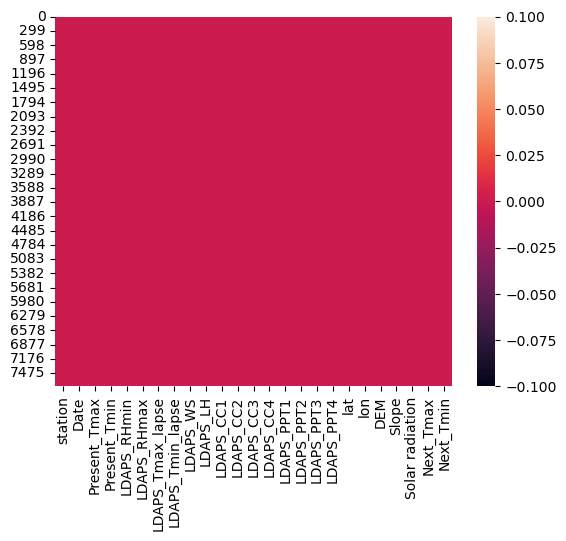

In [16]:
#Lets visualize it using heatmap
sns.heatmap(df.isnull())

In [17]:
#Checking the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7750 entries, 0 to 7749
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7750 non-null   float64
 3   Present_Tmin      7750 non-null   float64
 4   LDAPS_RHmin       7750 non-null   float64
 5   LDAPS_RHmax       7750 non-null   float64
 6   LDAPS_Tmax_lapse  7750 non-null   float64
 7   LDAPS_Tmin_lapse  7750 non-null   float64
 8   LDAPS_WS          7750 non-null   float64
 9   LDAPS_LH          7750 non-null   float64
 10  LDAPS_CC1         7750 non-null   float64
 11  LDAPS_CC2         7750 non-null   float64
 12  LDAPS_CC3         7750 non-null   float64
 13  LDAPS_CC4         7750 non-null   float64
 14  LDAPS_PPT1        7750 non-null   float64
 15  LDAPS_PPT2        7750 non-null   float64
 16  LDAPS_PPT3        7750 non-null   float64


**Observation:-**

*1) Here you can see 24 float type columns and 1 text type column is present.*

*2) <class 'pandas.core.frame.DataFrame'> indecates that it's a pandas DataFrame.*

*3) In this dataset no null value is present now.*

*4) This dataset occupy 1.5+ MB of memory.*

**Now I will change the Date column data type Object to Datetime type.Lets see:**

In [18]:
df["Date"]=pd.to_datetime(df["Date"])

In [19]:
#Checking the data type again
df.dtypes

station                    float64
Date                datetime64[ns]
Present_Tmax               float64
Present_Tmin               float64
LDAPS_RHmin                float64
LDAPS_RHmax                float64
LDAPS_Tmax_lapse           float64
LDAPS_Tmin_lapse           float64
LDAPS_WS                   float64
LDAPS_LH                   float64
LDAPS_CC1                  float64
LDAPS_CC2                  float64
LDAPS_CC3                  float64
LDAPS_CC4                  float64
LDAPS_PPT1                 float64
LDAPS_PPT2                 float64
LDAPS_PPT3                 float64
LDAPS_PPT4                 float64
lat                        float64
lon                        float64
DEM                        float64
Slope                      float64
Solar radiation            float64
Next_Tmax                  float64
Next_Tmin                  float64
dtype: object

**Now you can see the Date column data type is changed to datetime type.**

In [20]:
#Checking the unique value counts for each column
df.nunique().to_frame("Unique value count")

Unique value count
station                           25
Date                             310
Present_Tmax                     167
Present_Tmin                     155
LDAPS_RHmin                     7673
LDAPS_RHmax                     7665
LDAPS_Tmax_lapse                7676
LDAPS_Tmin_lapse                7676
LDAPS_WS                        7676
LDAPS_LH                        7676
LDAPS_CC1                       7570
LDAPS_CC2                       7583
LDAPS_CC3                       7600
LDAPS_CC4                       7525
LDAPS_PPT1                      2812
LDAPS_PPT2                      2510
LDAPS_PPT3                      2356
LDAPS_PPT4                      1918
lat                               12
lon                               25
DEM                               25
Slope                             25
Solar radiation                 1575
Next_Tmax                        183
Next_Tmin                        157

**Observation:-**
    
*1) Based on the difference between it's value counts and it unique value counts we can say **station,lat,lon,DEM,Slope cloumns** are categorical columns.*

# Description of the data

In [21]:
df.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7750.000000   7750.000000   7750.000000  7750.000000  7750.000000   
mean     13.000000     29.769652     23.227316    56.742104    88.390827   
std       7.211568      2.953542      2.398383    14.586073     7.150355   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.700000    46.048225    84.318649   
50%      13.000000     29.900000     23.400000    55.039000    89.793000   
75%      19.000000     32.000000     24.875000    67.032715    93.703491   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7750.000000       7750.000000  7750.000000  7750.000000   
mean          29.614708         23.515387     7.091188    62.440786   
std            2.928370          2.331006     2.167185    33.520914   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.693733         22.115268     5.686498    37.547426   
50%           29.703000         23.760000     6.547500    56.865000   
75%           31.682567         25.133460     8.005363    83.891182   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...   LDAPS_PPT2   LDAPS_PPT3   LDAPS_PPT4          lat  \
count  7750.000000  ...  7750.000000  7750.000000  7750.000000  7750.000000   
mean      0.368230  ...     0.477644     0.273535     0.264721    37.544720   
std       0.261148  ...     1.738607     1.143042     1.186283     0.050335   
min       0.000000  ...     0.000000     0.000000     0.000000    37.456200   
25%       0.148339  ...     0.000000     0.000000     0.000000    37.510200   
50%       0.315700  ...     0.000000     0.000000     0.000000    37.550700   
75%       0.571665  ...     0.016720     0.007199     0.000000    37.577600   
max       0.967277  ...    21.621661    15.841235    16.655469    37.645000   

               lon          DEM        Slope  Solar radiation    Next_Tmax  \
count  7750.000000  7750.000000  7750.000000      7750.000000  7750.000000   
mean    126.991400    61.854944     1.256692      5341.549330    30.273781   
std       0.079406    54.256953     1.369833       428.996445     3.124457   
min     126.826000    12.370000     0.098500      4329.520508    17.400000   
25%     126.937000    28.700000     0.271300      4999.018555    28.200000   
50%     126.995000    45.716000     0.618000      5436.345215    30.500000   
75%     127.042000    59.832400     1.767800      5728.316406    32.600000   
max     127.135000   212.335000     5.178200      5992.895996    38.900000   

         Next_Tmin  
count  7750.000000  
mean     22.934400  
std       2.483449  
min      11.300000  
25%      21.400000  
50%      23.100000  
75%      24.600000  
max      29.800000  

[8 rows x 24 columns]

**Observation:-**

*Here you can see for some columns their mean value is greater than the median(50%) those are right tailed skewed like LDAPS_RHmin.*

*For some columns their median(50%) value is greater than the mean those are left tailed skewed like LDAPS_Tmax_lapse.*

*For some columns you can see a huge difference between it's 75% to Max values ,there might be outliers are present.*

# Visualization

**Uni-variate Analysis**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0')])

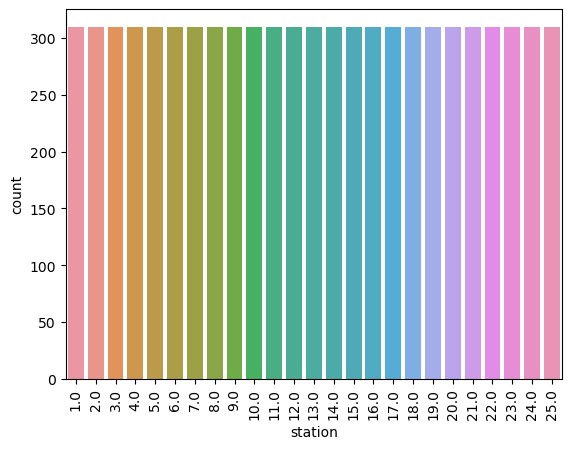

In [22]:
#Analysisng station columns
sns.countplot(x='station',data=df)
plt.xticks(rotation=90)

**Here you can see 25 weather stations are present and each of the stations have equal count of value.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '37.4562'),
  Text(1, 0, '37.4697'),
  Text(2, 0, '37.4832'),
  Text(3, 0, '37.4967'),
  Text(4, 0, '37.5102'),
  Text(5, 0, '37.5237'),
  Text(6, 0, '37.5372'),
  Text(7, 0, '37.5507'),
  Text(8, 0, '37.5776'),
  Text(9, 0, '37.6046'),
  Text(10, 0, '37.6181'),
  Text(11, 0, '37.645')])

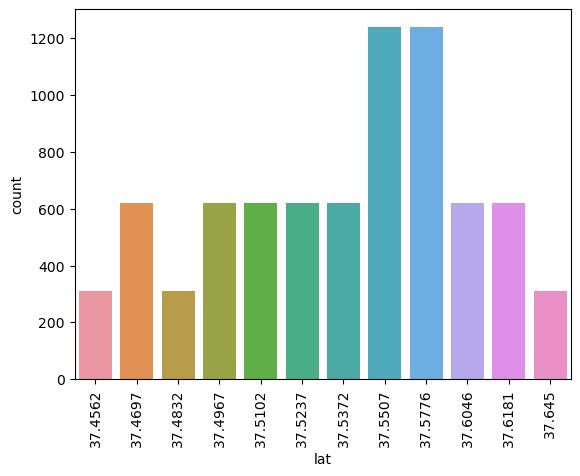

In [23]:
#Analysisng lat columns
sns.countplot(x='lat',data=df)
plt.xticks(rotation=90)

**Observation:-**
    
*Most of the data are recorded for either 37.5507 or 37.5776 latitude and very less weather data are recorded in 37.645,37.4832,37.4562 latitude.*

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, '126.826'),
  Text(1, 0, '126.838'),
  Text(2, 0, '126.891'),
  Text(3, 0, '126.909'),
  Text(4, 0, '126.91'),
  Text(5, 0, '126.927'),
  Text(6, 0, '126.937'),
  Text(7, 0, '126.938'),
  Text(8, 0, '126.955'),
  Text(9, 0, '126.97'),
  Text(10, 0, '126.988'),
  Text(11, 0, '126.991'),
  Text(12, 0, '126.995'),
  Text(13, 0, '127.004'),
  Text(14, 0, '127.022'),
  Text(15, 0, '127.024'),
  Text(16, 0, '127.032'),
  Text(17, 0, '127.04'),
  Text(18, 0, '127.042'),
  Text(19, 0, '127.058'),
  Text(20, 0, '127.083'),
  Text(21, 0, '127.085'),
  Text(22, 0, '127.086'),
  Text(23, 0, '127.099'),
  Text(24, 0, '127.135')])

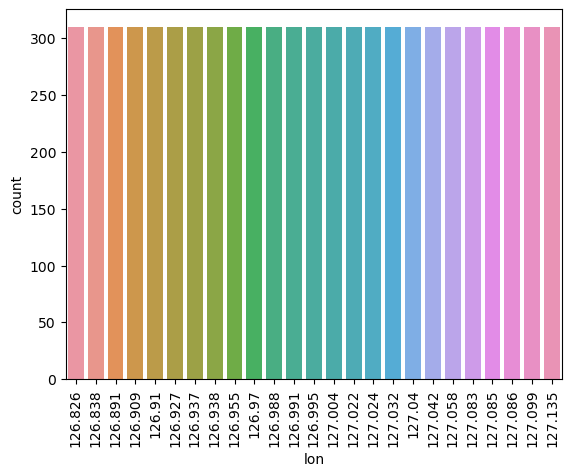

In [24]:
#Analysisng lon columns
sns.countplot(x='lon',data=df)
plt.xticks(rotation=90)

**Observation:-**
    
*Here you can all Longitude has the equal count of value.*

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0.0, 0, '0'),
  Text(25.0, 0, '25'),
  Text(50.0, 0, '50'),
  Text(75.0, 0, '75'),
  Text(100.0, 0, '100'),
  Text(125.0, 0, '125'),
  Text(150.0, 0, '150'),
  Text(175.0, 0, '175'),
  Text(200.0, 0, '200'),
  Text(225.0, 0, '225')])

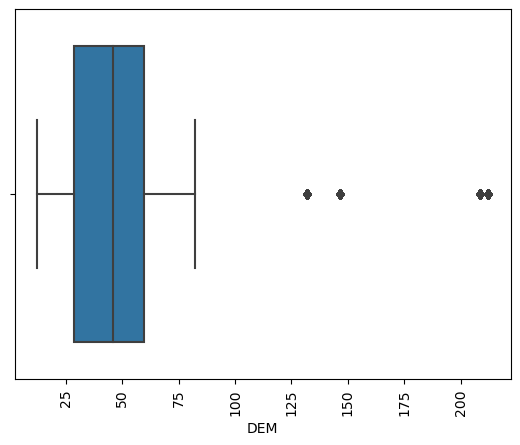

In [25]:
#Analysisng DEM columns
sns.boxplot(x='DEM',data=df)
plt.xticks(rotation=90)

**Observation:-**
    
*1) The lowest altitude of the location is like 12.5 meters.*

*2) Maximum altitude of the location is like above 200 meters.*

*3) Median altitude of the location be like 45 meters.*

(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.]),
 [Text(-1.0, 0, '−1'),
  Text(0.0, 0, '0'),
  Text(1.0, 0, '1'),
  Text(2.0, 0, '2'),
  Text(3.0, 0, '3'),
  Text(4.0, 0, '4'),
  Text(5.0, 0, '5'),
  Text(6.0, 0, '6')])

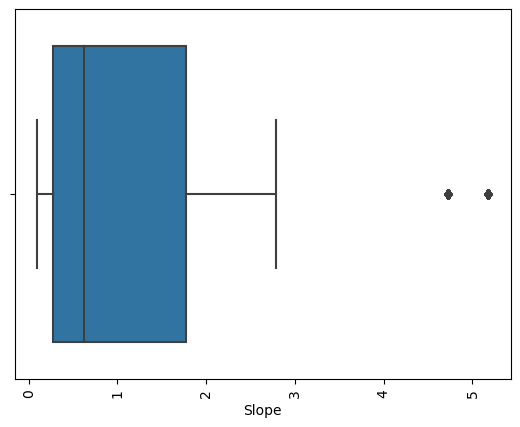

In [26]:
#Analysisng slope columns
sns.boxplot(x='Slope',data=df)
plt.xticks(rotation=90)

**Observation:-**
    
*1) Here you can see minimum slope value is just above 0 degree.**

*2) Maximum slope value is above 5 degree.**

*3) Median of the slope is be like 0.7 degree.**

**BI-Variate analysis**

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24],
 [Text(0, 0, '1.0'),
  Text(1, 0, '2.0'),
  Text(2, 0, '3.0'),
  Text(3, 0, '4.0'),
  Text(4, 0, '5.0'),
  Text(5, 0, '6.0'),
  Text(6, 0, '7.0'),
  Text(7, 0, '8.0'),
  Text(8, 0, '9.0'),
  Text(9, 0, '10.0'),
  Text(10, 0, '11.0'),
  Text(11, 0, '12.0'),
  Text(12, 0, '13.0'),
  Text(13, 0, '14.0'),
  Text(14, 0, '15.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '17.0'),
  Text(17, 0, '18.0'),
  Text(18, 0, '19.0'),
  Text(19, 0, '20.0'),
  Text(20, 0, '21.0'),
  Text(21, 0, '22.0'),
  Text(22, 0, '23.0'),
  Text(23, 0, '24.0'),
  Text(24, 0, '25.0')])

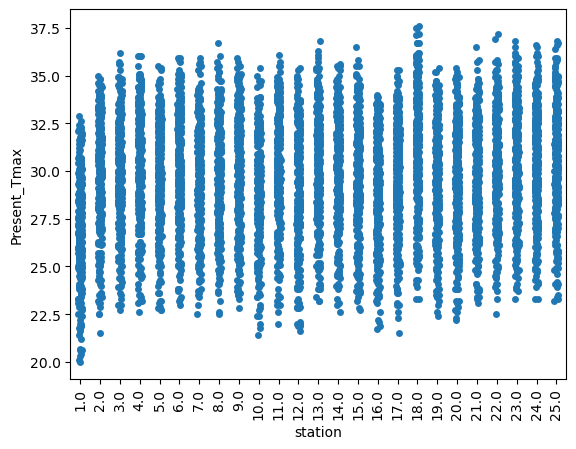

In [27]:
#Analysis between station and Present_Tmax
sns.stripplot(x="station",y="Present_Tmax",data=df)
plt.xticks(rotation=90)

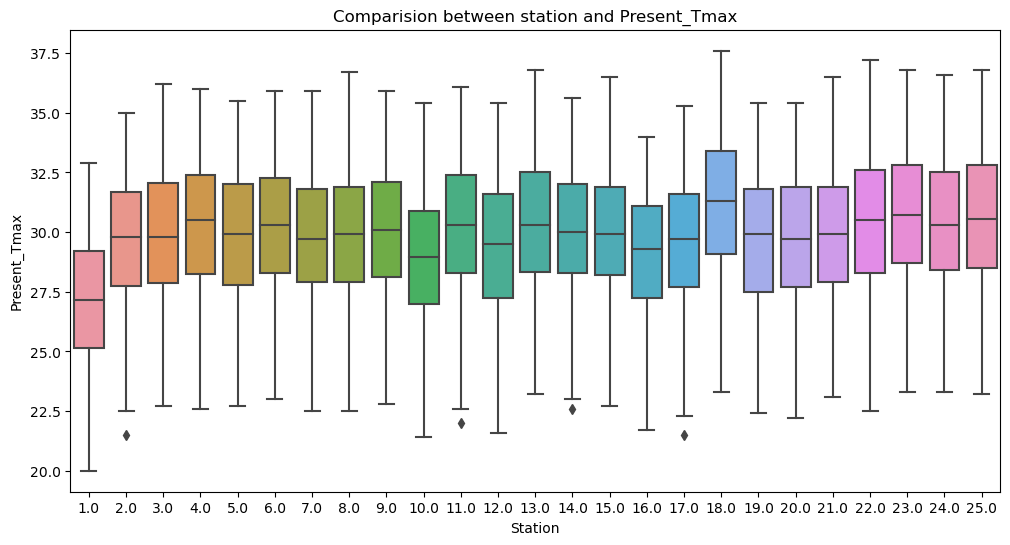

In [28]:
#Analysis between station and Present_Tmax
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='Present_Tmax', data=df)
plt.title('Comparision between station and Present_Tmax')
plt.xlabel('Station')
plt.ylabel('Present_Tmax')
plt.show()

**Observation:-**
    
*1) Here you can see lowerst maximum air temperature recorded between 0 and 21 hours on the present day is 20 degree and it's recored on Station no 1.*

*2) Highest maximum air temperature recorded between 0 and 21 hours on the present day is 37.5 degree and it's recorded on 18 number station.*

*3) Median of the maximum air temperature recorded between 0 and 21 hours on the present day are all below 32.5 degree.*

<Figure size 1200x600 with 0 Axes>

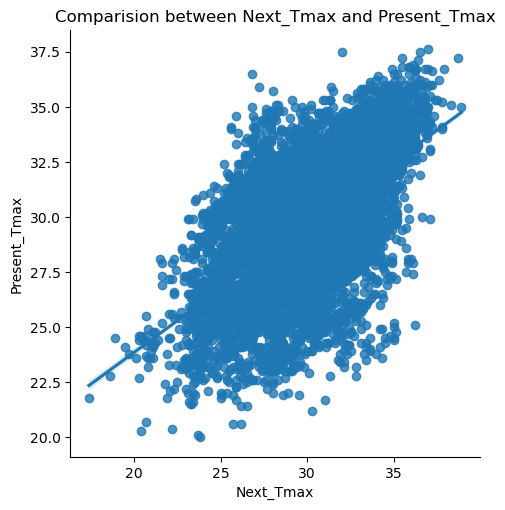

In [29]:
#Analysis between our Target column Next_Tmax and Present_Tmax
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='Present_Tmax', data=df)
plt.title('Comparision between Next_Tmax and Present_Tmax')
plt.xlabel('Next_Tmax')
plt.ylabel('Present_Tmax')
plt.show()

**Observation>:-**
    
*1) Here you cans see our Target column Next_Tmax has a positive correlation with Present_Tmax but the relation is not strongly linear,*

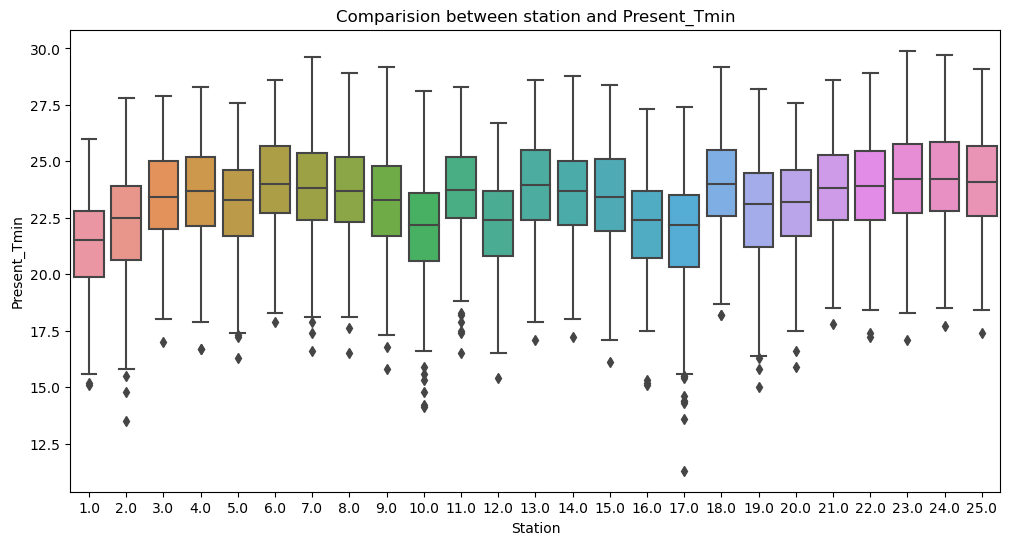

In [30]:
#Analysis between station and Present_Tmin
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='Present_Tmin', data=df)
plt.title('Comparision between station and Present_Tmin')
plt.xlabel('Station')
plt.ylabel('Present_Tmin')
plt.show()

**Observation:-**

*1) Here you can see lowerst minimum air temperature recorded between 0 and 21 hours on the present day is like 6 degree and it's recored on Station no 17.*

*2) Highest minimum air temperature recorded between 0 and 21 hours on the present day is just below 30 degree and it's recorded on 23 number station.*

*3) Median of the minimun air temperature recorded between 0 and 21 hours on the present day are all below 25 degree.*

<Figure size 1200x600 with 0 Axes>

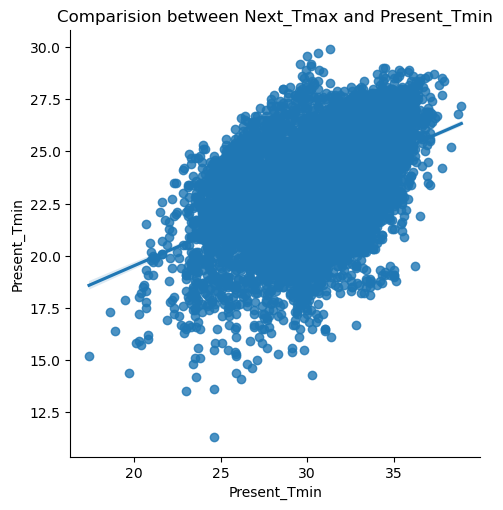

In [31]:
#Analysis between our Target column Next_Tmax and Present_Tmin
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='Present_Tmin', data=df)
plt.title('Comparision between Next_Tmax and Present_Tmin')
plt.xlabel('Present_Tmin')
plt.ylabel('Present_Tmin')
plt.show()

**Observation:-**

*1) Here you cans see our Target column Next_Tmax has a positive correlation with Present_Tmin but the relation is not strongly linear.*

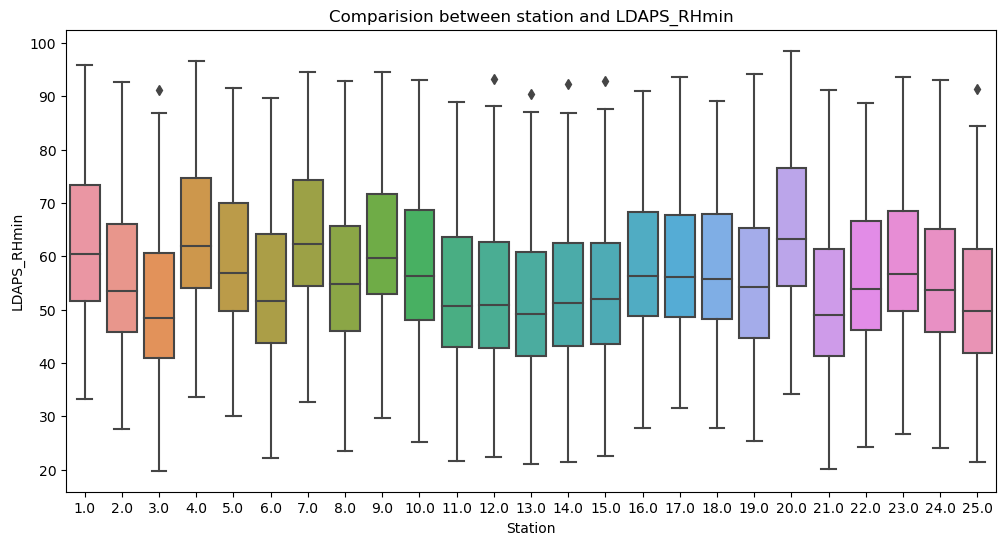

In [32]:
#Analysis between station and LDAPS_RHmin
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='LDAPS_RHmin', data=df)
plt.title('Comparision between station and LDAPS_RHmin')
plt.xlabel('Station')
plt.ylabel('LDAPS_RHmin')
plt.show()

**Observation:-**

*1) maximum next-day minimum relative humidity is just below 100 recorded in number 20 station.*

*2) Minimum next-day minimum relative humidity is just below 20 recorded in number 3 station.*

*3) Median of all stations next-day minimum relative humidity is lies between 45 to 65.*

<Figure size 1200x600 with 0 Axes>

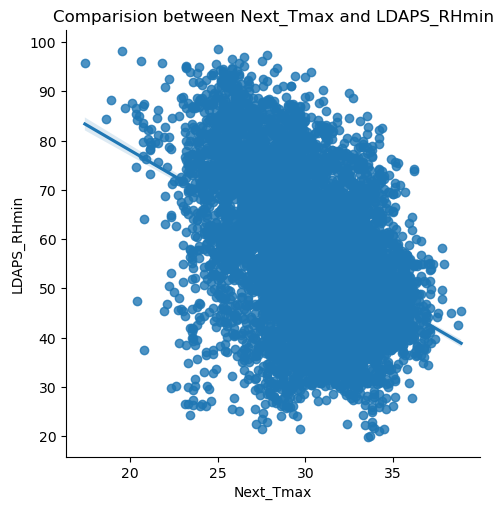

In [33]:
#Analysis between our Target column Next_Tmax and LDAPS_RHmin
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_RHmin', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_RHmin')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_RHmin')
plt.show()

**Observation:-**
    
*our Target column Next_Tmax has a negative correlation with LDAPS_RHmin but the relation is not strongly linear.*

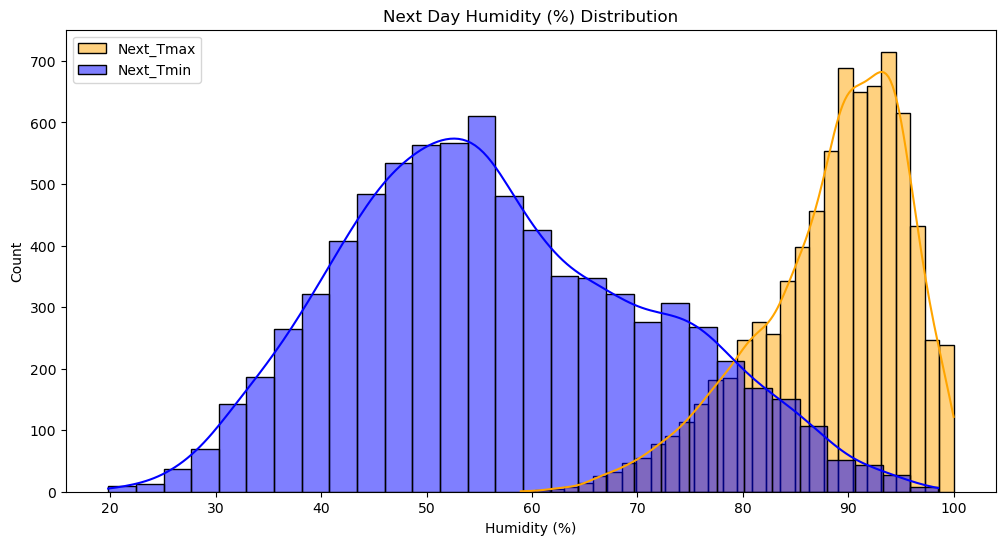

In [34]:
#Comparing LDAPS_RHmax and LDAPS_RHmin column
plt.figure(figsize=(12, 6))
sns.histplot(df['LDAPS_RHmax'], bins=30, kde=True, color='orange', label='Next_Tmax')
sns.histplot(df['LDAPS_RHmin'], bins=30, kde=True, color='blue', label='Next_Tmin')
plt.title('Next Day Humidity (%) Distribution')
plt.xlabel('Humidity (%)')
plt.legend()
plt.show()

**Observation:-**
    
*Here you cans see the comoon humidity is lies between 60 to 100 %.*

<Figure size 1200x600 with 0 Axes>

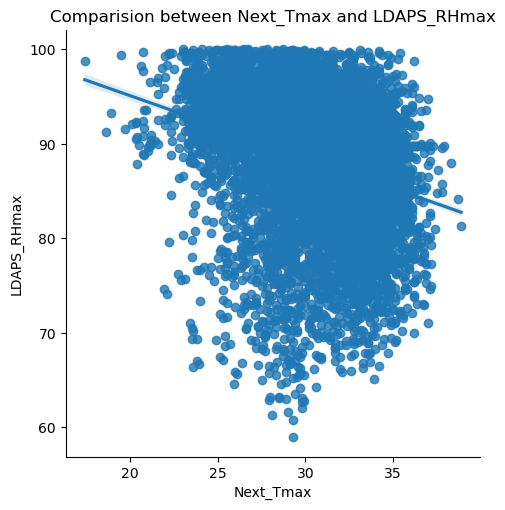

In [35]:
#Analysis between our Target column Next_Tmax and LDAPS_RHmax
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_RHmax', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_RHmax')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_RHmax')
plt.show()

**Observation:-**

*Our Target column Next_Tmax has a negative correlation with LDAPS_RHmax but the relation is not strongly linear.*

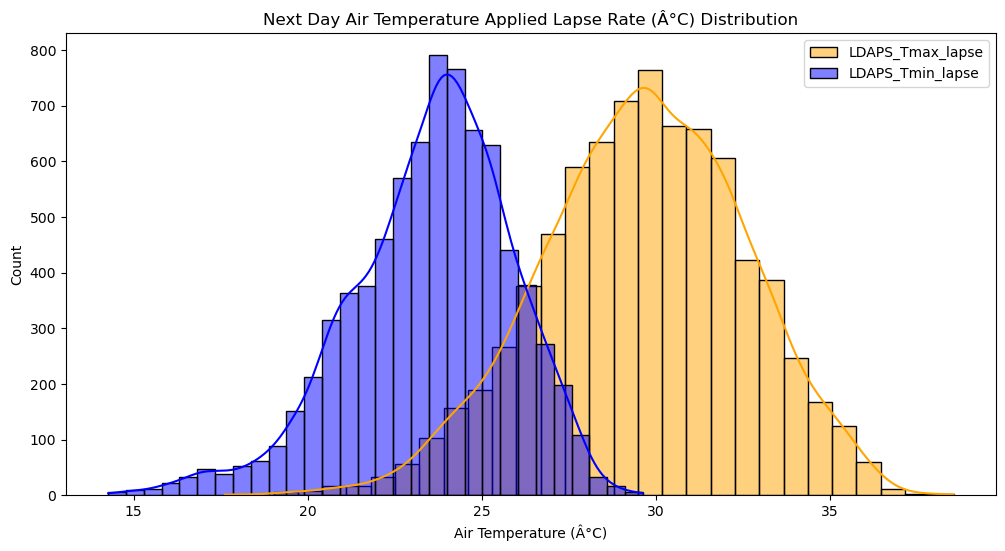

In [36]:
#Comparing LDAPS_Tmax_lapse and LDAPS_Tmin_lapse column
plt.figure(figsize=(12, 6))
sns.histplot(df['LDAPS_Tmax_lapse'], bins=30, kde=True, color='orange', label='LDAPS_Tmax_lapse')
sns.histplot(df['LDAPS_Tmin_lapse'], bins=30, kde=True, color='blue', label='LDAPS_Tmin_lapse')
plt.title('Next Day Air Temperature Applied Lapse Rate (Â°C) Distribution')
plt.xlabel('Air Temperature (Â°C)')
plt.legend()
plt.show()

 **Observation:-**
        
*The common forecast of next-day  air temperature applied lapse rate (Â°C) lies between 20 to 30.*

<Figure size 1200x600 with 0 Axes>

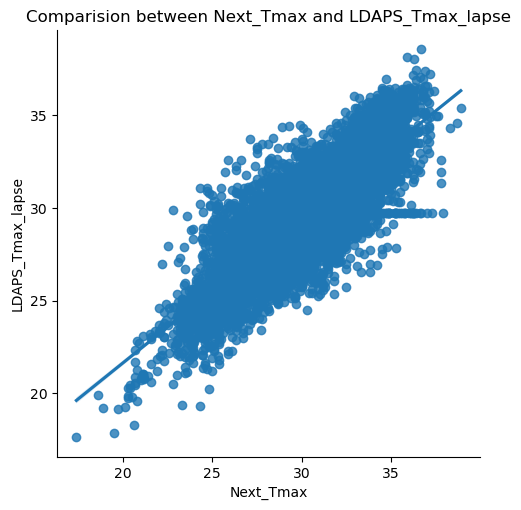

In [37]:
#Analysis between our Target column Next_Tmax and LDAPS_Tmax_lapse
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_Tmax_lapse', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_Tmax_lapse')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_Tmax_lapse')
plt.show()

**Observation:-**
    
*Here you can see our Target column Next_Tmax has a good positive correlation with LDAPS_Tmax_lapse column but the spread is wider if that get thiner then we can call it this correlation is a very strong correlation.*

<Figure size 1200x600 with 0 Axes>

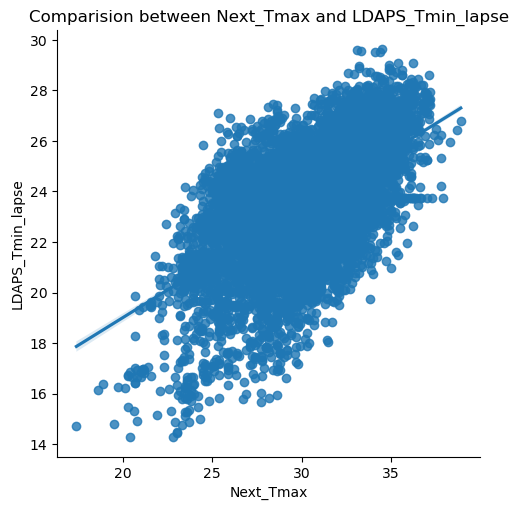

In [38]:
#Analysis between our Target column Next_Tmax and LDAPS_Tmin_lapse
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_Tmin_lapse', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_Tmin_lapse')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_Tmin_lapse')
plt.show()

**Observation:-**

*Here you can see our Target column Next_Tmax has a positive correlation with LDAPS_Tmax_lapse column but it's not strongly correlated.*

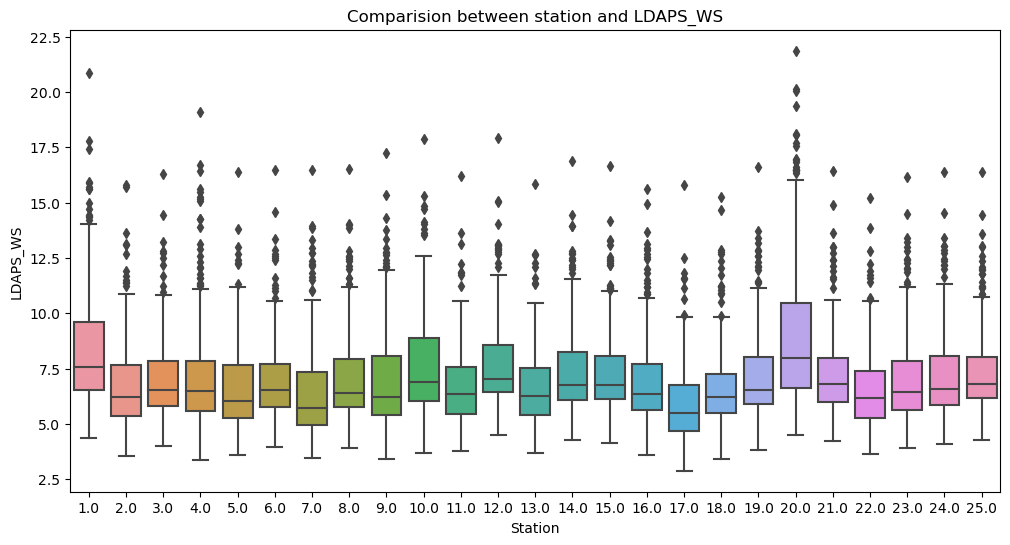

In [39]:
#Analysis between station and LDAPS_WS
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='LDAPS_WS', data=df)
plt.title('Comparision between station and LDAPS_WS')
plt.xlabel('Station')
plt.ylabel('LDAPS_WS')
plt.show()

**Observation:-**
    
*1) Here you can see minimum forecast of next-day average wind speed (m/s) is like 3 present in station 17.*

*2) Maximum forecast of next-day average wind speed (m/s) is like below 22 present in station 20.*

*3) For all median of forecast of next-day average wind speed (m/s) is present in 6.5 to 8.8.*

<Figure size 1200x600 with 0 Axes>

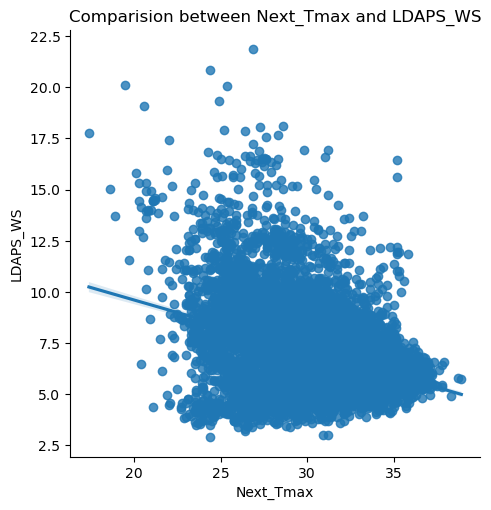

In [40]:
#Analysis between our Target column Next_Tmax and LDAPS_WS
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_WS', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_WS')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_WS')
plt.show()

**Observation:-**

*Here you can see our Target column Next_Tmax has a negative correlation with LDAPS_WS column but it's not strongly correlated.*

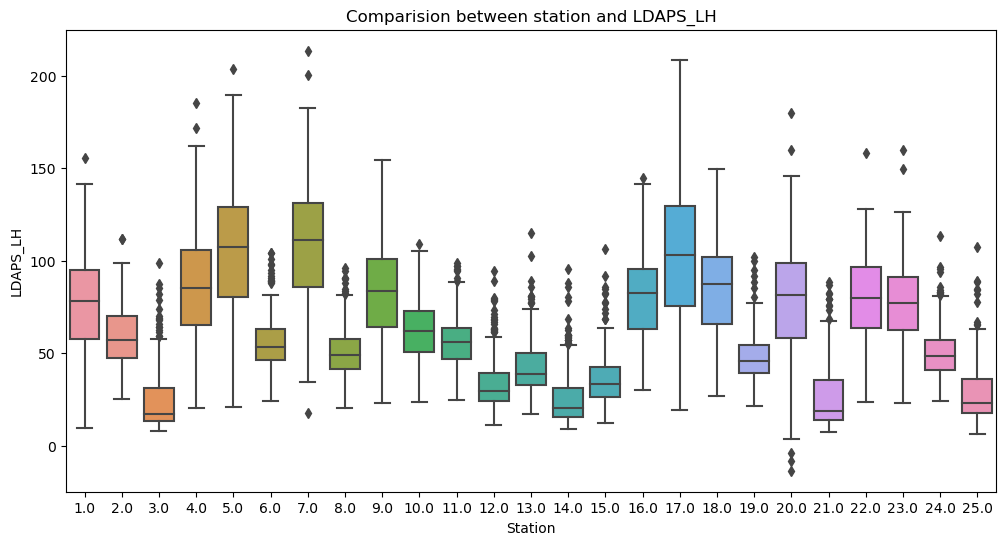

In [41]:
#Analysis between station and LDAPS_LH
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='LDAPS_LH', data=df)
plt.title('Comparision between station and LDAPS_LH')
plt.xlabel('Station')
plt.ylabel('LDAPS_LH')
plt.show()

**Observation:-**
    
*1) Here you can see minimum forecast of next-day average latent heat flux (W/m2) is well below 0 recorded in station 20.*

*2) Maximum forecast of forecast of next-day average latent heat flux (W/m2) is like above 200 recorded in station 7.*

*3) For all median of forecast of next-day average latent heat flux (W/m2) is lies between 10 to 125.*    

<Figure size 1200x600 with 0 Axes>

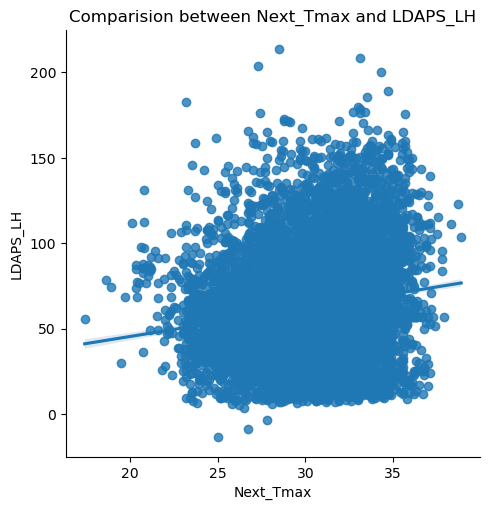

In [42]:
#Analysis between our Target column Next_Tmax and LDAPS_LH
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_LH', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_LH')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_LH')
plt.show()

**Observation:-**

*Here you can see our Target column Next_Tmax is not correlated with LDAPS_LH column.*

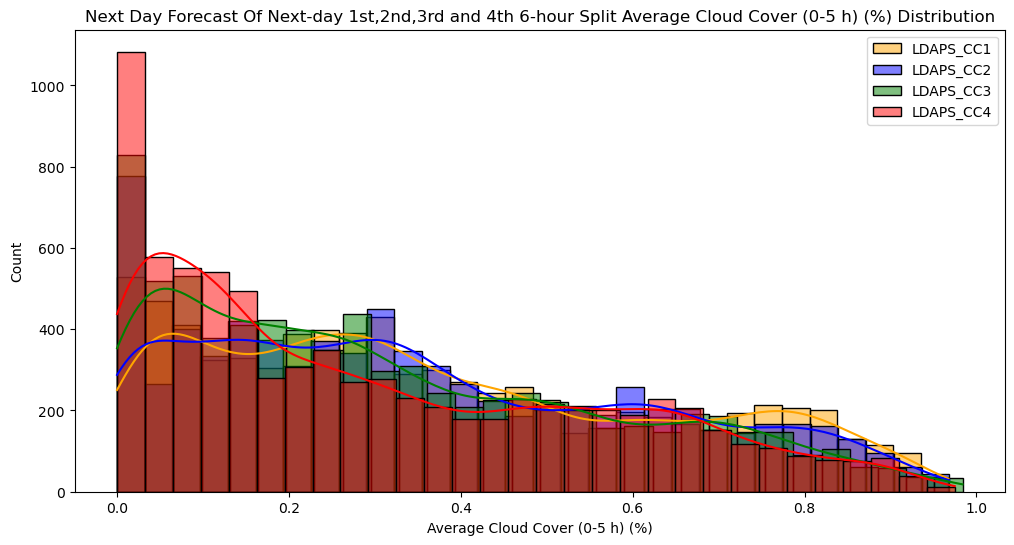

In [43]:
#Comparing LDAPS_CC1,LDAPS_CC2,LDAPS_CC3 and LDAPS_CC4 column
plt.figure(figsize=(12, 6))
sns.histplot(df['LDAPS_CC1'], bins=30, kde=True, color='orange', label='LDAPS_CC1')
sns.histplot(df['LDAPS_CC2'], bins=30, kde=True, color='blue', label='LDAPS_CC2')
sns.histplot(df['LDAPS_CC3'], bins=30, kde=True, color='green', label='LDAPS_CC3')
sns.histplot(df['LDAPS_CC4'], bins=30, kde=True, color='red', label='LDAPS_CC4')

plt.title('Next Day Forecast Of Next-day 1st,2nd,3rd and 4th 6-hour Split Average Cloud Cover (0-5 h) (%) Distribution')
plt.xlabel('Average Cloud Cover (0-5 h) (%)')
plt.legend()
plt.show()

**Observation:-** 
    
*Here you can see the common forecast of next-day 1st 6-hour split average cloud cover is lies form 0.0 to 0.96.*

<Figure size 1200x600 with 0 Axes>

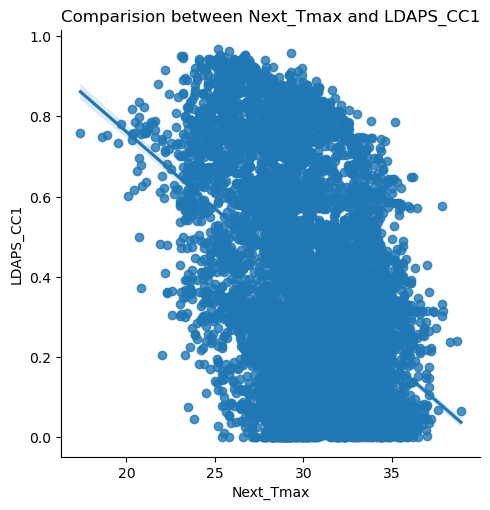

In [44]:
#Analysis between our Target column Next_Tmax and LDAPS_CC1
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_CC1', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_CC1')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_CC1')
plt.show()

**Observation:-**

*Here you can see our Target column Next_Tmax has a weak negative correlation with LDAPS_CC1 column.*

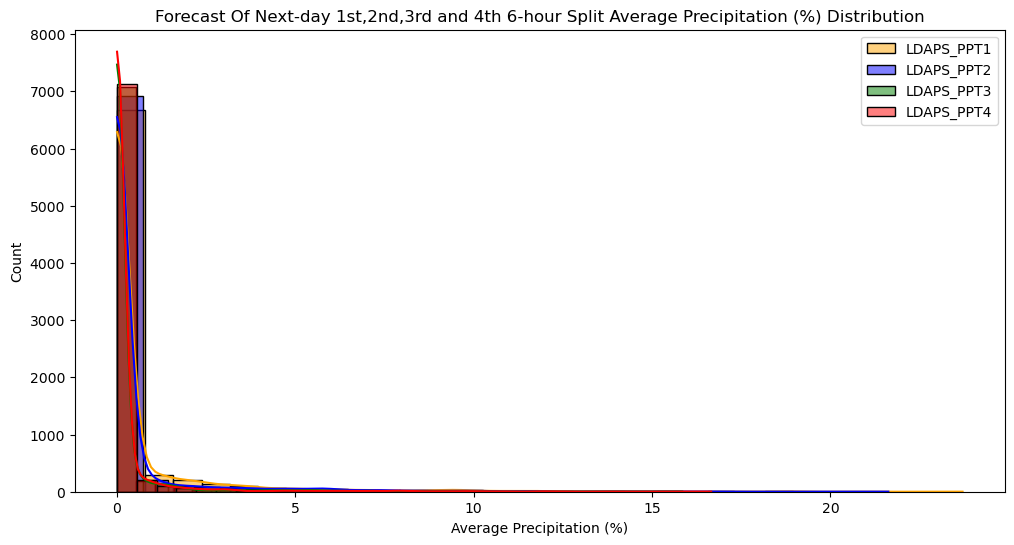

In [45]:
#Comparing LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 column
plt.figure(figsize=(12, 6))
sns.histplot(df['LDAPS_PPT1'], bins=30, kde=True, color='orange', label='LDAPS_PPT1')
sns.histplot(df['LDAPS_PPT2'], bins=30, kde=True, color='blue', label='LDAPS_PPT2')
sns.histplot(df['LDAPS_PPT3'], bins=30, kde=True, color='green', label='LDAPS_PPT3')
sns.histplot(df['LDAPS_PPT4'], bins=30, kde=True, color='red', label='LDAPS_PPT4')

plt.title('Forecast Of Next-day 1st,2nd,3rd and 4th 6-hour Split Average Precipitation (%) Distribution')
plt.xlabel('Average Precipitation (%)')
plt.legend()
plt.show()

**Observation:-**
    
*Here we can't the difference between next-day 1st 6-hour split average precipitation.*

<Figure size 1200x600 with 0 Axes>

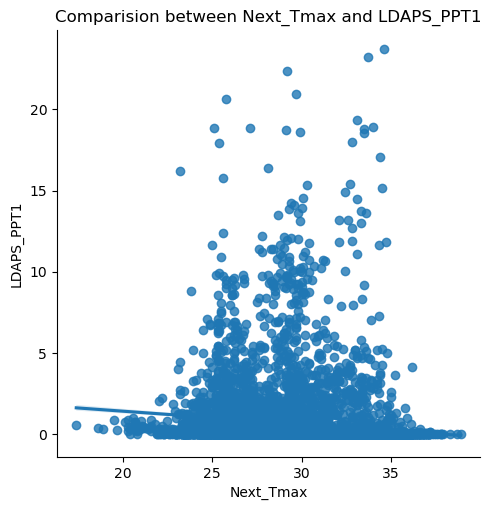

In [46]:
#Analysis between our Target column Next_Tmax and LDAPS_PPT1
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='LDAPS_PPT1', data=df)
plt.title('Comparision between Next_Tmax and LDAPS_PPT1')
plt.xlabel('Next_Tmax')
plt.ylabel('LDAPS_PPT1')
plt.show()

**Observation:-**

*No relation between our Target column Next_Tmax and LDAPS_PPT1.*

<Figure size 1200x600 with 0 Axes>

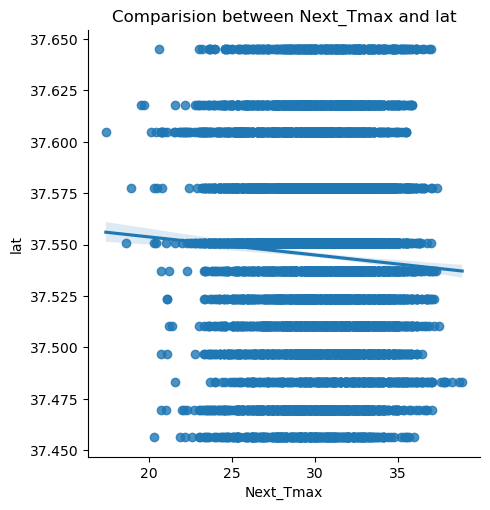

In [47]:
#Analysis between our Target column Next_Tmax and lat
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='lat', data=df)
plt.title('Comparision between Next_Tmax and lat')
plt.xlabel('Next_Tmax')
plt.ylabel('lat')
plt.show()

**Observation:-**
    
*Here you can see no relation between Next_Tmax and lat.*

<Figure size 1200x600 with 0 Axes>

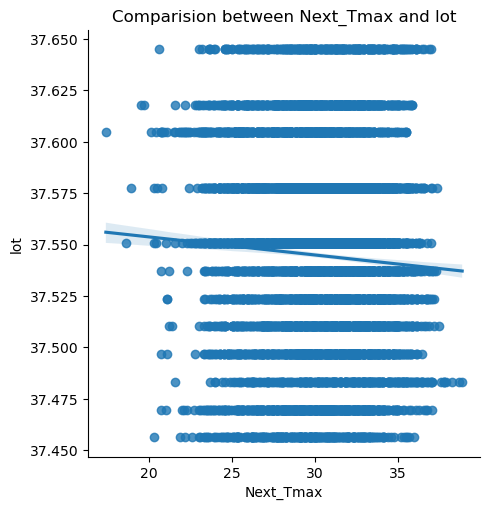

In [48]:
#Analysis between our Target column Next_Tmax and lot
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='lat', data=df)
plt.title('Comparision between Next_Tmax and lot')
plt.xlabel('Next_Tmax')
plt.ylabel('lot')
plt.show()

**Observation:-**

*Same for Longtitude column it has no relation with our Target column Next_Tmax.*


<Figure size 1200x600 with 0 Axes>

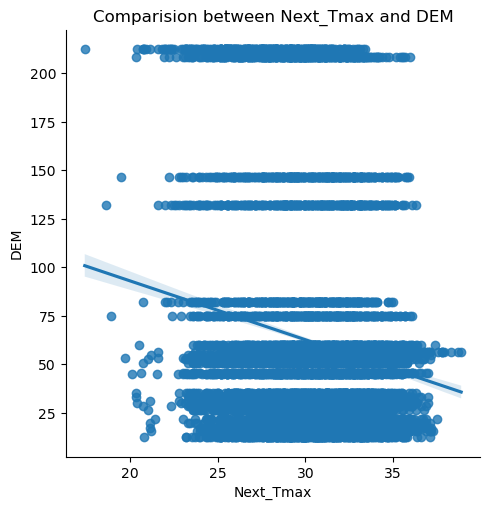

In [49]:
#Analysis between our Target column Next_Tmax and DEM
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmax', y='DEM', data=df)
plt.title('Comparision between Next_Tmax and DEM')
plt.xlabel('Next_Tmax')
plt.ylabel('DEM')
plt.show()

**Observation:-**
    
*Here you can see no relation is present between Next_Tmax and DEM column.*

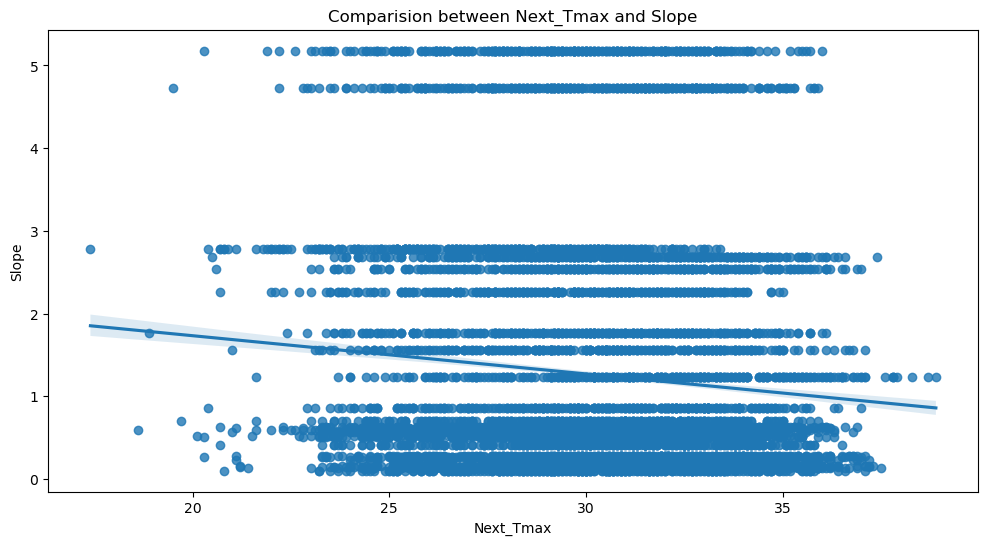

In [50]:
#Analysis between our Target column Next_Tmax and Slope
plt.figure(figsize=(12, 6))
sns.regplot(x='Next_Tmax', y='Slope', data=df)
plt.title('Comparision between Next_Tmax and Slope')
plt.xlabel('Next_Tmax')
plt.ylabel('Slope')
plt.show()

**Observation:-**

*No relation is present between Next_Tmax and Slope column.*

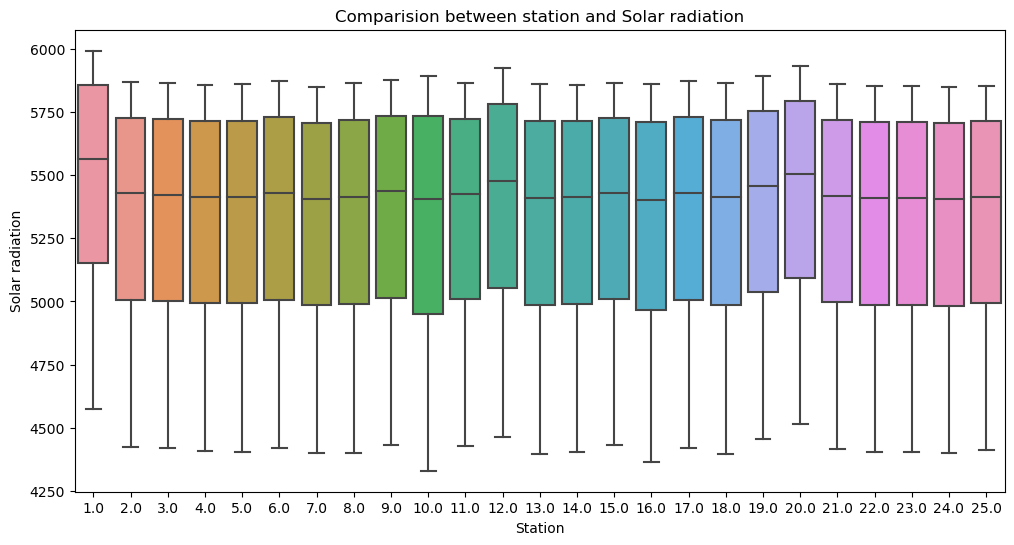

In [51]:
#Analysis between station and Solar radiation
plt.figure(figsize=(12, 6))
sns.boxplot(x='station', y='Solar radiation', data=df)
plt.title('Comparision between station and Solar radiation')
plt.xlabel('Station')
plt.ylabel('Solar radiation')
plt.show()

**Observation:-**

*1) Here you can see minimum daily incoming solar radiation (wh/m2) around 4350 recorded in station 10.*

*2) Maximum daily incoming solar radiation (wh/m2) is 6000 recorded in station 1.*

*3) For all median of daily incoming solar radiation (wh/m2) is lies between 5400 to 5600.*

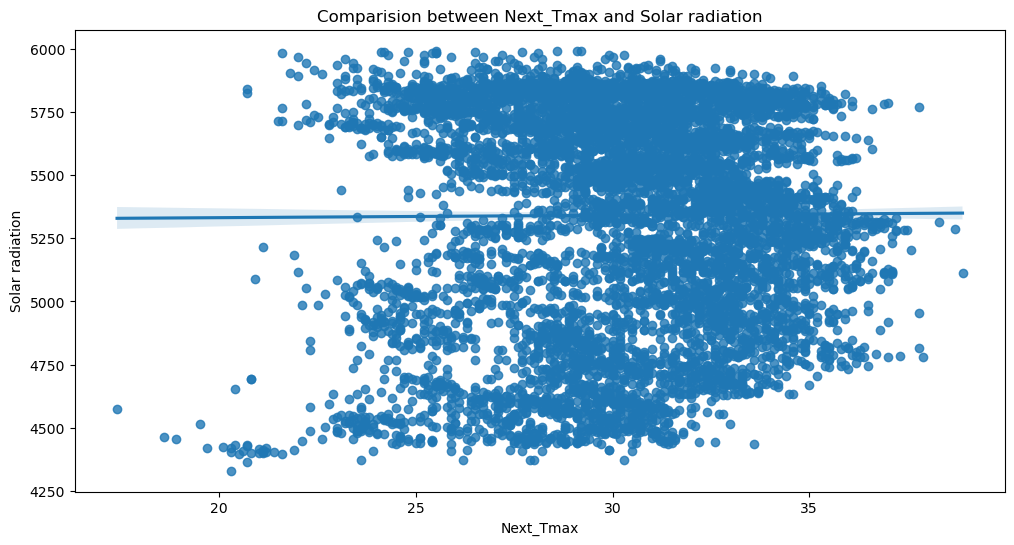

In [52]:
#Analysis between our Target column Next_Tmax and Solar radiation
plt.figure(figsize=(12, 6))
sns.regplot(x='Next_Tmax', y='Solar radiation', data=df)
plt.title('Comparision between Next_Tmax and Solar radiation')
plt.xlabel('Next_Tmax')
plt.ylabel('Solar radiation')
plt.show()

**Observation:-**
    
*Solar radiation has no relation with our Target column.*

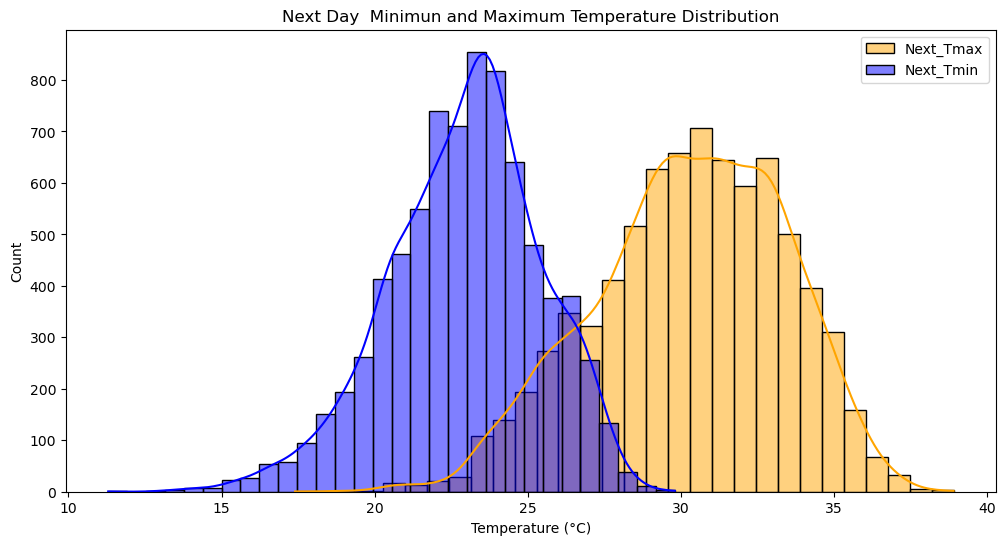

In [53]:
#Comparing the Next Day Minimun and Maximum Temperature
plt.figure(figsize=(12, 6))
sns.histplot(df['Next_Tmax'], bins=30, kde=True, color='orange', label='Next_Tmax')
sns.histplot(df['Next_Tmin'], bins=30, kde=True, color='blue', label='Next_Tmin')
plt.title('Next Day  Minimun and Maximum Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.legend()
plt.show()

**Observation:-**
    
*Common Temperature of ext Day  Minimun and Maximum Temperature is lies between 20 to 30 degree C.*

**Multi-Variate Analysis:-**

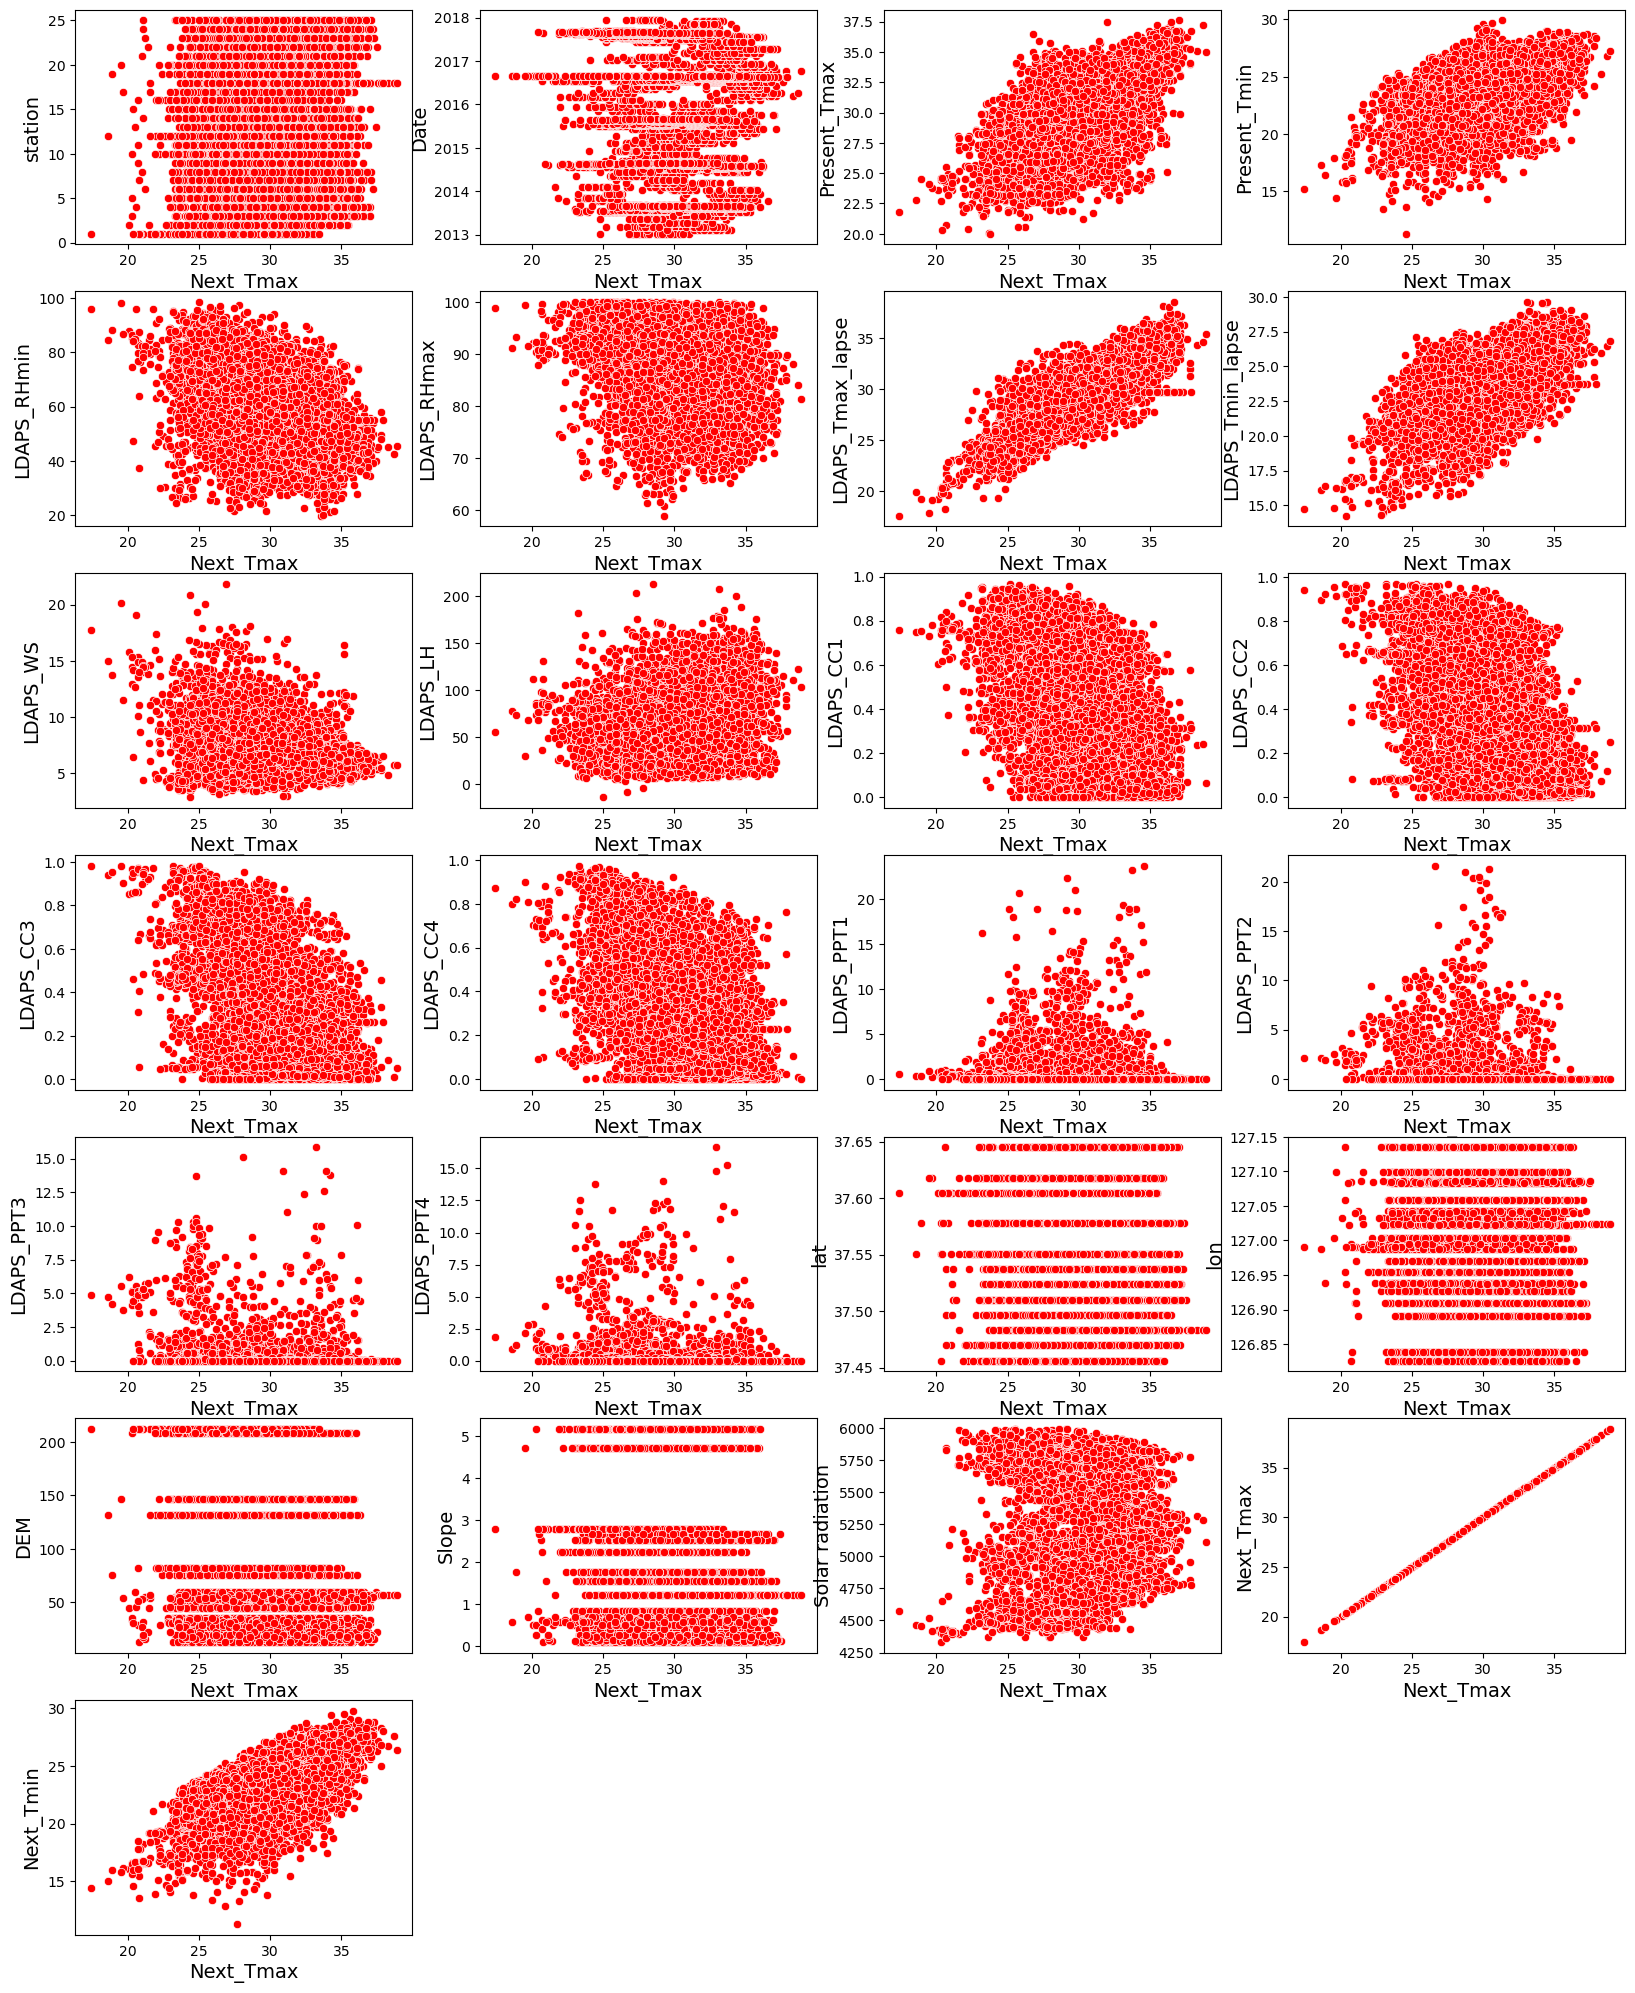

In [54]:
#Analysis with "Next_Tmax" columns with other columns using scatterplot
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=26:
        plt.subplot(7,4,p)
        sns.scatterplot(x="Next_Tmax",y=i,color="r",data=df)
        plt.xlabel("Next_Tmax",fontsize=14)
        plt.ylabel(i,fontsize=14)
    p+=1
plt.show()

**Observation:-**
    
*Here you can see except LDAPS_Tmax_lapse and LDAPS_Tmin_lapse no column has a correlation with Next_Tmax column.*

# Deleting unnecessary columns

**So Date column data will not help me to predict Next day's maximum temperature so I am gonna delete the Date column.**

In [55]:
df.drop("Date",axis=1,inplace=True)

In [56]:
df.sample(3)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
5636     12.0          33.7          25.8    47.002472    73.764656   
7196     22.0          31.1          26.2    52.523304    85.592293   
4090     16.0          32.4          24.1    55.529724    91.910599   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS   LDAPS_LH  LDAPS_CC1  ...  \
5636         33.120514         26.304384  7.439271  30.749714   0.387471  ...   
7196         32.278366         25.116227  6.768980  98.174015   0.288404  ...   
4090         29.795106         23.613457  5.535290  94.473427   0.288862  ...   

      LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
5636         0.0         0.0         0.0  37.5507  126.988  132.1180  0.5931   
7196         0.0         0.0         0.0  37.5102  127.086   21.9668  0.1332   
4090         0.0         0.0         0.0  37.4697  126.995   82.2912  2.2579   

      Solar radiation  Next_Tmax  Next_Tmin  
5636      5238.246582       32.7       24.9  
7196      5200.162598       31.6       24.0  
4090      5184.143555       30.8       22.3  

[3 rows x 24 columns]

**Here you can see date column has been deleted.**

# Checking for Outliers

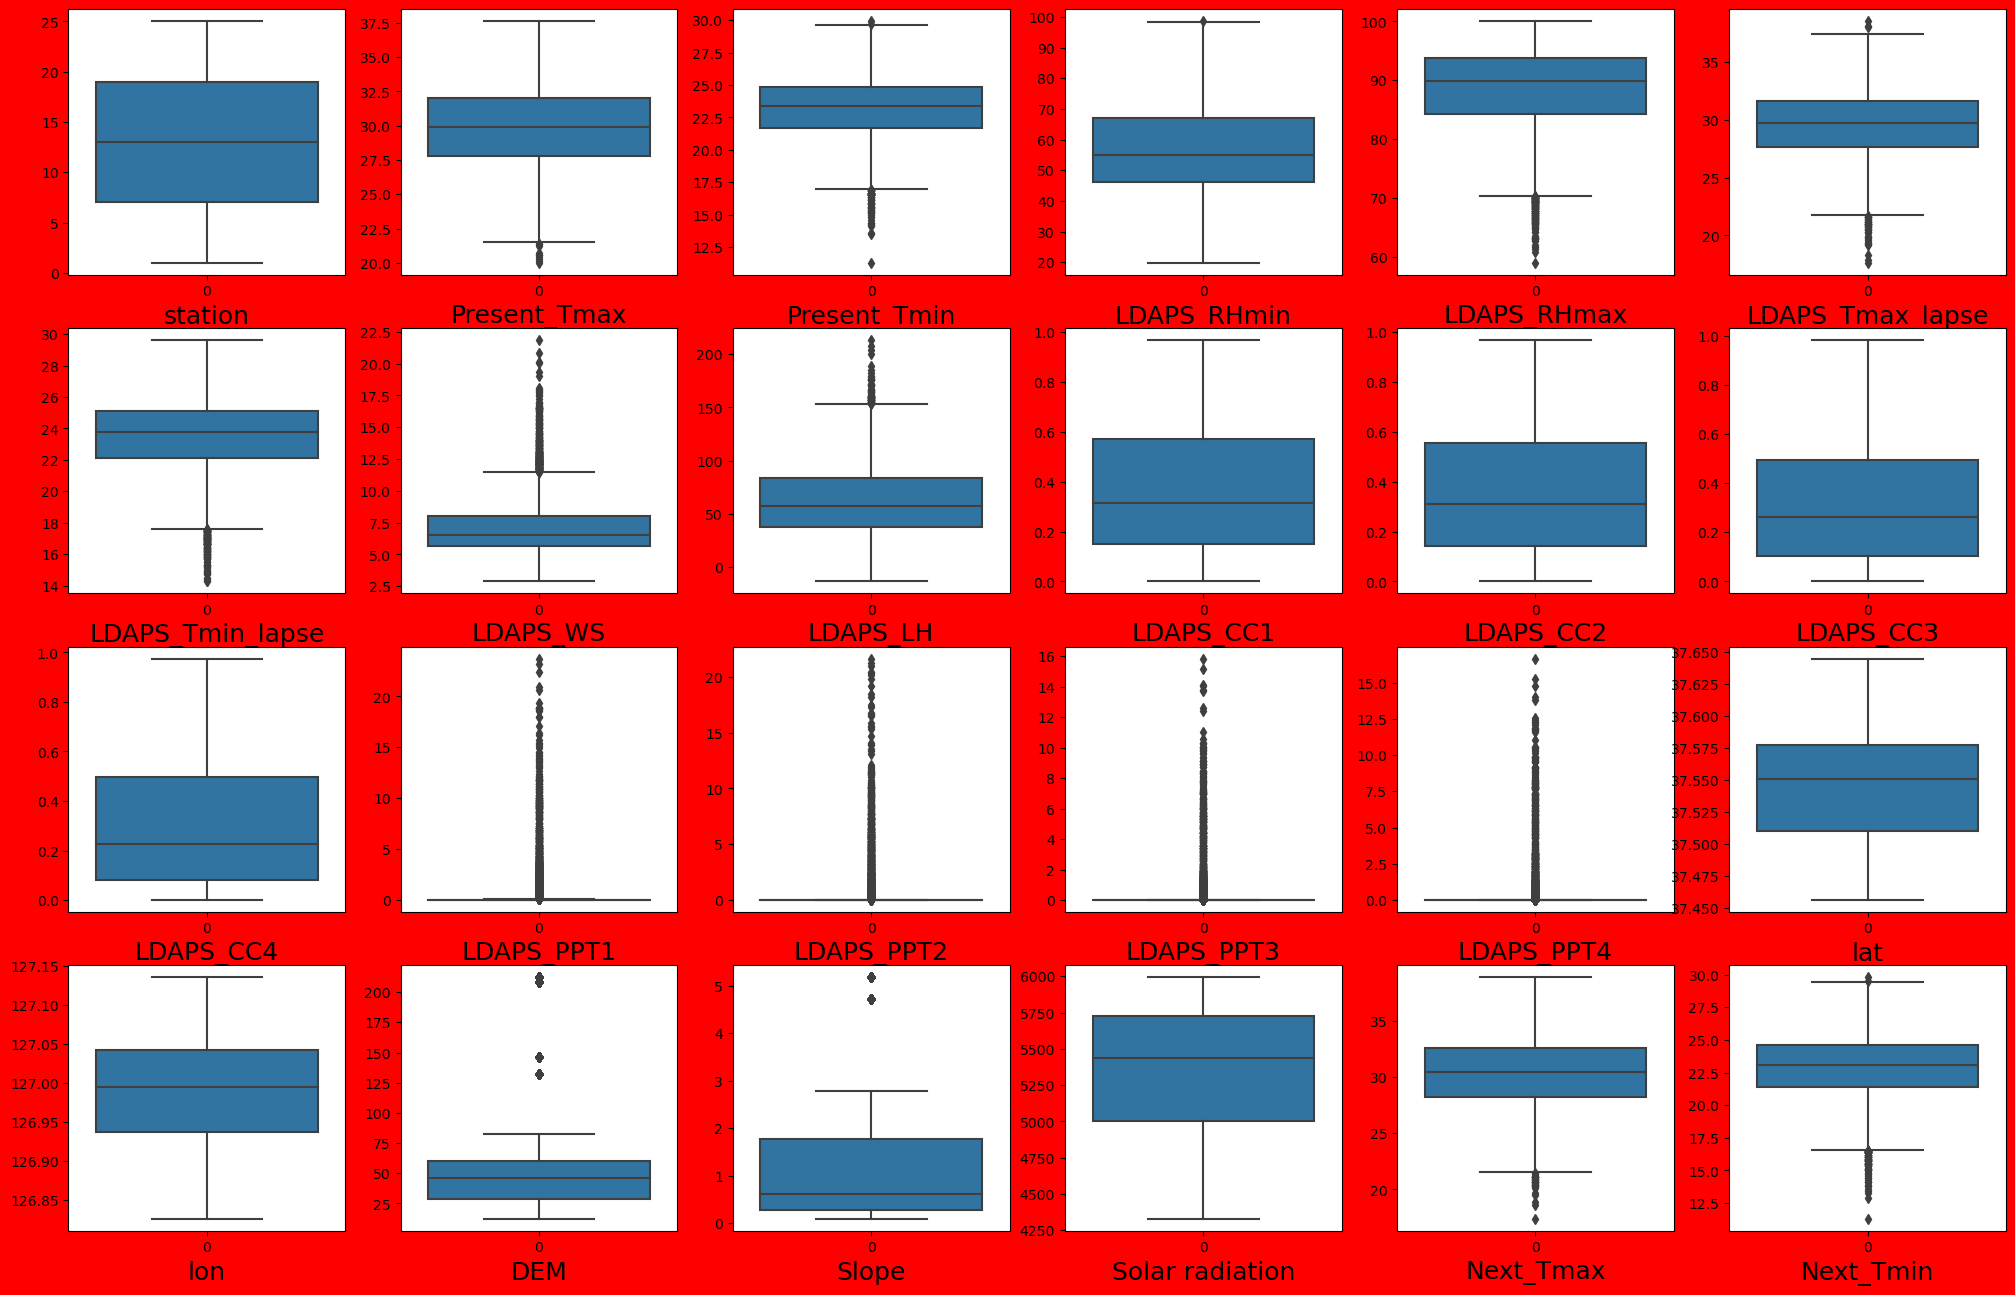

In [57]:
#Checking outliers using boxplot
plt.figure(figsize=(25,20),facecolor="r")
plot=1

for i in df.columns:
    if plot<=28:
        plt.subplot(5,6,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
    plot+=1
    

plt.show()

**Observation:-**
    
*1) Here you can see most of the columns has outliers.*

*2) LDAPS PPT1,PPT2,PPT3,PPT4 columns data points are really close so they can't even create a box for visualization.*

*3) I have to remove those outliers.*

# Removing outliers using zscore

In [58]:
from scipy.stats import zscore
wanted_features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation']]
#Here I avoid to include 'Next_Tmax' and 'Next_Tmin' because these two our Target column and avoide to include station,lat,lon,DEM,Slope because these are categorical columns 
z=np.abs(zscore(wanted_features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.362182      0.761944     0.103776     0.381200          0.526131   
1         0.721332      0.678549     0.307073     0.309640          0.080589   
2         0.619753      0.030307     0.552043     0.617805          0.162758   
3         0.755192      0.072005     0.102686     1.131886          0.030709   
4         0.552033      0.553457     0.038944     0.246759          0.171019   
...            ...           ...          ...          ...               ...   
7745      2.258333      2.263052     2.197656     1.416726          0.615403   
7746      2.461492      2.429842     1.827014     0.657466          0.993724   
7747      2.190613      2.554934     2.056944     1.331624          1.114216   
7748      2.190613      2.304750     2.242110     1.551890          0.889465   
7749      2.224473      2.429842     2.318052     1.559056          0.572093   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0             0.218139  0.125655  0.209167   0.514235   0.590993   0.626788   
1             0.222932  0.645717  0.313357   0.546554   0.404514   0.635833   
2             0.450584  0.439753  1.249084   0.608456   0.382320   0.456586   
3             0.081176  0.665024  0.098045   0.581541   0.504886   0.628954   
4             0.012402  0.625821  1.358187   0.830324   0.411432   0.557753   
...                ...       ...       ...        ...        ...        ...   
7745          2.236249  0.225161  1.576035   1.207547   1.267668   1.275957   
7746          2.446033  0.610557  0.587907   1.155624   1.289677   1.275955   
7747          2.033463  0.434818  0.286929   1.295120   1.069542   1.275957   
7748          2.051551  0.253049  0.453458   1.272757   1.093195   1.275957   
7749          2.141884  0.091404  1.591669   1.222669   1.151986   1.275957   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0      0.661916    0.303923    0.274746     0.23932    0.223166   
1      0.674563    0.303923    0.274746     0.23932    0.223166   
2      0.617674    0.303923    0.274746     0.23932    0.223166   
3      0.648796    0.303923    0.274746     0.23932    0.223166   
4      0.507452    0.303923    0.274746     0.23932    0.223166   
...         ...         ...         ...         ...         ...   
7745   1.161933    0.303923    0.274746     0.23932    0.223166   
7746   1.109391    0.303923    0.274746     0.23932    0.223166   
7747   1.179239    0.303923    0.274746     0.23932    0.223166   
7748   1.179239    0.303923    0.274746     0.23932    0.223166   
7749   1.176093    0.303923    0.274746     0.23932    0.223166   

      Solar radiation  
0            1.518401  
1            1.230307  
2            1.216887  
3            1.201522  
4            1.207554  
...               ...  
7745         2.064311  
7746         2.097462  
7747         2.093941  
7748         2.105458  
7749         2.075219  

[7750 rows x 17 columns]

In [59]:
#Checking the outliers location
np.where(z>3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([ 6, 13, 13, ...,  1,  1,  5], dtype=int64))

In [60]:
#Finding outliers by giving their row and column location
z.iloc[25,6]

3.930169993067017

**You can see the value is above 3 that means it's an outlier.**

# Creating outliers free dataset

In [61]:
new_df=df[(z<3).all(axis=1)]
new_df.shape

(6901, 24)

In [62]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df.shape[0])

Old DataFrame 7750
New DataFrame 6901


In [63]:
print("Data lost percentage is",((df.shape[0]-new_df.shape[0])/new_df.shape[0])*100)

Data lost percentage is 12.302564845674539


**Here you can see the data lost percentage is 12 that is above 10 but we can afford it because it's a huge dataset.**

# Checking Data Distribution using visualization

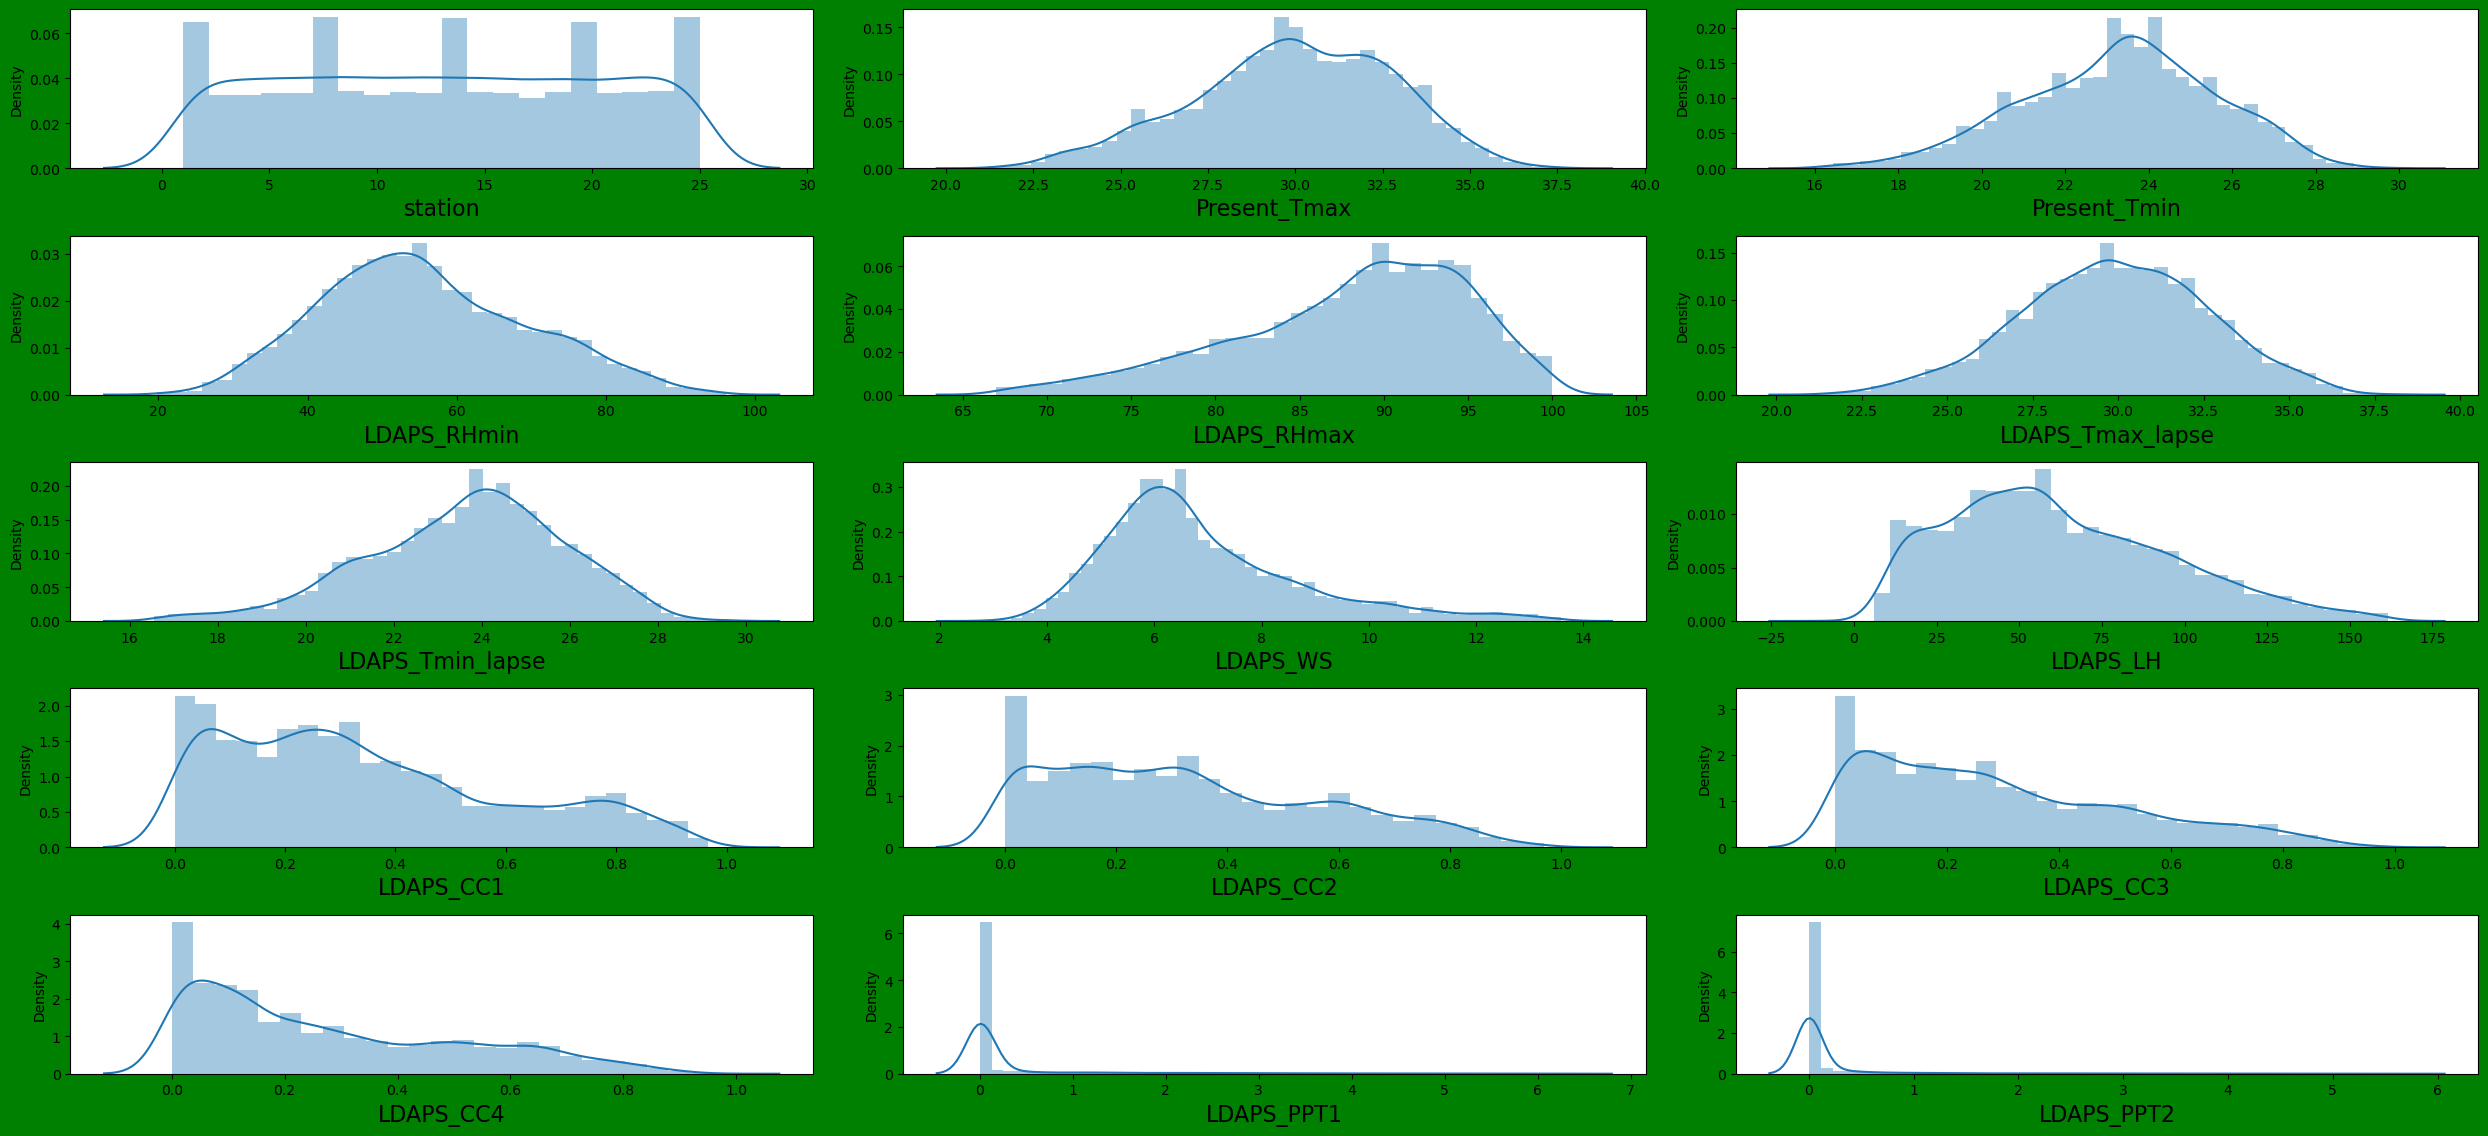

In [64]:
plt.figure(figsize=(25,20),facecolor="g")
plot=1
for i in new_df.columns:
    if plot<=15:
        
        plt.subplot(9,3,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**Observation:-**

*1) Here you can see 'Present_Tmax', 'Present_Tmin','LDAPS_RHmax','LDAPS_Tmin_lapse' have a left tail skewness.*

*2) 'LDAPS_RHmin','LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4' all has right tail skewness.*

*3) 'LDAPS_Tmax_lapse' column is looks normally distributed.*

# Checking Skewness:

In [65]:
new_df.skew().to_frame("Skewness value")

Skewness value
station                 0.002263
Present_Tmax           -0.277658
Present_Tmin           -0.234914
LDAPS_RHmin             0.310336
LDAPS_RHmax            -0.691289
LDAPS_Tmax_lapse       -0.107512
LDAPS_Tmin_lapse       -0.400811
LDAPS_WS                1.096103
LDAPS_LH                0.571347
LDAPS_CC1               0.602181
LDAPS_CC2               0.508225
LDAPS_CC3               0.710078
LDAPS_CC4               0.721434
LDAPS_PPT1              3.746242
LDAPS_PPT2              4.891066
LDAPS_PPT3              5.514663
LDAPS_PPT4              5.973769
lat                     0.106073
lon                    -0.276011
DEM                     1.762882
Slope                   1.593858
Solar radiation        -0.503430
Next_Tmax              -0.269937
Next_Tmin              -0.297103

**Ovservation:-**

*1) Our acceptable skewness range is +0.5 to -0.5.*

*2) You can see some columns are above that range so we have to try to reduce those column's skewness.*

# Reducing Skewness

In [66]:
#Trying to reduce skewness using cube root method
a=new_df["LDAPS_RHmax"]
b=new_df["LDAPS_WS"]
c=new_df["LDAPS_LH"]
d=new_df["LDAPS_CC1"]
e=new_df["LDAPS_CC3"]
f=new_df["LDAPS_CC4"]
g=new_df["LDAPS_PPT1"]
h=new_df["LDAPS_PPT2"]
i=new_df["LDAPS_PPT3"]
j=new_df["LDAPS_PPT4"]
k=new_df["DEM"]
l=new_df["Slope"]







a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)
f=np.cbrt(f)
g=np.cbrt(g)
h=np.cbrt(h)
i=np.cbrt(i)
j=np.cbrt(j)
k=np.cbrt(k)
l=np.cbrt(l)




print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_LH skewness",c.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_CC4 skewness",f.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.8126284691265458
LDAPS_WS skewness 0.6263362941444143
LDAPS_LH skewness -0.27455624888178043
LDAPS_CC1 skewness -0.6660734298925651
LDAPS_CC3 skewness -0.5556845651422581
LDAPS_CC4 skewness -0.419512087708382
LDAPS_PPT1 skewness 1.9393303856843775
LDAPS_PPT2 skewness 2.358236147734518
LDAPS_PPT3 skewness 2.5187091741471614
LDAPS_PPT4 skewness 2.877847217484374
DEM skewness 0.9345230869312524
Slope skewness 0.6220981373533218


**So here you can see by using cube root LDAPS_CC4 and LDAPS_LH column's skewness value are reduced.So I will implement cube root method permanently on these columns.**

In [67]:
#Using cube root permanently for LDAPS_CC4 and LDAPS_LH column's
new_df["LDAPS_CC4"]=np.cbrt(new_df["LDAPS_CC4"])
new_df["LDAPS_LH"]=np.cbrt(new_df["LDAPS_LH"])

In [68]:
#Checking the skewness again
new_df.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            1.096103
LDAPS_LH           -0.274556
LDAPS_CC1           0.602181
LDAPS_CC2           0.508225
LDAPS_CC3           0.710078
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 1.762882
Slope               1.593858
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**Here you can see LDAPS_CC4 and LDAPS_LH column's skewness is now in our acceptable range.Lets try other methods in left out columns:**

In [69]:
#Trying to reduce skewness using square root method
a=new_df["LDAPS_RHmax"]
b=new_df["LDAPS_WS"]
d=new_df["LDAPS_CC1"]
e=new_df["LDAPS_CC3"]
g=new_df["LDAPS_PPT1"]
h=new_df["LDAPS_PPT2"]
i=new_df["LDAPS_PPT3"]
j=new_df["LDAPS_PPT4"]
k=new_df["DEM"]
l=new_df["Slope"]







a=np.cbrt(a)
b=np.cbrt(b)
d=np.cbrt(d)
e=np.cbrt(e)
g=np.cbrt(g)
h=np.cbrt(h)
i=np.cbrt(i)
j=np.cbrt(j)
k=np.cbrt(k)
l=np.cbrt(l)




print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.8126284691265458
LDAPS_WS skewness 0.6263362941444143
LDAPS_CC1 skewness -0.6660734298925651
LDAPS_CC3 skewness -0.5556845651422581
LDAPS_PPT1 skewness 1.9393303856843775
LDAPS_PPT2 skewness 2.358236147734518
LDAPS_PPT3 skewness 2.5187091741471614
LDAPS_PPT4 skewness 2.877847217484374
DEM skewness 0.9345230869312524
Slope skewness 0.6220981373533218


**Square root mothod can't reduce the our skewness so I will try another transformation.**

In [70]:
#Trying to reduce skewness using log method
a=new_df["LDAPS_RHmax"]
b=new_df["LDAPS_WS"]
d=new_df["LDAPS_CC1"]
e=new_df["LDAPS_CC3"]
g=new_df["LDAPS_PPT1"]
h=new_df["LDAPS_PPT2"]
i=new_df["LDAPS_PPT3"]
j=new_df["LDAPS_PPT4"]
k=new_df["DEM"]
l=new_df["Slope"]







a=np.log(a)
b=np.log(b)
d=np.log(d)
e=np.log(e)
g=np.log(g)
h=np.log(h)
i=np.log(i)
j=np.log(j)
k=np.log(k)
l=np.log(l)




print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.875146591941511
LDAPS_WS skewness 0.389106460177068
LDAPS_CC1 skewness nan
LDAPS_CC3 skewness nan
LDAPS_PPT1 skewness nan
LDAPS_PPT2 skewness nan
LDAPS_PPT3 skewness nan
LDAPS_PPT4 skewness nan
DEM skewness 0.41612536026615504
Slope skewness 0.06714364209248151


**So you can see log method works on LDAPS_WS,DEM and Slope column skewness.So I will implement log technique permanently on these columns**

In [71]:
#Using log permanently on LDAPS_WS,DEM and Slope column
new_df["LDAPS_WS"]=np.log(new_df["LDAPS_WS"])
new_df["DEM"]=np.log(new_df["DEM"])
new_df["Slope"]=np.log(new_df["Slope"])

In [72]:
#Checking the skewness again
new_df.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            0.389106
LDAPS_LH           -0.274556
LDAPS_CC1           0.602181
LDAPS_CC2           0.508225
LDAPS_CC3           0.710078
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 0.416125
Slope               0.067144
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**So you can see DEM,Slope and LDAPS_WS column skewness is reduced.So let try to reduce left over column's skewness**

In [73]:
#Trying to reduce skewness using log + 1 method
a=new_df["LDAPS_RHmax"]
d=new_df["LDAPS_CC1"]
e=new_df["LDAPS_CC3"]
g=new_df["LDAPS_PPT1"]
h=new_df["LDAPS_PPT2"]
i=new_df["LDAPS_PPT3"]
j=new_df["LDAPS_PPT4"]


a=np.log1p(a)
d=np.log1p(d)
e=np.log1p(e)
g=np.log1p(g)
h=np.log1p(h)
i=np.log1p(i)
j=np.log1p(j)

print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())

LDAPS_RHmax skewness: -0.8729058046813458
LDAPS_CC1 skewness 0.3329858378755628
LDAPS_CC3 skewness 0.44549429826325243
LDAPS_PPT1 skewness 2.766374714317934
LDAPS_PPT2 skewness 3.663962934104666
LDAPS_PPT3 skewness 4.238999010900155
LDAPS_PPT4 skewness 4.647081959855196


**So you can see log1p can reduce the LDAPS_CC1 and LDAPS_CC3 columns skewness.So I will implement it permanently.**

In [74]:
#Using log1p permanently on  LDAPS_CC1 and LDAPS_CC3 column's
new_df["LDAPS_CC1"]=np.log1p(new_df["LDAPS_CC1"])
new_df["LDAPS_CC3"]=np.log1p(new_df["LDAPS_CC3"])

In [75]:
#Checking the skewness again
new_df.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            0.389106
LDAPS_LH           -0.274556
LDAPS_CC1           0.332986
LDAPS_CC2           0.508225
LDAPS_CC3           0.445494
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 0.416125
Slope               0.067144
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**So you can see LDAPS_CC1 and LDAPS_CC3 column's skewness is reduced.So let try to reduce left over column's skewness**

In [76]:
#Trying to reduce skewness using PowerTransform method to LDAPS_RHmax,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 these columns

a=new_df["LDAPS_RHmax"]
g=new_df["LDAPS_PPT1"]
h=new_df["LDAPS_PPT2"]
i=new_df["LDAPS_PPT3"]
j=new_df["LDAPS_PPT4"]

#using PowerTransformer to reduce the skewness of LDAPS_RHmax,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 these columns
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

a_reshape=a.values.reshape(-1,1)
g_reshape=g.values.reshape(-1,1)
h_reshape=h.values.reshape(-1,1)
i_reshape=i.values.reshape(-1,1)
j_reshape=j.values.reshape(-1,1)

#Now fitting the Transformer
a_transform=pt.fit_transform(a_reshape)
g_transform=pt.fit_transform(g_reshape)
h_transform=pt.fit_transform(h_reshape)
i_transform=pt.fit_transform(i_reshape)
j_transform=pt.fit_transform(j_reshape)


#Converting transformed array back to the DataFrame
a=pd.DataFrame(a_transform)
g=pd.DataFrame(g_transform)
h=pd.DataFrame(h_transform)
i=pd.DataFrame(i_transform)
j=pd.DataFrame(j_transform)

print("LDAPS_RHmax skewness",a.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("HS-304 skewness",i.skew())
print("CS-302 skewness",j.skew())


LDAPS_RHmax skewness 0   -0.100057
dtype: float64
LDAPS_PPT1 skewness 0    1.628773
dtype: float64
LDAPS_PPT2 skewness 0    1.831352
dtype: float64
HS-304 skewness 0    2.005938
dtype: float64
CS-302 skewness 0    2.288001
dtype: float64


**Here you can see PowerTransformer can reduce the skewness of LDAPS_RHmax  column,  So I will implement it permanently:**

In [77]:
#Implementing PowerTransformer on LDAPS_RHmax column

from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

LDAPS_RHmax_reshape=new_df["LDAPS_RHmax"].values.reshape(-1,1)



#Now fitting the Transformer
LDAPS_RHmax_transform=pt.fit_transform(LDAPS_RHmax_reshape)


#Converting transformed array back to the DataFrame
new_df["LDAPS_RHmax"]=pd.DataFrame(LDAPS_RHmax_transform)


In [78]:
#Checking the skewness again
new_df.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.094315
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            0.389106
LDAPS_LH           -0.274556
LDAPS_CC1           0.332986
LDAPS_CC2           0.508225
LDAPS_CC3           0.445494
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 0.416125
Slope               0.067144
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**So you can see LDAPS_RHmax column's skewness is reduced.For rest of the columns I can use boxcox and if these column still have higher skewness after applying the boxcox I have to consider these skewness are their deefault skewness value.**

In [79]:
#Appliing boxcox to 
from scipy.stats import boxcox

try:
    g=new_df["LDAPS_PPT1"]
    h=new_df["LDAPS_PPT2"]
    i=new_df["LDAPS_PPT3"]
    j=new_df["LDAPS_PPT4"]

    g=boxcox(g)
    h=boxcox(h)
    i=boxcox(i)
    j=boxcox(j)

    print("LDAPS_PPT1 skewness",g.skew())
    print("LDAPS_PPT2 skewness",h.skew())
    print("LDAPS_PPT3 skewness",i.skew())
    print("LDAPS_PPT4 skewness",j.skew())
    
    
except:
    print("Data must be positive.")

Data must be positive.


**Final Observation:-**
    
*So you can see I applied cbrt,sqrt,boxcox,log,log1p but nothing can reduce LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 these columns skewness so I have to consider these skewness are their default skewness.*

In [80]:
#Checking for null values again
new_df.isnull().sum()

station               0
Present_Tmax          0
Present_Tmin          0
LDAPS_RHmin           0
LDAPS_RHmax         720
LDAPS_Tmax_lapse      0
LDAPS_Tmin_lapse      0
LDAPS_WS              0
LDAPS_LH              0
LDAPS_CC1             0
LDAPS_CC2             0
LDAPS_CC3             0
LDAPS_CC4             0
LDAPS_PPT1            0
LDAPS_PPT2            0
LDAPS_PPT3            0
LDAPS_PPT4            0
lat                   0
lon                   0
DEM                   0
Slope                 0
Solar radiation       0
Next_Tmax             0
Next_Tmin             0
dtype: int64

**Here you can see after using the PowerTranformer on LDAPS_RHmax column ther are some null values occur. I will fill those values with this column's median so I don't have to suffer outliers problem leter on.**

In [81]:
#Filling LDAPS_RHmax column's nan values with it's median
new_df["LDAPS_RHmax"].fillna(round(new_df["LDAPS_RHmax"].median(),6),inplace=True)

In [82]:
#Checking for null values again
new_df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

Now you can see there are no null values are present.**

# Checking Data Distribution Again

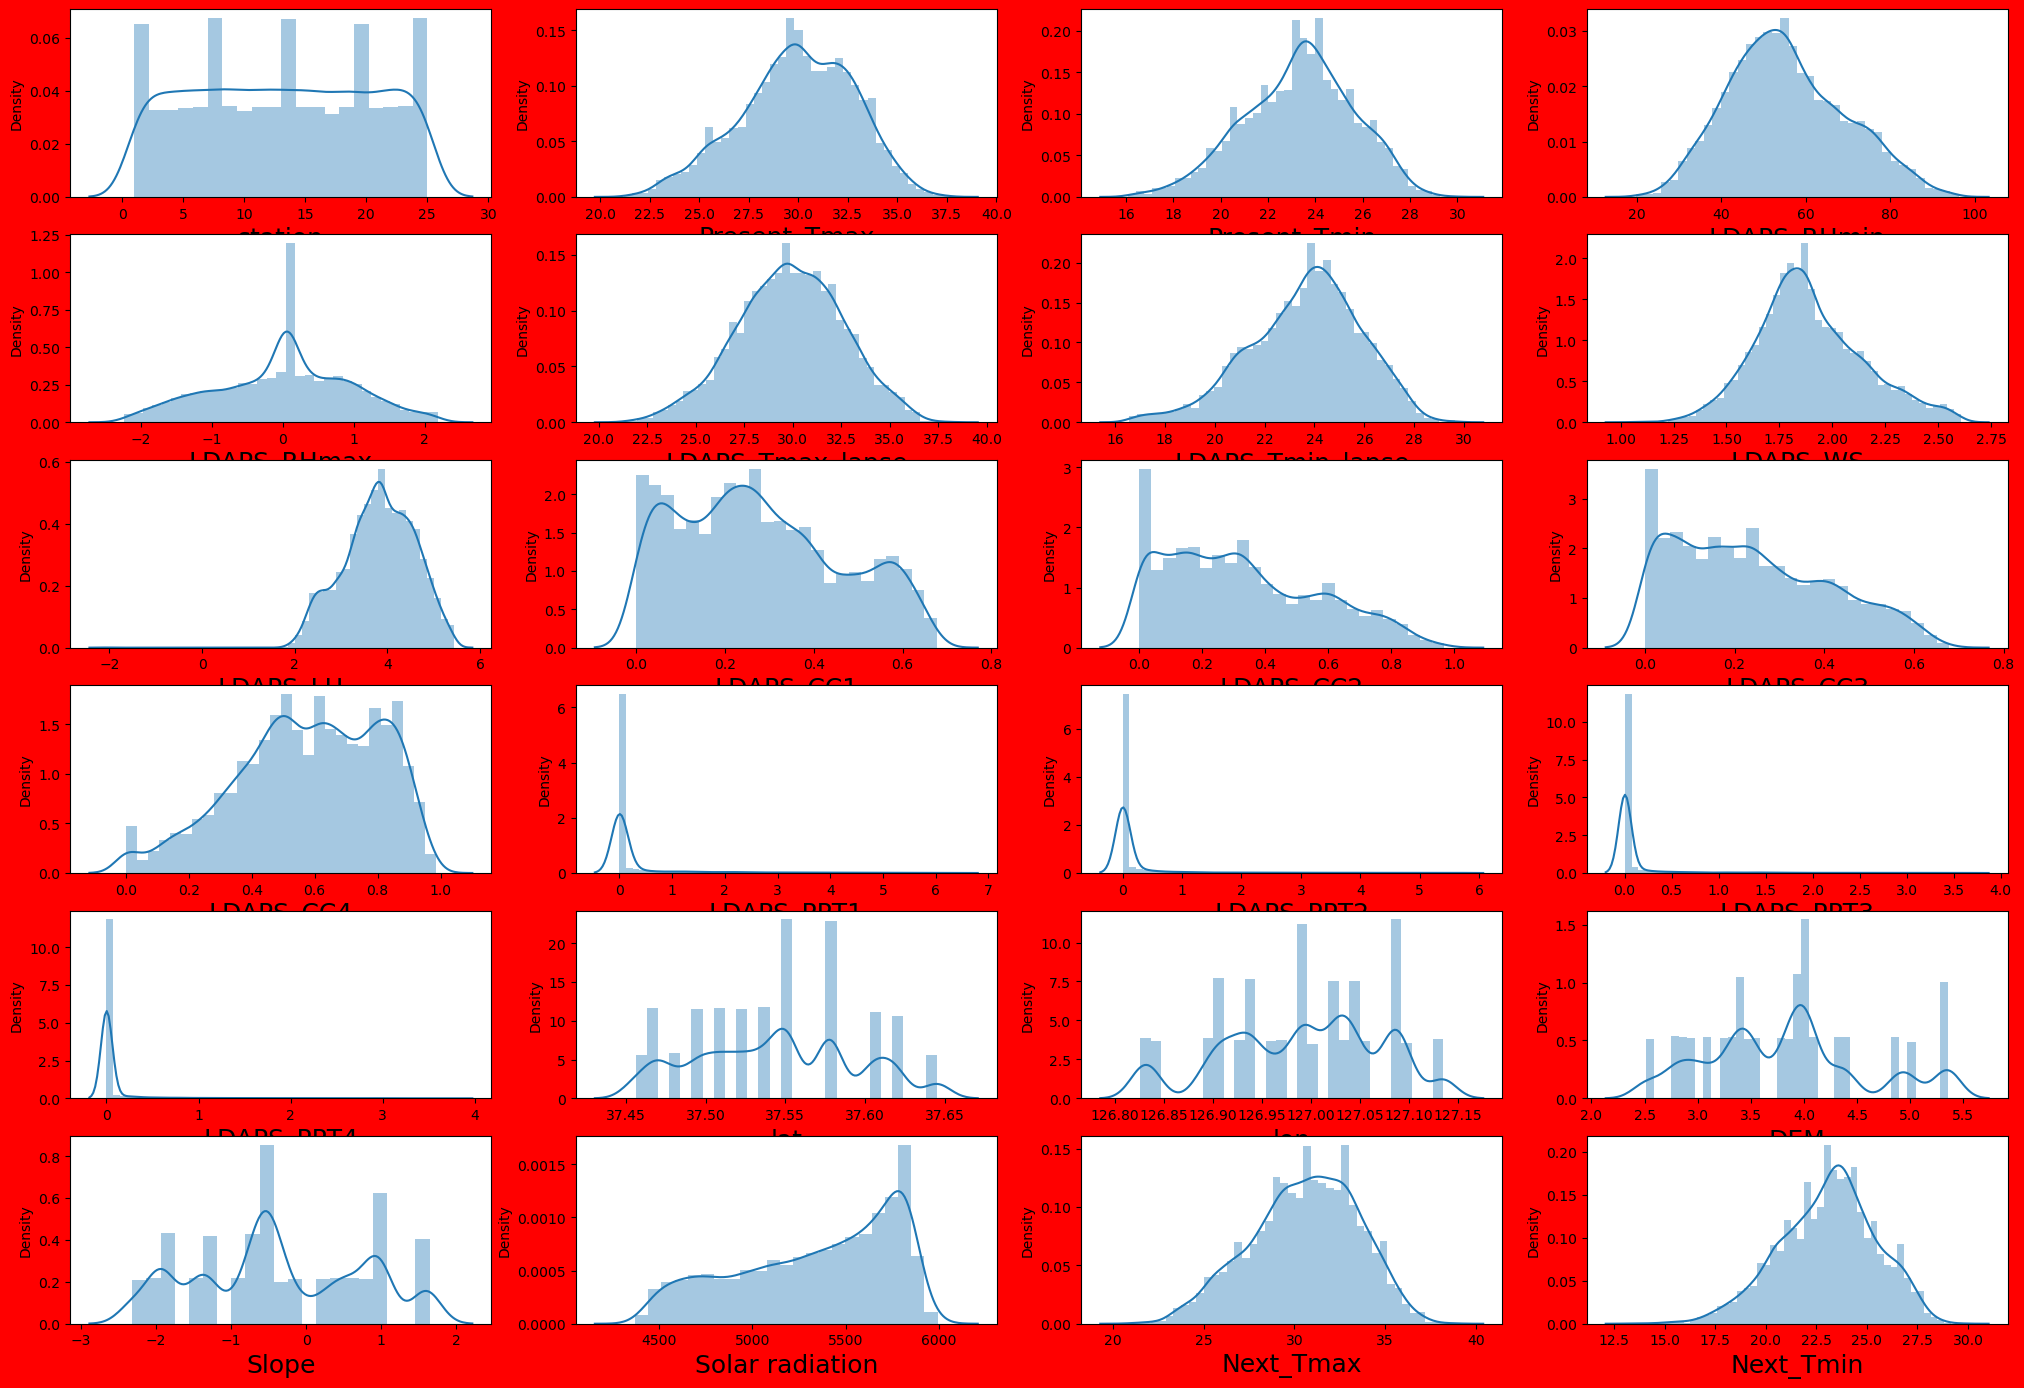

<Figure size 640x480 with 0 Axes>

In [83]:
plt .figure(figsize=(25,20),facecolor="r")
plot=1

for i in new_df.columns:
    if plot<27:
        plt.subplot(7,4,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Observation:-** 
    
*So you can see most of the columns that have skewness under accptable range some of them are look like normally distributed.*

# Checking correlation between all columns

In [84]:
new_df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110581      0.132761    -0.067398   
Present_Tmax      0.110581      1.000000      0.614416    -0.149638   
Present_Tmin      0.132761      0.614416      1.000000     0.152369   
LDAPS_RHmin      -0.067398     -0.149638      0.152369     1.000000   
LDAPS_RHmax      -0.014739     -0.066968     -0.012326     0.036910   
LDAPS_Tmax_lapse  0.066364      0.535863      0.436694    -0.551152   
LDAPS_Tmin_lapse  0.103964      0.611716      0.756629     0.136908   
LDAPS_WS          0.025395     -0.086848      0.024869     0.199459   
LDAPS_LH         -0.135484      0.110390     -0.013475     0.007797   
LDAPS_CC1         0.011015     -0.284455      0.098097     0.581416   
LDAPS_CC2         0.006916     -0.153736      0.118491     0.714723   
LDAPS_CC3         0.007916     -0.059896      0.043026     0.651927   
LDAPS_CC4         0.012506     -0.043004      0.017283     0.459314   
LDAPS_PPT1       -0.002709     -0.135157      0.068919     0.291552   
LDAPS_PPT2       -0.021617     -0.041142      0.080084     0.376456   
LDAPS_PPT3        0.002863     -0.016496      0.032538     0.260327   
LDAPS_PPT4        0.014286     -0.043645     -0.057120     0.185919   
lat              -0.239932     -0.051180     -0.071682     0.089616   
lon              -0.122079      0.010649     -0.044933    -0.095152   
DEM              -0.312368     -0.142151     -0.244892     0.065868   
Slope            -0.140475     -0.092625     -0.164756     0.070480   
Solar radiation  -0.028565     -0.061212      0.015879     0.253060   
Next_Tmax         0.106367      0.586895      0.449007    -0.426429   
Next_Tmin         0.128311      0.615625      0.786178     0.140575   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.014739          0.066364          0.103964  0.025395   
Present_Tmax        -0.066968          0.535863          0.611716 -0.086848   
Present_Tmin        -0.012326          0.436694          0.756629  0.024869   
LDAPS_RHmin          0.036910         -0.551152          0.136908  0.199459   
LDAPS_RHmax          1.000000          0.010680         -0.000821  0.048792   
LDAPS_Tmax_lapse     0.010680          1.000000          0.620307 -0.186102   
LDAPS_Tmin_lapse    -0.000821          0.620307          1.000000 -0.028571   
LDAPS_WS             0.048792         -0.186102         -0.028571  1.000000   
LDAPS_LH            -0.009086         -0.008413         -0.145705 -0.050131   
LDAPS_CC1            0.076697         -0.410279          0.060956  0.222535   
LDAPS_CC2            0.057282         -0.490450          0.106812  0.183001   
LDAPS_CC3            0.044484         -0.490055          0.032943  0.117827   
LDAPS_CC4            0.052358         -0.341145          0.010019  0.106022   
LDAPS_PPT1           0.036871         -0.181744         -0.008802  0.162006   
LDAPS_PPT2          -0.012566         -0.237277          0.013093  0.100300   
LDAPS_PPT3           0.002234         -0.140929          0.013816  0.107031   
LDAPS_PPT4           0.002846         -0.159753         -0.079388  0.177251   
lat                 -0.015521         -0.038447         -0.089888 -0.020441   
lon                 -0.009855          0.102172         -0.031088 -0.075913   
DEM                  0.000925         -0.127331         -0.178649  0.124572   
Slope               -0.003641         -0.096949         -0.154496  0.100356   
Solar radiation      0.157394          0.015544          0.111941  0.142075   
Next_Tmax           -0.042743          0.808212          0.542410 -0.236467   
Next_Tmin           -0.019852          0.547803          0.871019  0.005596   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.135484   0.011015  ...   -0.021617    0.002863   
Present_Tmax      0.110390  -0.284455  ...   -0.041142   -0.016496   
Present_Tmin     -0.013475   0.098097  ...    0.080084   

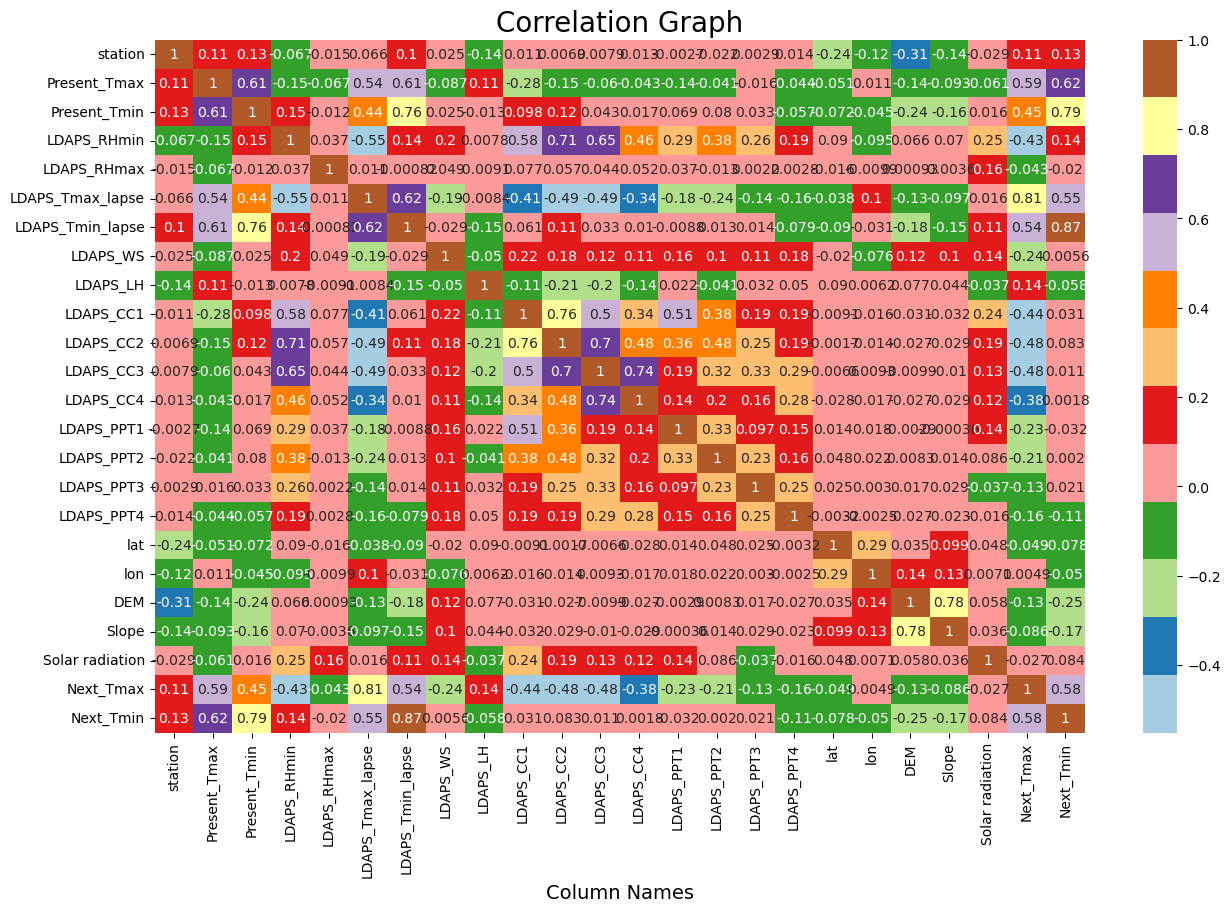

In [85]:
#Visualizing checking correlation between all the columns using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df.corr(),cmap="Paired",annot=True)
plt.xlabel("Column Names",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.show()

**Observation:-**
    
*1) Here you can see our Target column Next_Tmax highly positive correlated with LDAPS_Tmin_lapse.*

*2) And our Target column Next_Tmax most negatively correlated with LDAPS_CC2, LDAPS_CC3.*

# Non Graphycal Analysis For Correlation With Our Target Column

In [86]:
#Checking skewness in ascending order towards our Target column Next_Tmax
df.corr()["Next_Tmax"].sort_values(ascending=True)

LDAPS_CC3          -0.521889
LDAPS_CC2          -0.496447
LDAPS_CC1          -0.458583
LDAPS_CC4          -0.453778
LDAPS_RHmin        -0.443380
LDAPS_WS           -0.352291
LDAPS_RHmax        -0.285154
LDAPS_PPT3         -0.206195
LDAPS_PPT4         -0.189670
LDAPS_PPT2         -0.188737
DEM                -0.174423
LDAPS_PPT1         -0.128945
Slope              -0.105391
lat                -0.054514
lon                -0.000193
Solar radiation     0.006983
station             0.107056
LDAPS_LH            0.154307
Present_Tmin        0.470010
LDAPS_Tmin_lapse    0.587921
Present_Tmax        0.609517
Next_Tmin           0.620245
LDAPS_Tmax_lapse    0.828698
Next_Tmax           1.000000
Name: Next_Tmax, dtype: float64

**Here you can see all columns skewness towards our Target column Next_Tmax.**

# Separating Target column and Features

In [87]:
#Separating Target and Independent variable
x=df.iloc[:,:22]
y=df.iloc[:,22]

print("Features Dimension",x.shape)
print("Label Dimension",y.shape)

Features Dimension (7750, 22)
Label Dimension (7750,)


In [88]:
x.sample(3)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
1640     16.0          23.5          19.5    43.987080    85.445656   
717      18.0          27.1          23.7    59.892162    96.727783   
4034     10.0          32.9          22.7    56.098297    86.885544   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
1640         30.113299         20.892356  5.824990  102.209189   0.315165   
717          30.453412         24.471740  8.215129   93.958048   0.523784   
4034         32.734215         25.635798  5.567582   88.169086   0.028143   

      ...  LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
1640  ...   0.162349    0.000000         0.0    0.000000    0.164813  37.4697   
717   ...   0.051906    2.472061         0.0    0.000000    0.000000  37.4832   
4034  ...   0.170103    0.000000         0.0    2.511461    3.163724  37.4562   

          lon       DEM   Slope  Solar radiation  
1640  126.995   82.2912  2.2579      5842.662598  
717   127.024   56.4448  1.2313      5483.366699  
4034  126.955  208.5070  5.1782      5239.571777  

[3 rows x 22 columns]

In [89]:
y.sample(2)

6842    32.9
6564    27.6
Name: Next_Tmax, dtype: float64

# Feature scalling using StandardScaler

In [90]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x=pd.DataFrame(SS.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664101     -0.362182     -0.761944     0.103776     0.381200   
1    -1.525426      0.721332     -0.678549    -0.307073     0.309640   
2    -1.386750      0.619753      0.030307    -0.552043    -0.617805   
3    -1.248075      0.755192      0.072005     0.102686     1.131886   
4    -1.109400      0.552033     -0.553457    -0.038944     0.246759   
...        ...           ...           ...          ...          ...   
7745  1.109400     -2.258333     -2.263052    -2.197656    -1.416726   
7746  1.248075     -2.461492     -2.429842    -1.827014    -0.657466   
7747  1.386750     -2.190613     -2.554934    -2.056944    -1.331624   
7748  1.525426     -2.190613     -2.304750    -2.242110    -1.551890   
7749  1.664101     -2.224473     -2.429842    -2.318052    -1.559056   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.526131         -0.218139 -0.125655  0.209167  -0.514235  ...   
1             0.080589          0.222932 -0.645717 -0.313357  -0.546554  ...   
2             0.162758          0.450584 -0.439753 -1.249084  -0.608456  ...   
3             0.030709         -0.081176 -0.665024  0.098045  -0.581541  ...   
4            -0.171019         -0.012402 -0.625821  1.358187  -0.830324  ...   
...                ...               ...       ...       ...        ...  ...   
7745         -0.615403         -2.236249 -0.225161 -1.576035  -1.207547  ...   
7746         -0.993724         -2.446033 -0.610557  0.587907  -1.155624  ...   
7747         -1.114216         -2.033463 -0.434818  0.286929  -1.295120  ...   
7748         -0.889465         -2.051551 -0.253049 -0.453458  -1.272757  ...   
7749         -0.572093         -2.141884  0.091404 -1.591669  -1.222669  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.661916   -0.303923   -0.274746    -0.23932   -0.223166  1.189704   
1     -0.674563   -0.303923   -0.274746    -0.23932   -0.223166  1.189704   
2     -0.617674   -0.303923   -0.274746    -0.23932   -0.223166  0.653264   
3     -0.648796   -0.303923   -0.274746    -0.23932   -0.223166  1.992377   
4     -0.507452   -0.303923   -0.274746    -0.23932   -0.223166  0.118811   
...         ...         ...         ...         ...         ...       ...   
7745  -1.161933   -0.303923   -0.274746    -0.23932   -0.223166  0.118811   
7746  -1.109391   -0.303923   -0.274746    -0.23932   -0.223166 -0.685848   
7747  -1.179239   -0.303923   -0.274746    -0.23932   -0.223166 -0.149408   
7748  -1.179239   -0.303923   -0.274746    -0.23932   -0.223166 -0.417628   
7749  -1.176093   -0.303923   -0.274746    -0.23932   -0.223166 -0.417628   

           lon       DEM     Slope  Solar radiation  
0    -0.005038  2.773649  1.115761         1.518401  
1     0.511327 -0.315050 -0.542139         1.230307  
2     0.838778 -0.526200 -0.723195         1.216887  
3     0.385384 -0.297473  0.933099         1.201522  
4     1.808536 -0.494290 -0.548418         1.207554  
...        ...       ...       ...              ...  
7745  0.612081 -0.655386 -0.499795        -2.064311  
7746  1.191417 -0.735219 -0.820220        -2.097462  
7747 -1.264464 -0.852800 -0.804013        -2.093941  
7748 -1.037767 -0.821318 -0.755171        -2.105458  
7749 -0.269517 -0.779131 -0.719398        -2.075219  

[7750 rows x 22 columns]

# Checking Multicollinearity

In [91]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns

In [92]:
vif

VIF Values     Features Name
0     1.229869           station
1     2.790007      Present_Tmax
2     3.083463      Present_Tmin
3     6.405929       LDAPS_RHmin
4     2.223080       LDAPS_RHmax
5     7.530619  LDAPS_Tmax_lapse
6     7.225213  LDAPS_Tmin_lapse
7     1.263623          LDAPS_WS
8     1.515016          LDAPS_LH
9     3.495584         LDAPS_CC1
10    5.214675         LDAPS_CC2
11    5.277642         LDAPS_CC3
12    2.979007         LDAPS_CC4
13    1.418355        LDAPS_PPT1
14    1.464126        LDAPS_PPT2
15    1.268985        LDAPS_PPT3
16    1.265725        LDAPS_PPT4
17    1.229723               lat
18    1.171424               lon
19    3.161352               DEM
20    2.976092             Slope
21    1.236206   Solar radiation

**Observation:-**
    
*So here you can see all columns VIF values are under 10 that means there are no multicolinearity present and I don't have to delete any column.*

# Modeling

# Finding the best Random State

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MaxAcc=0
MaxRs=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    Acc=r2_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"in the random state: ",MaxRs)

Max Accuracy is 0.9082260887113695 in the random state:  60


# Creating train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=MaxRs)

In [95]:
#Importing Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

**LinearRegression**

In [96]:
#Testing LinearRegression r2_score with all error metrics
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLR))
print("Mean Squared Error:-",mean_squared_error(y_test,predLR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLR)))

R2 Score:- 0.780188947952029
Mean Squared Error:- 2.1795142263222607
Mean Absolute Error:- 1.1119258644912942
Root Mean Absolute Error:- 1.0544789540295691


**RandomForestRegressor**

In [97]:
#Testing RandomForestRegressor r2_score with all error metrics
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRFR))
print("Mean Squared Error:-",mean_squared_error(y_test,predRFR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRFR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRFR)))

R2 Score:- 0.9070794537544444
Mean Squared Error:- 0.921344266236559
Mean Absolute Error:- 0.7199255913978494
Root Mean Absolute Error:- 0.8484842906016878


**ExtraTreesRegressor**

In [98]:
#Testing ExtraTreesRegressor r2_score with all error metrics
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predETR))
print("Mean Squared Error:-",mean_squared_error(y_test,predETR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predETR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predETR)))

R2 Score:- 0.9254252320786094
Mean Squared Error:- 0.7394385591397848
Mean Absolute Error:- 0.647330752688172
Root Mean Absolute Error:- 0.8045686749359385


**DecisionTreeRegressor**

In [99]:
#Testing DecisionTreeRegressor r2_score with all error metrics
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predDTR))
print("Mean Squared Error:-",mean_squared_error(y_test,predDTR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predDTR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predDTR)))

R2 Score:- 0.7705773346852614
Mean Squared Error:- 2.2748172043010757
Mean Absolute Error:- 1.0654193548387094
Root Mean Absolute Error:- 1.0321915301138203


**KNeighborsRegressor**

In [100]:
#Testing KNeighborsRegressor r2_score with all error metrics
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predKNN))
print("Mean Squared Error:-",mean_squared_error(y_test,predKNN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predKNN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predKNN)))

R2 Score:- 0.8455081709036428
Mean Squared Error:- 1.5318480860215051
Mean Absolute Error:- 0.9247569892473118
Root Mean Absolute Error:- 0.9616428595103859


**SVR**

In [101]:
#Testing SVR r2_score with all error metrics
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print("R2 Score:-",r2_score(y_test,predsvr))
print("Mean Squared Error:-",mean_squared_error(y_test,predsvr))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predsvr))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predsvr)))

R2 Score:- 0.8569129538162731
Mean Squared Error:- 1.4187651160133823
Mean Absolute Error:- 0.8597886055485812
Root Mean Absolute Error:- 0.9272478662949736


**Lasso**

In [102]:
#Testing Lasso r2_score with all error metrics
Lasso=Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLasso))
print("Mean Squared Error:-",mean_squared_error(y_test,predLasso))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLasso))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLasso)))

R2 Score:- 0.5970506282803449
Mean Squared Error:- 3.99540368861408
Mean Absolute Error:- 1.5933877202266362
Root Mean Absolute Error:- 1.2622946249693991


**RIDGE**

In [103]:
#Testing Ridge r2_score with all error metrics
ridge=Ridge()
ridge.fit(x_train,y_train)
predRidge=ridge.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRidge))
print("Mean Squared Error:-",mean_squared_error(y_test,predRidge))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRidge))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRidge)))

R2 Score:- 0.780175961594659
Mean Squared Error:- 2.1796429912336355
Mean Absolute Error:- 1.1119381842489895
Root Mean Absolute Error:- 1.0544847956461911


**GradientBoostingRegressor**

In [104]:
#Testing GradientBoostingRegressor r2_score with all error metrics
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predGBR))
print("Mean Squared Error:-",mean_squared_error(y_test,predGBR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predGBR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predGBR)))

R2 Score:- 0.8521049328439105
Mean Squared Error:- 1.4664385610566868
Mean Absolute Error:- 0.9233105201724908
Root Mean Absolute Error:- 0.9608904829232574


**ElasticNet**

In [105]:
#Testing ElasticNet r2_score with all error metrics
EN=ElasticNet()
EN.fit(x_train,y_train)
predEN=EN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predEN))
print("Mean Squared Error:-",mean_squared_error(y_test,predEN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predEN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predEN)))

R2 Score:- 0.6539882770564177
Mean Squared Error:- 3.430844198249109
Mean Absolute Error:- 1.466884231696275
Root Mean Absolute Error:- 1.2111499625134268


**Observation:-**
    
*1)Considering all the metrics, ExtraTreesRegressor consistently performs well, having the highest R2 score and the lowest values for MSE, MAE, and RMSE.So I can say ExtraTreesRegressor is our best model but we have to do cross validation to confirm that*

# Cross Validation

**In crossvalidation of Regressors we have to use a parameter called scoring and we have to put "r2" as it's value.**

In [106]:
from sklearn.model_selection import cross_val_score
result1=cross_val_score(LR,x,y,scoring="r2")
print(result1)
print(result1.mean())
print("The differents between R2 Score of LinearRegression with it's cross validation is :-",(r2_score(y_test,predLR)-result1.mean())*100)

[0.68023045 0.65912132 0.70424428 0.79776661 0.69569138]
0.7074108086779901
The differents between R2 Score of LinearRegression with it's cross validation is :- 7.277813927403887


In [107]:
result2=cross_val_score(RFR,x,y,scoring="r2")
print(result2)
print(result2.mean())
print("The differents between R2 Score of RandomForestRegressor with it's cross validation is :-",(r2_score(y_test,predRFR)-result2.mean())*100)

[0.70536464 0.64443127 0.64304213 0.79574316 0.64216292]
0.6861488248882728
The differents between R2 Score of RandomForestRegressor with it's cross validation is :- 22.093062886617165


In [108]:
result3=cross_val_score(ETR,x,y,scoring="r2")
print(result3)
print(result3.mean())
print("The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :-",(r2_score(y_test,predETR)-result3.mean())*100)

[0.7159693  0.6484849  0.64850862 0.79194869 0.67870758]
0.696723820425429
The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :- 22.870141165318035


In [109]:
result4=cross_val_score(DTR,x,y,scoring="r2")
print(result4)
print(result4.mean())
print("The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :-",(r2_score(y_test,predDTR)-result4.mean())*100)

[0.43744721 0.41960201 0.27374264 0.64004108 0.44313069]
0.44279272821753957
The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :- 32.77846064677218


In [110]:
result5=cross_val_score(KNN,x,y,scoring="r2")
print(result5)
print(result5.mean())
print("The differents between R2 Score of KNeighborsRegressor with it's cross validation is :-",(r2_score(y_test,predKNN)-result5.mean())*100)

[0.63205004 0.4872498  0.48044696 0.67830797 0.61585349]
0.5787816531748258
The differents between R2 Score of KNeighborsRegressor with it's cross validation is :- 26.672651772881707


In [111]:
result6=cross_val_score(svr,x,y,scoring="r2")
print(result6)
print(result6.mean())
print("The differents between R2 Score of SVR with it's cross validation is :-",(r2_score(y_test,predsvr)-result6.mean())*100)

[0.64800496 0.60881766 0.68134505 0.73935974 0.67393605]
0.6702926913316769
The differents between R2 Score of SVR with it's cross validation is :- 18.662026248459618


In [112]:
result7=cross_val_score(Lasso,x,y,scoring="r2")
print(result7)
print(result7.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predLasso)-result7.mean())*100)

[0.51357802 0.52993217 0.57337945 0.51081949 0.59084481]
0.5437107881629615
The differents between R2 Score of Lasso with it's cross validation is :- 5.333984011738346


In [113]:
result8=cross_val_score(ridge,x,y,scoring="r2")
print(result8)
print(result8.mean())
print("The differents between R2 Score of Ridge with it's cross validation is :-",(r2_score(y_test,predRidge)-result8.mean())*100)

[0.68033532 0.65904716 0.70421859 0.79781478 0.69573828]
0.7074308258518581
The differents between R2 Score of Ridge with it's cross validation is :- 7.274513574280084


In [114]:
result9=cross_val_score(GBR,x,y,scoring="r2")
print(result9)
print(result9.mean())
print("The differents between R2 Score of GradientBoostingRegressor with it's cross validation is :-",(r2_score(y_test,predGBR)-result9.mean())*100)

[0.69392648 0.67502203 0.65586971 0.7933364  0.67155881]
0.6979426864770295
The differents between R2 Score of GradientBoostingRegressor with it's cross validation is :- 15.416224636688103


In [115]:
result10=cross_val_score(EN,x,y,scoring="r2")
print(result10)
print(result10.mean())
print("The differents between R2 Score of ElasticNet with it's cross validation is :-",(r2_score(y_test,predEN)-result10.mean())*100)

[0.60076217 0.52229226 0.58393447 0.58506533 0.62821104]
0.5840530534438741
The differents between R2 Score of ElasticNet with it's cross validation is :- 6.993522361254357


**Observation:-**
    
*1) Considering the overall cross val difference and generalization performance, LinearRegression, Lasso, and Ridge seem to be more more preferable.*

*2) I pick ridge over LinearRegression because Ridge is a regularization technique also.*

*3) So ridge is our best model.*

# Hyper Parameter Tuning

In [142]:
#Ridge
from sklearn.model_selection import GridSearchCV

paramiter={"alpha":[1.0,.05, .4,2], 
       "fit_intercept":[True, False],
       "solver":["auto", "svd", "cholesky", "lsar", "sag", "saga", "lbfgs","sparse_cg"],
       "positive":[False, True], 
       "random_state":[1,4,10,15,20],
       "max_iter":[1,4,10,15,20]
          }

In [143]:
GSCV=GridSearchCV(Ridge(),paramiter,cv=5)

In [144]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 15, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsar', 'sag',
                                    'saga', 'lbfgs', 'sparse_cg']})

In [145]:
#Checking for best parameters
GSCV.best_params_

{'alpha': 2,
 'fit_intercept': True,
 'positive': False,
 'random_state': 4,
 'solver': 'sag'}

# Final Model

In [146]:
Model=Ridge(alpha= 2, fit_intercept=True, positive= False, random_state= 4,solver= "sag",max_iter=10)

In [147]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 Score",r2_score(y_test,pred))
print("Mean Squared Error",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Absolute Error",np.sqrt(mean_absolute_error(y_test,pred)))

R2 Score 0.7801664069209107
Mean Squared Error 2.1797377296335854
Mean Absolute Error 1.111942500593193
Root Mean Absolute Error 1.054486842304442


**Observation:-**
    
*So you can see earlier my Ridge model R2 score was 0.7801 and now R2 score is 0.7801.So my model R2 score nither decrease nor increase so there is no problem.* 

# Serialization And Deserialization

In [148]:
#Saving the best model(Serialization)
import joblib
joblib.dump(Model,"Next_Day_Max.pkl")

['Next_Day_Max.pkl']

In [149]:
#Loading the model and try to make prediction with it (Deserialization).
Model=joblib.load("Next_Day_Max.pkl")

prediction=Model.predict(x_test)
prediction

array([25.0901954 , 31.0870727 , 33.41154607, ..., 31.80493123,
       32.02376485, 28.40924382])

# User Define Function to predict next day's maximum air temperature

In [150]:
def Temperature_prediction(a):
    a=a.reshape(1,-1)
    result=Model.predict(a)
    print("The next day's maximum air temperature is ",result[0]," (Â°C)")

In [153]:
user=np.array([-1.664101,-0.362182,-0.761944,0.103776,0.381200,-0.526131,-0.218139,-0.125655,0.209167,-0.514235,-0.661916,-0.303923,-0.274746,-0.23932,-0.223166,1.189704,-0.005038,2.773649,1.115761,1.518401,-0.761944,0.103776])

In [154]:
Temperature_prediction(user)

The next day's maximum air temperature is  28.61045649551607  (Â°C)


**So you can see my user define function is also works.**

# Now I am going to predict next day's minimum temperature:

**So for that I already complete the EDA part for my dataset earlier so I will go from visualization part for the next day's minimum temperature prediction:**

# EDA

**EDA is already done.So I will skip this part.**

# Visualization

**All the analysis I did in the earlier you can check that.Here I will just visulaze all column behaviour towards our Target column Next_Tmin.**

<Figure size 1200x600 with 0 Axes>

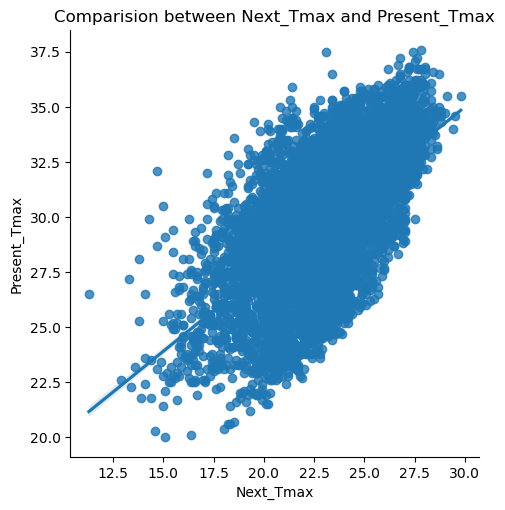

In [156]:
#Analysis between our Target column Next_Tmin and Present_Tmax
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='Present_Tmax', data=df)
plt.title('Comparision between Next_Tmax and Present_Tmax')
plt.xlabel('Next_Tmax')
plt.ylabel('Present_Tmax')
plt.show()

**Observation:-**

1) Here you cans see our Target column Next_Tmin has a positive correlation with Present_Tmax but the relation is not strongly linear,

<Figure size 1200x600 with 0 Axes>

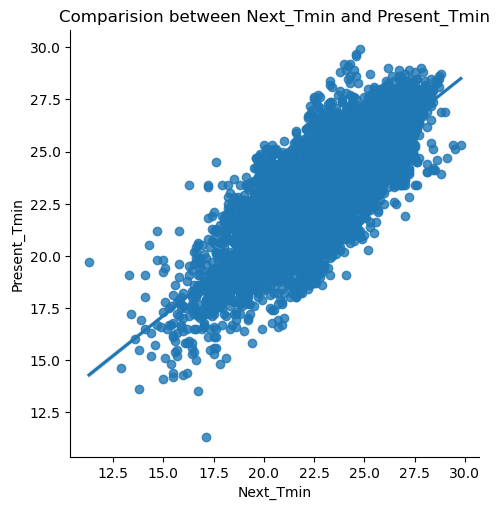

In [158]:
#Analysis between our Target column Next_Tmin and Present_Tmin
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='Present_Tmin', data=df)
plt.title('Comparision between Next_Tmin and Present_Tmin')
plt.xlabel('Next_Tmin')
plt.ylabel('Present_Tmin')
plt.show()

**Observation:-**

*Here you cans see our Target column Next_Tmin has a positive correlation with Present_Tmin but the spread of the data is wide.*

<Figure size 1200x600 with 0 Axes>

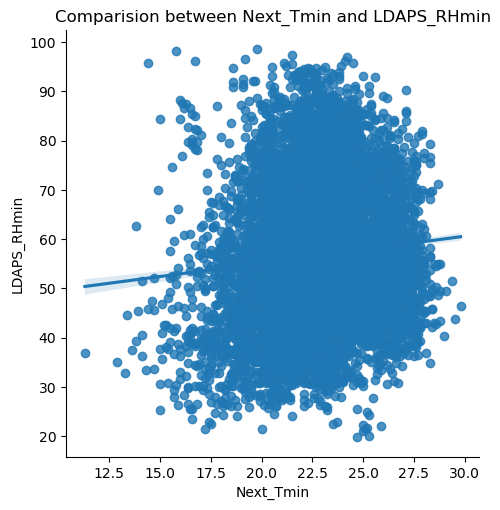

In [159]:
#Analysis between our Target column Next_Tmin and LDAPS_RHmin
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_RHmin', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_RHmin')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_RHmin')
plt.show()

**Observation:-**

Here you cans see our Target column Next_Tmin has a not correlated with LDAPS_RHmin.

<Figure size 1200x600 with 0 Axes>

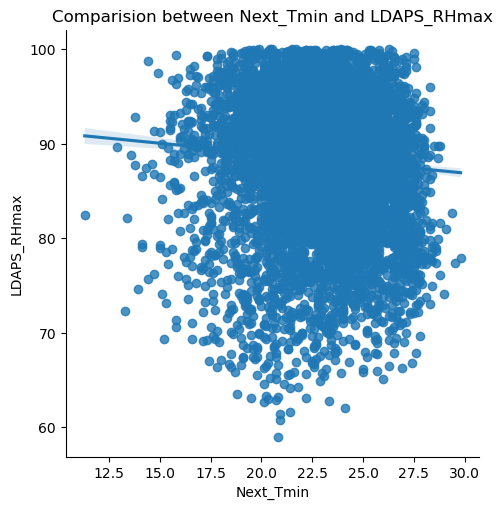

In [160]:
#Analysis between our Target column Next_Tmin and LDAPS_RHmax
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_RHmax', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_RHmax')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_RHmax')
plt.show()

**Observation:-**

*Same as LDAPS_RHmin here you cans see our Target column Next_Tmin has a not correlated with LDAPS_RHmax.*

<Figure size 1200x600 with 0 Axes>

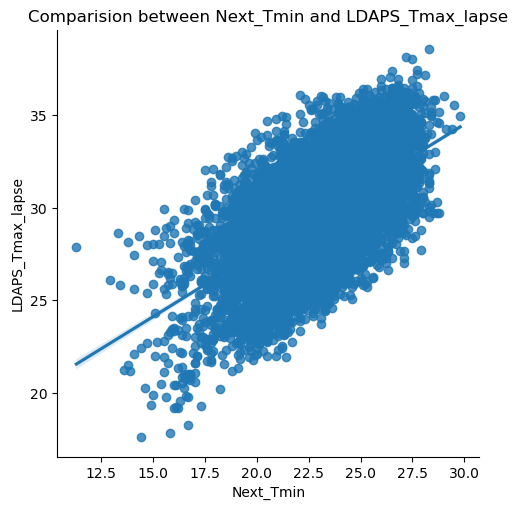

In [161]:
#Analysis between our Target column Next_Tmin and LDAPS_Tmax_lapse
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_Tmax_lapse', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_Tmax_lapse')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_Tmax_lapse')
plt.show()

**Observation:-**

*LDAPS_Tmax_lapse has a positive correlation with our Target column Next_Tmin.*

<Figure size 1200x600 with 0 Axes>

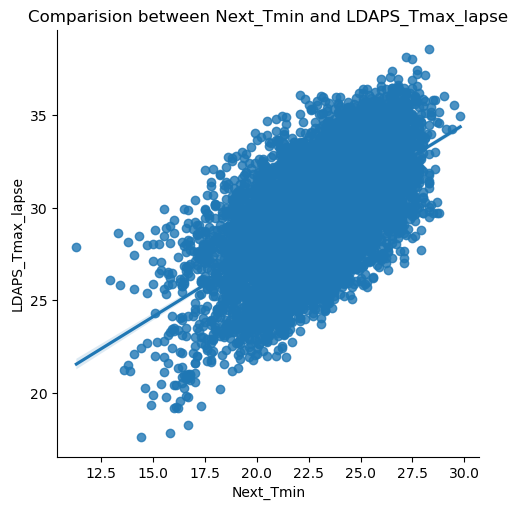

In [162]:
#Analysis between our Target column Next_Tmin and LDAPS_Tmax_lapse
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_Tmax_lapse', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_Tmax_lapse')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_Tmax_lapse')
plt.show()

**Observation:-**

*LDAPS_Tmin_lapse has a positive correlation with our Target column Next_Tmin but it's not a strong linear relation.*

<Figure size 1200x600 with 0 Axes>

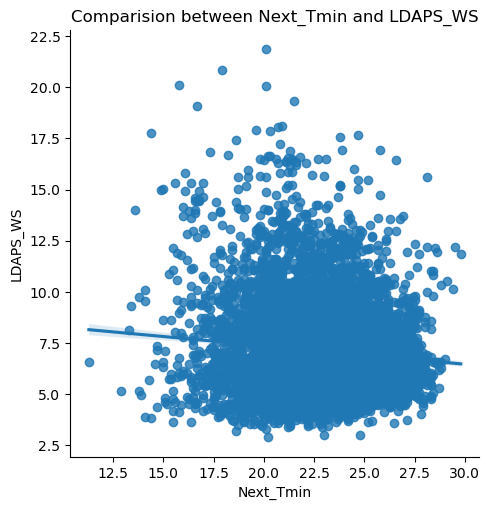

In [163]:
#Analysis between our Target column Next_Tmin and LDAPS_WS
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_WS', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_WS')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_WS')
plt.show()

**Observation:-**
    
*LDAPS_WS has no relation with our Target column Next_Tmin.*

<Figure size 1200x600 with 0 Axes>

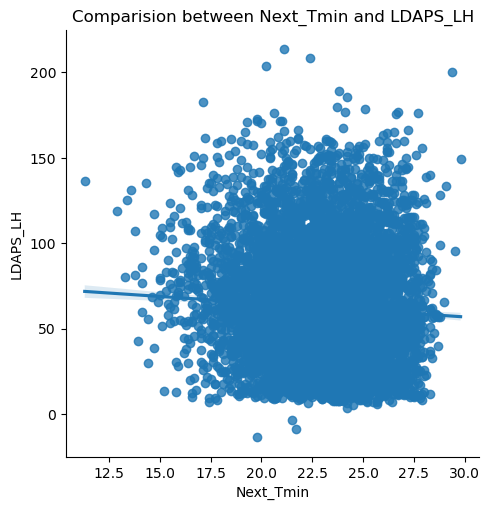

In [164]:
#Analysis between our Target column Next_Tmin and LDAPS_LH
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_LH', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_LH')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_LH')
plt.show()

**Observation:-**
    
LDAPS_LH has no relation with our Target column Next_Tmin.

<Figure size 1200x600 with 0 Axes>

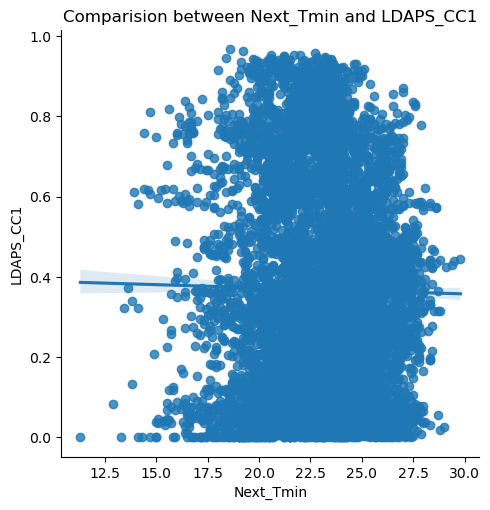

In [165]:
#Analysis between our Target column Next_Tmin and LDAPS_CC1
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_CC1', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_CC1')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_CC1')
plt.show()

**Observation:-**
    
LDAPS_CC1 has also no correlation with our Target column Next_Tmin.

<Figure size 1200x600 with 0 Axes>

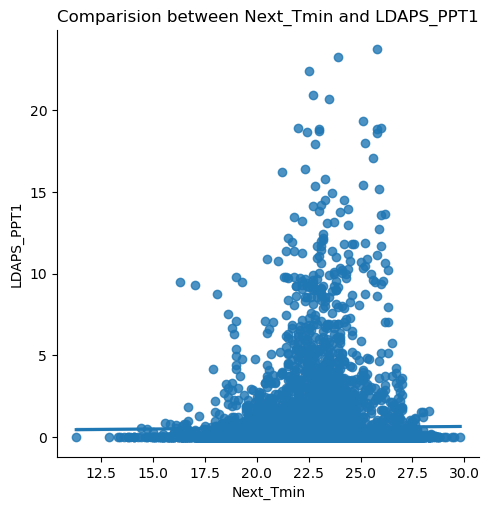

In [166]:
#Analysis between our Target column Next_Tmin and LDAPS_PPT1
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='LDAPS_PPT1', data=df)
plt.title('Comparision between Next_Tmin and LDAPS_PPT1')
plt.xlabel('Next_Tmin')
plt.ylabel('LDAPS_PPT1')
plt.show()

**Observation:-**
    
*Here also you can see LDAPS_PPT1 has no relation with LDAPS_PPT1 column.*

<Figure size 1200x600 with 0 Axes>

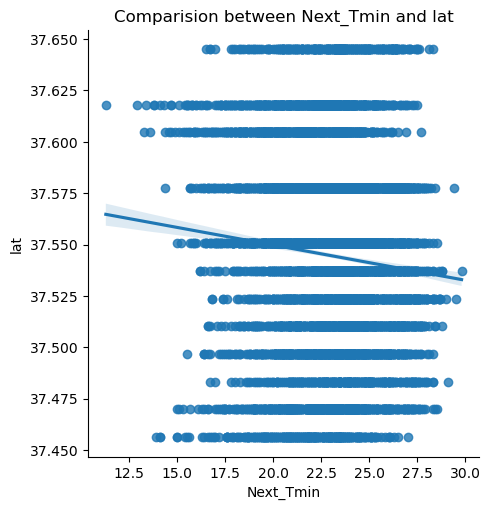

In [167]:
#Analysis between our Target column Next_Tmin and lat
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='lat', data=df)
plt.title('Comparision between Next_Tmin and lat')
plt.xlabel('Next_Tmin')
plt.ylabel('lat')
plt.show()

**Observation:-**
    
*lat has also no relation with Next_Tmin column.*

<Figure size 1200x600 with 0 Axes>

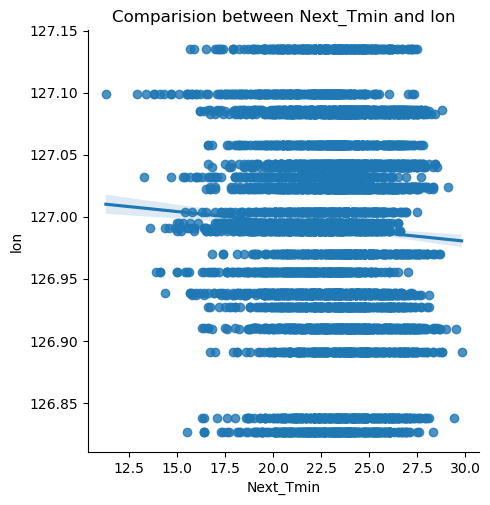

In [168]:
#Analysis between our Target column Next_Tmin and lon
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='lon', data=df)
plt.title('Comparision between Next_Tmin and lon')
plt.xlabel('Next_Tmin')
plt.ylabel('lon')
plt.show()

**Observation:-**
    
lon has no relation with our Target column Next_Tmin.

<Figure size 1200x600 with 0 Axes>

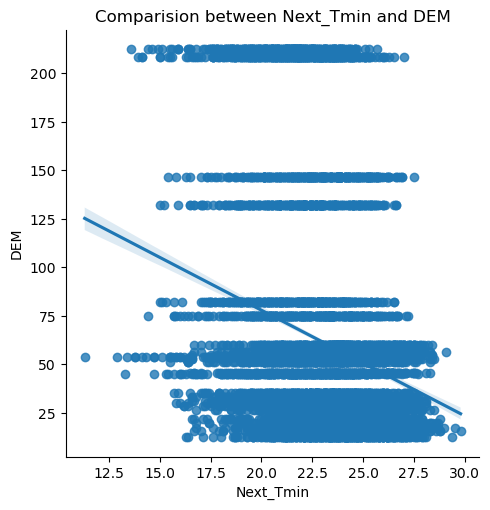

In [169]:
#Analysis between our Target column Next_Tmin and DEM
plt.figure(figsize=(12, 6))
sns.lmplot(x='Next_Tmin', y='DEM', data=df)
plt.title('Comparision between Next_Tmin and DEM')
plt.xlabel('Next_Tmin')
plt.ylabel('DEM')
plt.show()

**Observation:-**
    
DEM has no correlation with our Target column Next_Tmin.

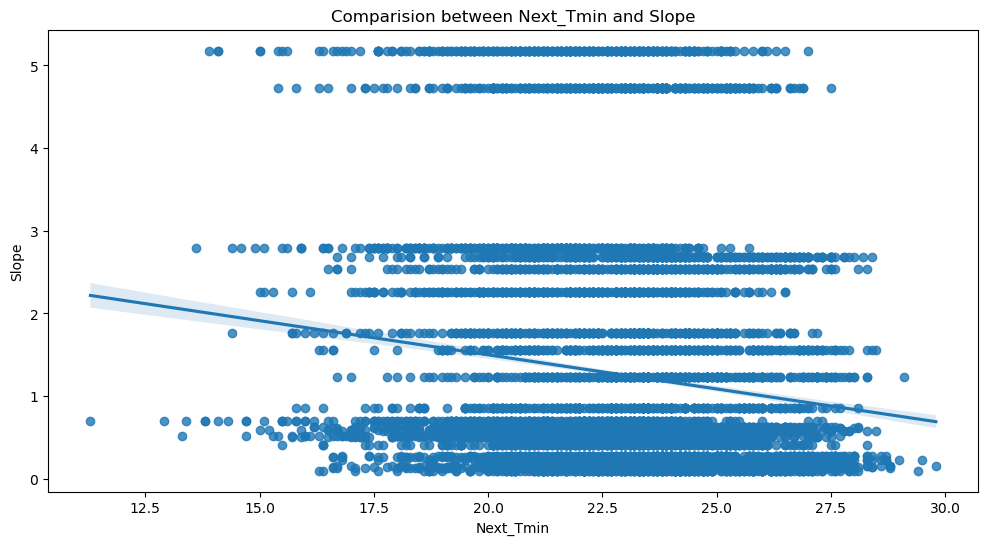

In [170]:
#Analysis between our Target column Next_Tmin and Slope
plt.figure(figsize=(12, 6))
sns.regplot(x='Next_Tmin', y='Slope', data=df)
plt.title('Comparision between Next_Tmin and Slope')
plt.xlabel('Next_Tmin')
plt.ylabel('Slope')
plt.show()

**Observation:-**

There is  no correlation between  our Target column Next_Tmin and Slope.

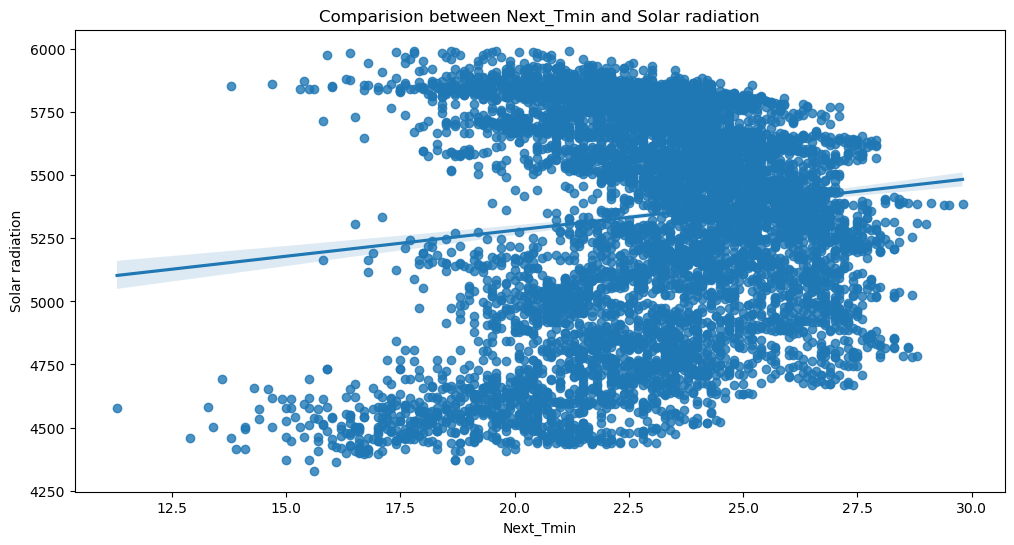

In [171]:
#Analysis between our Target column Next_Tmin and Solar radiation
plt.figure(figsize=(12, 6))
sns.regplot(x='Next_Tmin', y='Solar radiation', data=df)
plt.title('Comparision between Next_Tmin and Solar radiation')
plt.xlabel('Next_Tmin')
plt.ylabel('Solar radiation')
plt.show()

**Observation:-**

We can see there is no correlation between our Target column Next_Tmin and Solar radiation.

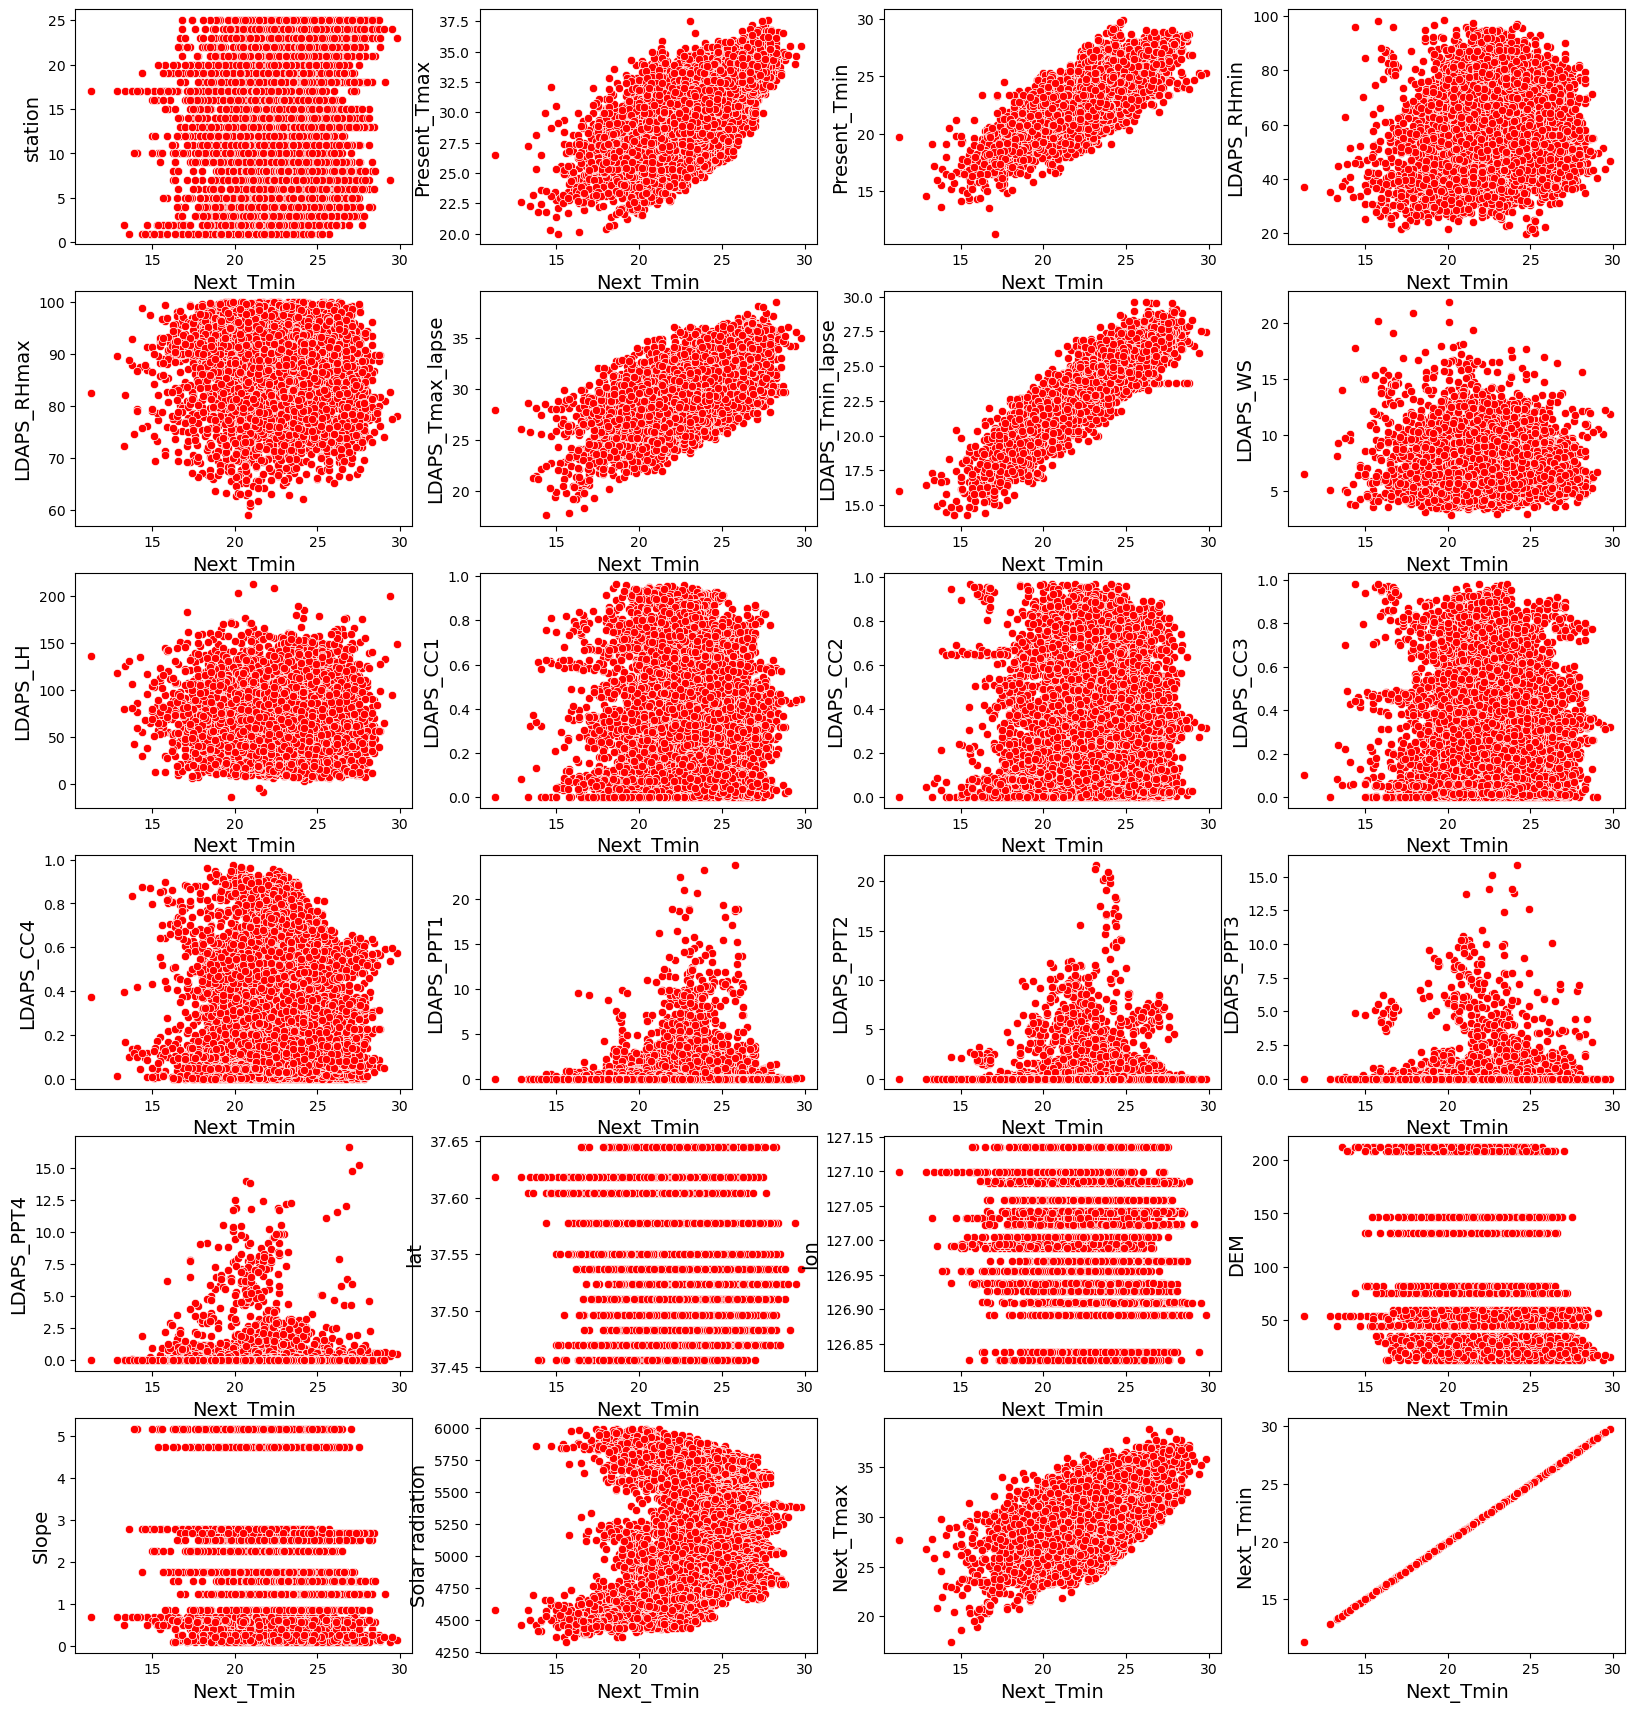

In [172]:
#Analysis with "Next_Tmin" columns with other columns using scatterplot
plt.figure(figsize=(20,25))
p=1
for i in df.columns:
    if p<=26:
        plt.subplot(7,4,p)
        sns.scatterplot(x="Next_Tmin",y=i,color="r",data=df)
        plt.xlabel("Next_Tmin",fontsize=14)
        plt.ylabel(i,fontsize=14)
    p+=1
plt.show()

**Observation:-**

Here you can see except LDAPS_Tmin_lapse and Present_Tmin no column has that much positive and little bit strong correlation with Next_Tmin column.

# Checking for Outliers

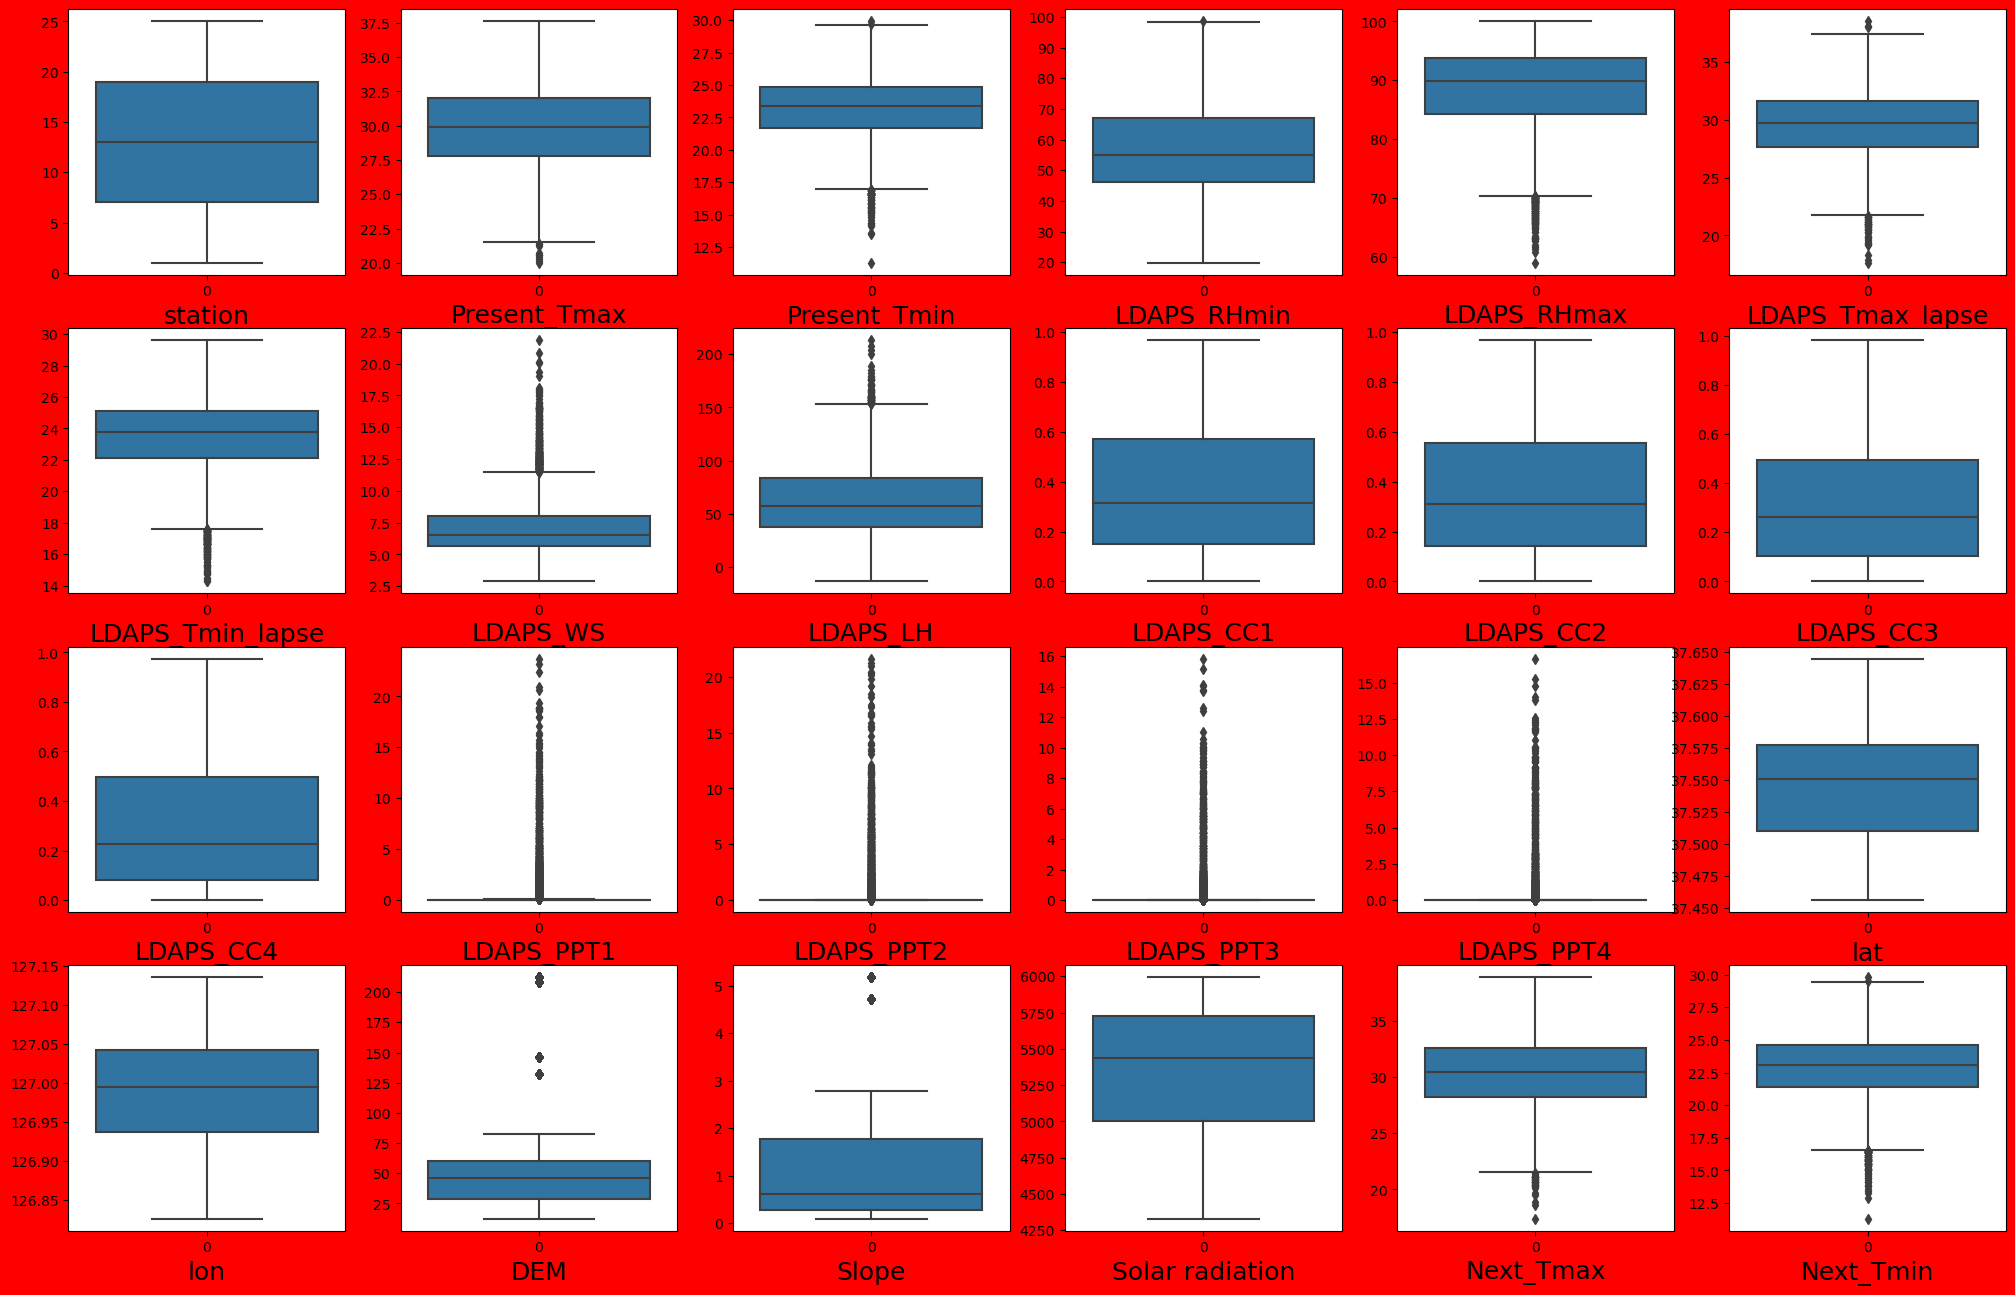

In [173]:
#Checking outliers using boxplot
plt.figure(figsize=(25,20),facecolor="r")
plot=1

for i in df.columns:
    if plot<=28:
        plt.subplot(5,6,plot)
        sns.boxplot(df[i])
        plt.xlabel(i,fontsize=18)
    plot+=1
    

plt.show()

**Observation:-**

*1) Here you can see most of the columns has outliers.*

*2) LDAPS PPT1,PPT2,PPT3,PPT4 columns data points are really close so they can't even create a box for visualization.*

*3) I have to remove those outliers.*

In [157]:
df.columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

# Removing outliers using zscore

In [174]:
from scipy.stats import zscore
wanted_features=df[['Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','Solar radiation']]
#Here I avoid to include 'Next_Tmax' and 'Next_Tmin' because these two our Target column and avoide to include station,lat,lon,DEM,Slope because these are categorical columns 
z=np.abs(zscore(wanted_features))
z

Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  LDAPS_Tmax_lapse  \
0         0.362182      0.761944     0.103776     0.381200          0.526131   
1         0.721332      0.678549     0.307073     0.309640          0.080589   
2         0.619753      0.030307     0.552043     0.617805          0.162758   
3         0.755192      0.072005     0.102686     1.131886          0.030709   
4         0.552033      0.553457     0.038944     0.246759          0.171019   
...            ...           ...          ...          ...               ...   
7745      2.258333      2.263052     2.197656     1.416726          0.615403   
7746      2.461492      2.429842     1.827014     0.657466          0.993724   
7747      2.190613      2.554934     2.056944     1.331624          1.114216   
7748      2.190613      2.304750     2.242110     1.551890          0.889465   
7749      2.224473      2.429842     2.318052     1.559056          0.572093   

      LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  LDAPS_CC2  LDAPS_CC3  \
0             0.218139  0.125655  0.209167   0.514235   0.590993   0.626788   
1             0.222932  0.645717  0.313357   0.546554   0.404514   0.635833   
2             0.450584  0.439753  1.249084   0.608456   0.382320   0.456586   
3             0.081176  0.665024  0.098045   0.581541   0.504886   0.628954   
4             0.012402  0.625821  1.358187   0.830324   0.411432   0.557753   
...                ...       ...       ...        ...        ...        ...   
7745          2.236249  0.225161  1.576035   1.207547   1.267668   1.275957   
7746          2.446033  0.610557  0.587907   1.155624   1.289677   1.275955   
7747          2.033463  0.434818  0.286929   1.295120   1.069542   1.275957   
7748          2.051551  0.253049  0.453458   1.272757   1.093195   1.275957   
7749          2.141884  0.091404  1.591669   1.222669   1.151986   1.275957   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4  \
0      0.661916    0.303923    0.274746     0.23932    0.223166   
1      0.674563    0.303923    0.274746     0.23932    0.223166   
2      0.617674    0.303923    0.274746     0.23932    0.223166   
3      0.648796    0.303923    0.274746     0.23932    0.223166   
4      0.507452    0.303923    0.274746     0.23932    0.223166   
...         ...         ...         ...         ...         ...   
7745   1.161933    0.303923    0.274746     0.23932    0.223166   
7746   1.109391    0.303923    0.274746     0.23932    0.223166   
7747   1.179239    0.303923    0.274746     0.23932    0.223166   
7748   1.179239    0.303923    0.274746     0.23932    0.223166   
7749   1.176093    0.303923    0.274746     0.23932    0.223166   

      Solar radiation  
0            1.518401  
1            1.230307  
2            1.216887  
3            1.201522  
4            1.207554  
...               ...  
7745         2.064311  
7746         2.097462  
7747         2.093941  
7748         2.105458  
7749         2.075219  

[7750 rows x 17 columns]

In [175]:
#Checking the outliers location
np.where(z>3)

(array([  25,   25,   26, ..., 7743, 7744, 7744], dtype=int64),
 array([ 6, 13, 13, ...,  1,  1,  5], dtype=int64))

In [176]:
#Finding outliers by giving their row and column location
z.iloc[25,13]

5.438881851599591

**You can see the value is above 3 that means it's an outlier.**

# Creating outlier free dataset

In [177]:
new_df2=df[(z<3).all(axis=1)]
new_df2.shape

(6901, 24)

In [178]:
print("Old DataFrame",df.shape[0])
print("New DataFrame",new_df2.shape[0])

Old DataFrame 7750
New DataFrame 6901


In [179]:
print("Data lost percentage is",((df.shape[0]-new_df2.shape[0])/new_df2.shape[0])*100)

Data lost percentage is 12.302564845674539


**Here you can see the data lost percentage is 12 that is above 10 but we can afford it because it's a huge dataset.**

# Checking data distribution again

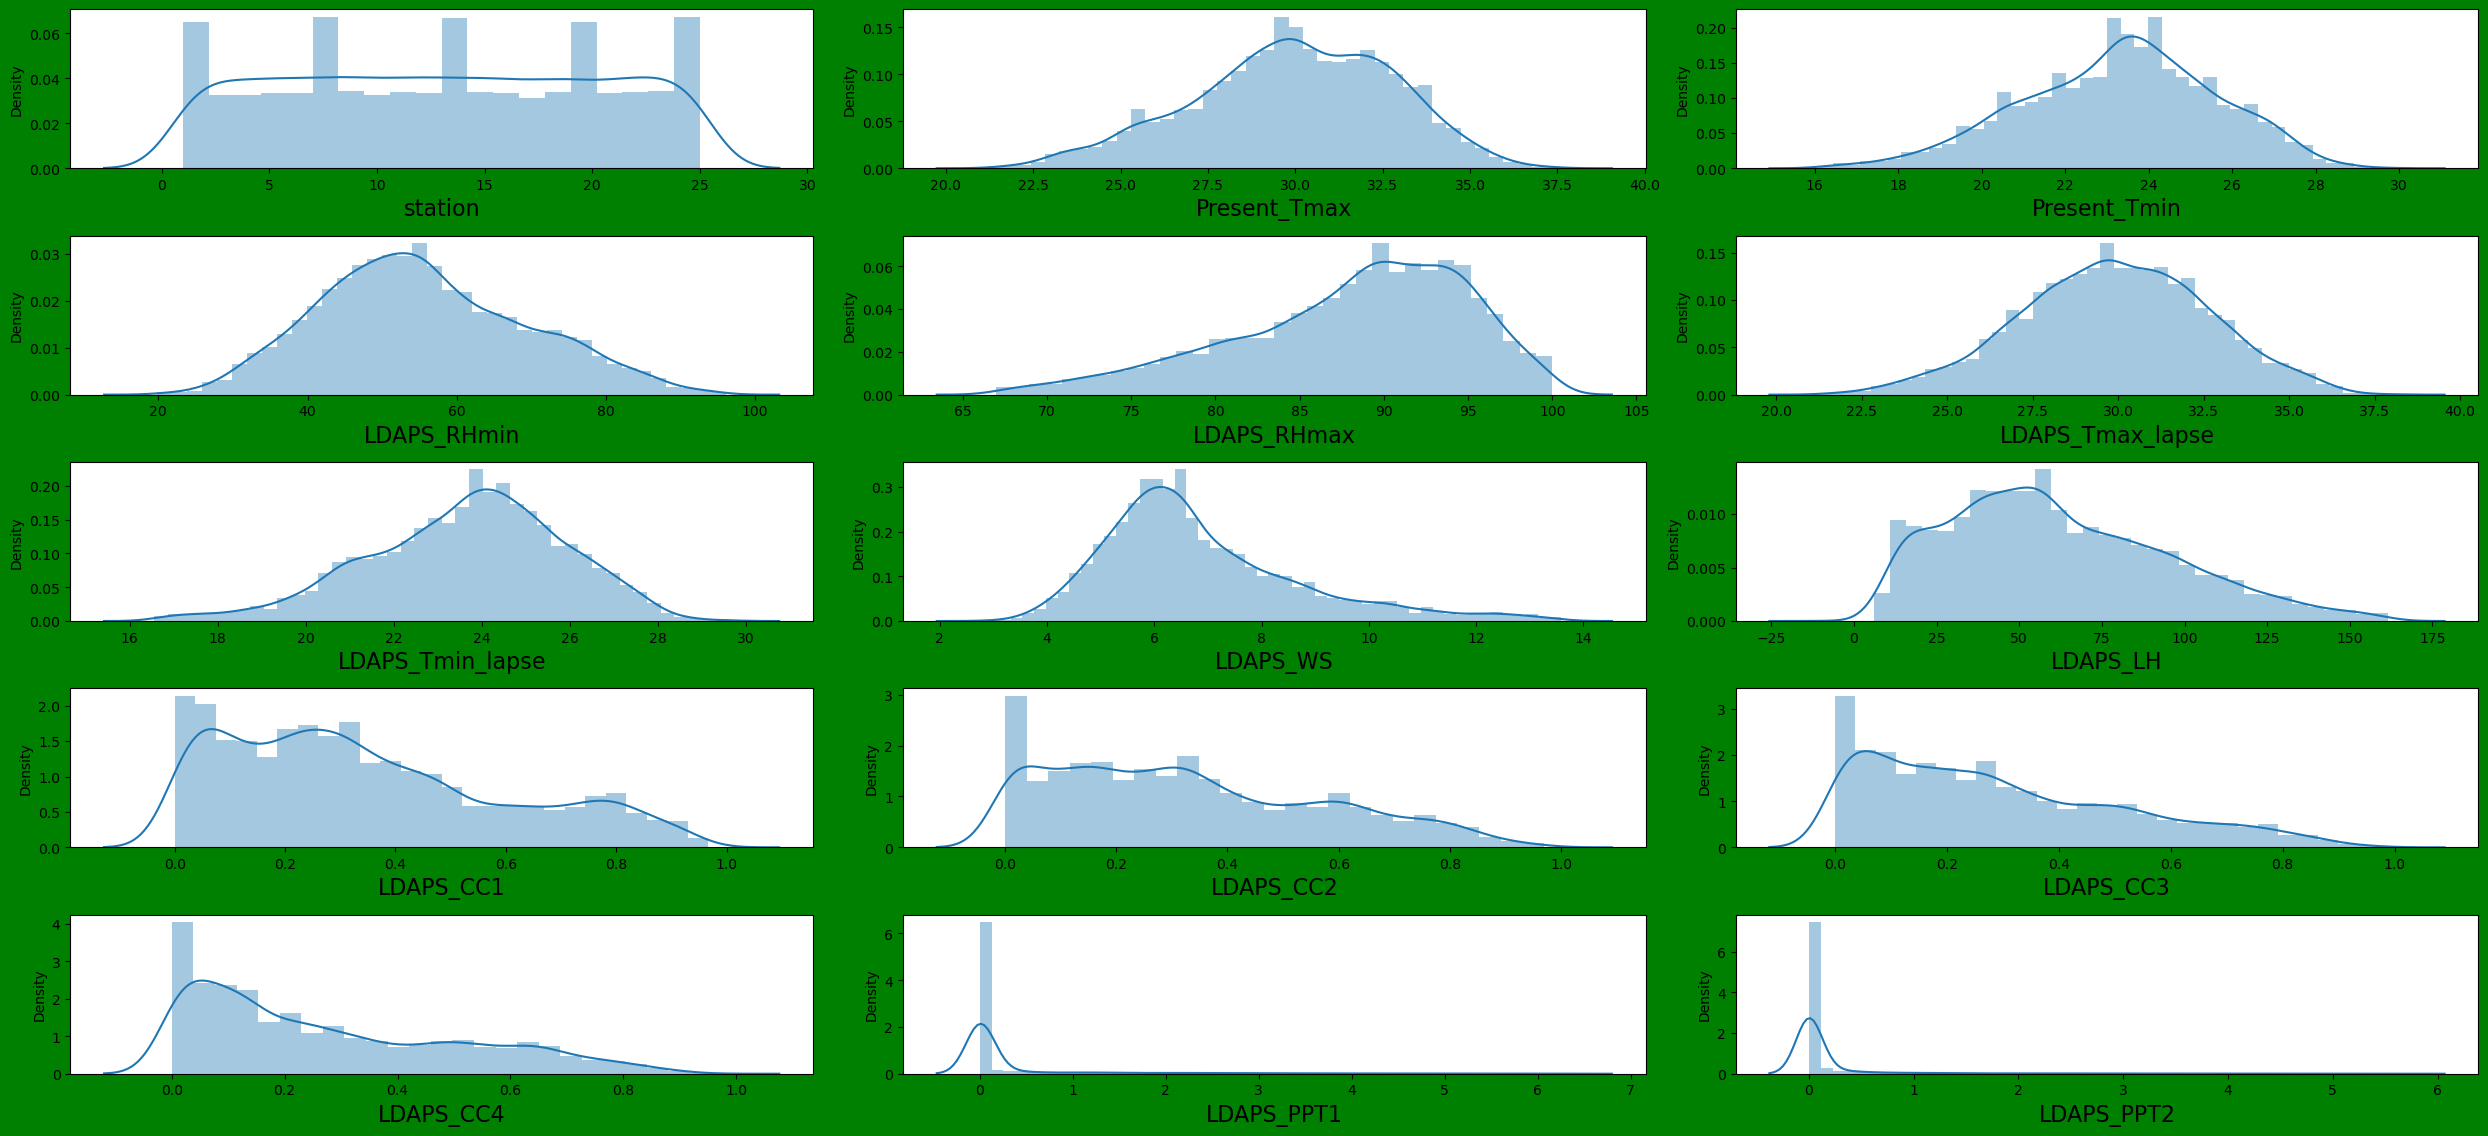

In [180]:
plt.figure(figsize=(25,20),facecolor="g")
plot=1
for i in new_df2.columns:
    if plot<=15:
        
        plt.subplot(9,3,plot)
        sns.distplot(new_df2[i])
        plt.xlabel(i,fontsize=16)
    plot+=1
plt.tight_layout()    
plt.show()

**Observation:-**

1) Here you can see 'Present_Tmax', 'Present_Tmin','LDAPS_RHmax','LDAPS_Tmin_lapse' have a left tail skewness.

2) 'LDAPS_RHmin','LDAPS_WS', 'LDAPS_LH','LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4' all has right tail skewness.

3) 'LDAPS_Tmax_lapse' column is looks normally distributed.

# Checking skewness

In [182]:
new_df2.skew().to_frame("Skewness value")

Skewness value
station                 0.002263
Present_Tmax           -0.277658
Present_Tmin           -0.234914
LDAPS_RHmin             0.310336
LDAPS_RHmax            -0.691289
LDAPS_Tmax_lapse       -0.107512
LDAPS_Tmin_lapse       -0.400811
LDAPS_WS                1.096103
LDAPS_LH                0.571347
LDAPS_CC1               0.602181
LDAPS_CC2               0.508225
LDAPS_CC3               0.710078
LDAPS_CC4               0.721434
LDAPS_PPT1              3.746242
LDAPS_PPT2              4.891066
LDAPS_PPT3              5.514663
LDAPS_PPT4              5.973769
lat                     0.106073
lon                    -0.276011
DEM                     1.762882
Slope                   1.593858
Solar radiation        -0.503430
Next_Tmax              -0.269937
Next_Tmin              -0.297103

**Ovservation:-**

*1) Our acceptable skewness range is +0.5 to -0.5.*

*2) You can see some columns are above that range so we have to try to reduce those column's skewness.*

# Reducing skewness

In [184]:
#Trying to reduce skewness using cube root method
a=new_df2["LDAPS_RHmax"]
b=new_df2["LDAPS_WS"]
c=new_df2["LDAPS_LH"]
d=new_df2["LDAPS_CC1"]
e=new_df2["LDAPS_CC3"]
f=new_df2["LDAPS_CC4"]
g=new_df2["LDAPS_PPT1"]
h=new_df2["LDAPS_PPT2"]
i=new_df2["LDAPS_PPT3"]
j=new_df2["LDAPS_PPT4"]
k=new_df2["DEM"]
l=new_df2["Slope"]







a=np.cbrt(a)
b=np.cbrt(b)
c=np.cbrt(c)
d=np.cbrt(d)
e=np.cbrt(e)
f=np.cbrt(f)
g=np.cbrt(g)
h=np.cbrt(h)
i=np.cbrt(i)
j=np.cbrt(j)
k=np.cbrt(k)
l=np.cbrt(l)




print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_LH skewness",c.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_CC4 skewness",f.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.8126284691265458
LDAPS_WS skewness 0.6263362941444143
LDAPS_LH skewness -0.27455624888178043
LDAPS_CC1 skewness -0.6660734298925651
LDAPS_CC3 skewness -0.5556845651422581
LDAPS_CC4 skewness -0.419512087708382
LDAPS_PPT1 skewness 1.9393303856843775
LDAPS_PPT2 skewness 2.358236147734518
LDAPS_PPT3 skewness 2.5187091741471614
LDAPS_PPT4 skewness 2.877847217484374
DEM skewness 0.9345230869312524
Slope skewness 0.6220981373533218


**So here you can see by using cube root LDAPS_CC4 and LDAPS_LH column's skewness value are reduced.So I will implement cube root method permanently on these columns.**

In [185]:
#Using cube root permanently for LDAPS_CC4 and LDAPS_LH column's
new_df2["LDAPS_CC4"]=np.cbrt(new_df2["LDAPS_CC4"])
new_df2["LDAPS_LH"]=np.cbrt(new_df2["LDAPS_LH"])

In [186]:
#Checking the skewness again
new_df2.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            1.096103
LDAPS_LH           -0.274556
LDAPS_CC1           0.602181
LDAPS_CC2           0.508225
LDAPS_CC3           0.710078
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 1.762882
Slope               1.593858
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**Here you can see LDAPS_CC4 and LDAPS_LH column's skewness is now in our acceptable range.Lets try other methods in left out columns:**

In [189]:
#Trying to reduce skewness using square root method
a=new_df2["LDAPS_RHmax"]
b=new_df2["LDAPS_WS"]
d=new_df2["LDAPS_CC1"]
e=new_df2["LDAPS_CC3"]
g=new_df2["LDAPS_PPT1"]
h=new_df2["LDAPS_PPT2"]
i=new_df2["LDAPS_PPT3"]
j=new_df2["LDAPS_PPT4"]
k=new_df2["DEM"]
l=new_df2["Slope"]



a=np.sqrt(a)
b=np.sqrt(b)
d=np.sqrt(d)
e=np.sqrt(e)
g=np.sqrt(g)
h=np.sqrt(h)
i=np.sqrt(i)
j=np.sqrt(j)
k=np.sqrt(k)
l=np.sqrt(l)



print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_CC1 skewness",d.skew())
print("LDAPS_CC3 skewness",e.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.7818394728641562
LDAPS_WS skewness 0.744110465954387
LDAPS_CC1 skewness -0.17171790524627228
LDAPS_CC3 skewness -0.094130437196764
LDAPS_PPT1 skewness 2.4698563743576885
LDAPS_PPT2 skewness 3.1370274301105616
LDAPS_PPT3 skewness 3.3772391687219177
LDAPS_PPT4 skewness 3.746901619756006
DEM skewness 1.1730594869630306
Slope skewness 0.8834288931543564


**So here you can see by using cube root LDAPS_CC1 and LDAPS_CC3 column's skewness value are reduced.So I will implement cube root method permanently on these columns.**

In [190]:
#Using cube root permanently for LDAPS_CC1 and LDAPS_CC3 column's
new_df2["LDAPS_CC1"]=np.cbrt(new_df2["LDAPS_CC1"])
new_df2["LDAPS_CC3"]=np.cbrt(new_df2["LDAPS_CC3"])

In [191]:
#Checking the skewness again
new_df2.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            1.096103
LDAPS_LH           -0.274556
LDAPS_CC1          -0.666073
LDAPS_CC2           0.508225
LDAPS_CC3          -0.555685
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 1.762882
Slope               1.593858
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**Now you can see LDAPS_CC1 and LDAPS_CC3 column's skewness is als0 reduced.**

In [192]:
#Trying to reduce skewness using log transformation method
a=new_df2["LDAPS_RHmax"]
b=new_df2["LDAPS_WS"]
g=new_df2["LDAPS_PPT1"]
h=new_df2["LDAPS_PPT2"]
i=new_df2["LDAPS_PPT3"]
j=new_df2["LDAPS_PPT4"]
k=new_df2["DEM"]
l=new_df2["Slope"]



a=np.log(a)
b=np.log(b)
g=np.log(g)
h=np.log(h)
i=np.log(i)
j=np.log(j)
k=np.log(k)
l=np.log(l)



print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_WS skewness",b.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())
print("DEM skewness",k.skew())
print("Slope skewness",l.skew())

LDAPS_RHmax skewness: -0.875146591941511
LDAPS_WS skewness 0.389106460177068
LDAPS_PPT1 skewness nan
LDAPS_PPT2 skewness nan
LDAPS_PPT3 skewness nan
LDAPS_PPT4 skewness nan
DEM skewness 0.41612536026615504
Slope skewness 0.06714364209248151


**Here you can see log can reduce LDAPS_WS,DEM and Slope column's skewness so I will implement log method on these columns permanently.**

In [193]:
#Using cube root permanently for LDAPS_CC1 and LDAPS_CC3 column's
new_df2["LDAPS_WS"]=np.log(new_df2["LDAPS_WS"])
new_df2["DEM"]=np.log(new_df2["DEM"])
new_df2["Slope"]=np.log(new_df2["Slope"])

In [194]:
#Checking the skewness again
new_df2.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.691289
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            0.389106
LDAPS_LH           -0.274556
LDAPS_CC1          -0.666073
LDAPS_CC2           0.508225
LDAPS_CC3          -0.555685
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 0.416125
Slope               0.067144
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**You can see LDAPS_WS,DEM and Slope column's skewness is reduce to our acceptable range.**

In [195]:
#Trying to reduce skewness using log+1 transformation method
a=new_df2["LDAPS_RHmax"]
g=new_df2["LDAPS_PPT1"]
h=new_df2["LDAPS_PPT2"]
i=new_df2["LDAPS_PPT3"]
j=new_df2["LDAPS_PPT4"]




a=np.log1p(a)
g=np.log1p(g)
h=np.log1p(h)
i=np.log1p(i)
j=np.log1p(j)



print("LDAPS_RHmax skewness:",a.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("LDAPS_PPT3 skewness",i.skew())
print("LDAPS_PPT4 skewness",j.skew())


LDAPS_RHmax skewness: -0.8729058046813458
LDAPS_PPT1 skewness 2.766374714317934
LDAPS_PPT2 skewness 3.663962934104666
LDAPS_PPT3 skewness 4.238999010900155
LDAPS_PPT4 skewness 4.647081959855196


**Here you can see log1p can't reduce any columns skewness.So let's try PowerTransform on left out columns.**

In [196]:
#Trying to reduce skewness using PowerTransform method to LDAPS_RHmax,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 these columns

a=new_df2["LDAPS_RHmax"]
g=new_df2["LDAPS_PPT1"]
h=new_df2["LDAPS_PPT2"]
i=new_df2["LDAPS_PPT3"]
j=new_df2["LDAPS_PPT4"]

#using PowerTransformer to reduce the skewness of LDAPS_RHmax,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4 these columns
from sklearn.preprocessing import PowerTransformer

pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

a_reshape=a.values.reshape(-1,1)
g_reshape=g.values.reshape(-1,1)
h_reshape=h.values.reshape(-1,1)
i_reshape=i.values.reshape(-1,1)
j_reshape=j.values.reshape(-1,1)

#Now fitting the Transformer
a_transform=pt.fit_transform(a_reshape)
g_transform=pt.fit_transform(g_reshape)
h_transform=pt.fit_transform(h_reshape)
i_transform=pt.fit_transform(i_reshape)
j_transform=pt.fit_transform(j_reshape)


#Converting transformed array back to the DataFrame
a=pd.DataFrame(a_transform)
g=pd.DataFrame(g_transform)
h=pd.DataFrame(h_transform)
i=pd.DataFrame(i_transform)
j=pd.DataFrame(j_transform)

print("LDAPS_RHmax skewness",a.skew())
print("LDAPS_PPT1 skewness",g.skew())
print("LDAPS_PPT2 skewness",h.skew())
print("HS-304 skewness",i.skew())
print("CS-302 skewness",j.skew())


LDAPS_RHmax skewness 0   -0.100057
dtype: float64
LDAPS_PPT1 skewness 0    1.628773
dtype: float64
LDAPS_PPT2 skewness 0    1.831352
dtype: float64
HS-304 skewness 0    2.005938
dtype: float64
CS-302 skewness 0    2.288001
dtype: float64


**Here you can see PowerTransformer can reduce the skewness of LDAPS_RHmax column, So I will implement it permanently:**

In [197]:
#Implementing PowerTransformer on LDAPS_RHmax column
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer("yeo-johnson")   #yeo-johnson method works on both positive and Negative method

LDAPS_RHmax_reshape=new_df2["LDAPS_RHmax"].values.reshape(-1,1)
#Now fitting the Transformer
LDAPS_RHmax_transform=pt.fit_transform(LDAPS_RHmax_reshape)
#Converting transformed array back to the DataFrame
new_df2["LDAPS_RHmax"]=pd.DataFrame(LDAPS_RHmax_transform)

In [198]:
#Checking the skewness again
new_df2.skew()

station             0.002263
Present_Tmax       -0.277658
Present_Tmin       -0.234914
LDAPS_RHmin         0.310336
LDAPS_RHmax        -0.094315
LDAPS_Tmax_lapse   -0.107512
LDAPS_Tmin_lapse   -0.400811
LDAPS_WS            0.389106
LDAPS_LH           -0.274556
LDAPS_CC1          -0.666073
LDAPS_CC2           0.508225
LDAPS_CC3          -0.555685
LDAPS_CC4          -0.419512
LDAPS_PPT1          3.746242
LDAPS_PPT2          4.891066
LDAPS_PPT3          5.514663
LDAPS_PPT4          5.973769
lat                 0.106073
lon                -0.276011
DEM                 0.416125
Slope               0.067144
Solar radiation    -0.503430
Next_Tmax          -0.269937
Next_Tmin          -0.297103
dtype: float64

**So you can see LDAPS_RHmax column's skewness is reduced.For rest of the columns I can use boxcox and if these column still have higher skewness after applying the boxcox I have to consider these skewness are their deefault skewness value.**

In [199]:
#Appliing boxcox to 
from scipy.stats import boxcox

try:

    g=new_df2["LDAPS_PPT1"]
    h=new_df2["LDAPS_PPT2"]
    i=new_df2["LDAPS_PPT3"]
    j=new_df2["LDAPS_PPT4"]


    g=boxcox(g)
    h=boxcox(h)
    i=boxcox(i)
    j=boxcox(j)


    print("LDAPS_PPT1 skewness",g.skew())
    print("LDAPS_PPT2 skewness",h.skew())
    print("LDAPS_PPT3 skewness",i.skew())
    print("LDAPS_PPT4 skewness",j.skew())

    

    

except:

    print("Data must be positive.")

Data must be positive.


**Final Observation:-**

So you can see I applied cbrt,sqrt,boxcox,log,log1p but nothing can reduce LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3 and LDAPS_PPT4 these columns skewness so I have to consider these skewness are their default skewness.

In [200]:
#Checking the null value
new_df2.isnull().sum()

station               0
Present_Tmax          0
Present_Tmin          0
LDAPS_RHmin           0
LDAPS_RHmax         720
LDAPS_Tmax_lapse      0
LDAPS_Tmin_lapse      0
LDAPS_WS              0
LDAPS_LH              0
LDAPS_CC1             0
LDAPS_CC2             0
LDAPS_CC3             0
LDAPS_CC4             0
LDAPS_PPT1            0
LDAPS_PPT2            0
LDAPS_PPT3            0
LDAPS_PPT4            0
lat                   0
lon                   0
DEM                   0
Slope                 0
Solar radiation       0
Next_Tmax             0
Next_Tmin             0
dtype: int64

**Here you can see after using the PowerTranformer on LDAPS_RHmax column ther are some null values occur. I will fill those values with this column's median so I don't have to suffer outliers problem leter on.**

In [201]:
#Filling LDAPS_RHmax column's nan values with it's median
new_df2["LDAPS_RHmax"].fillna(round(new_df2["LDAPS_RHmax"].median(),6),inplace=True)

In [202]:
#Checking the null value
new_df2.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

# Checking the data distribution

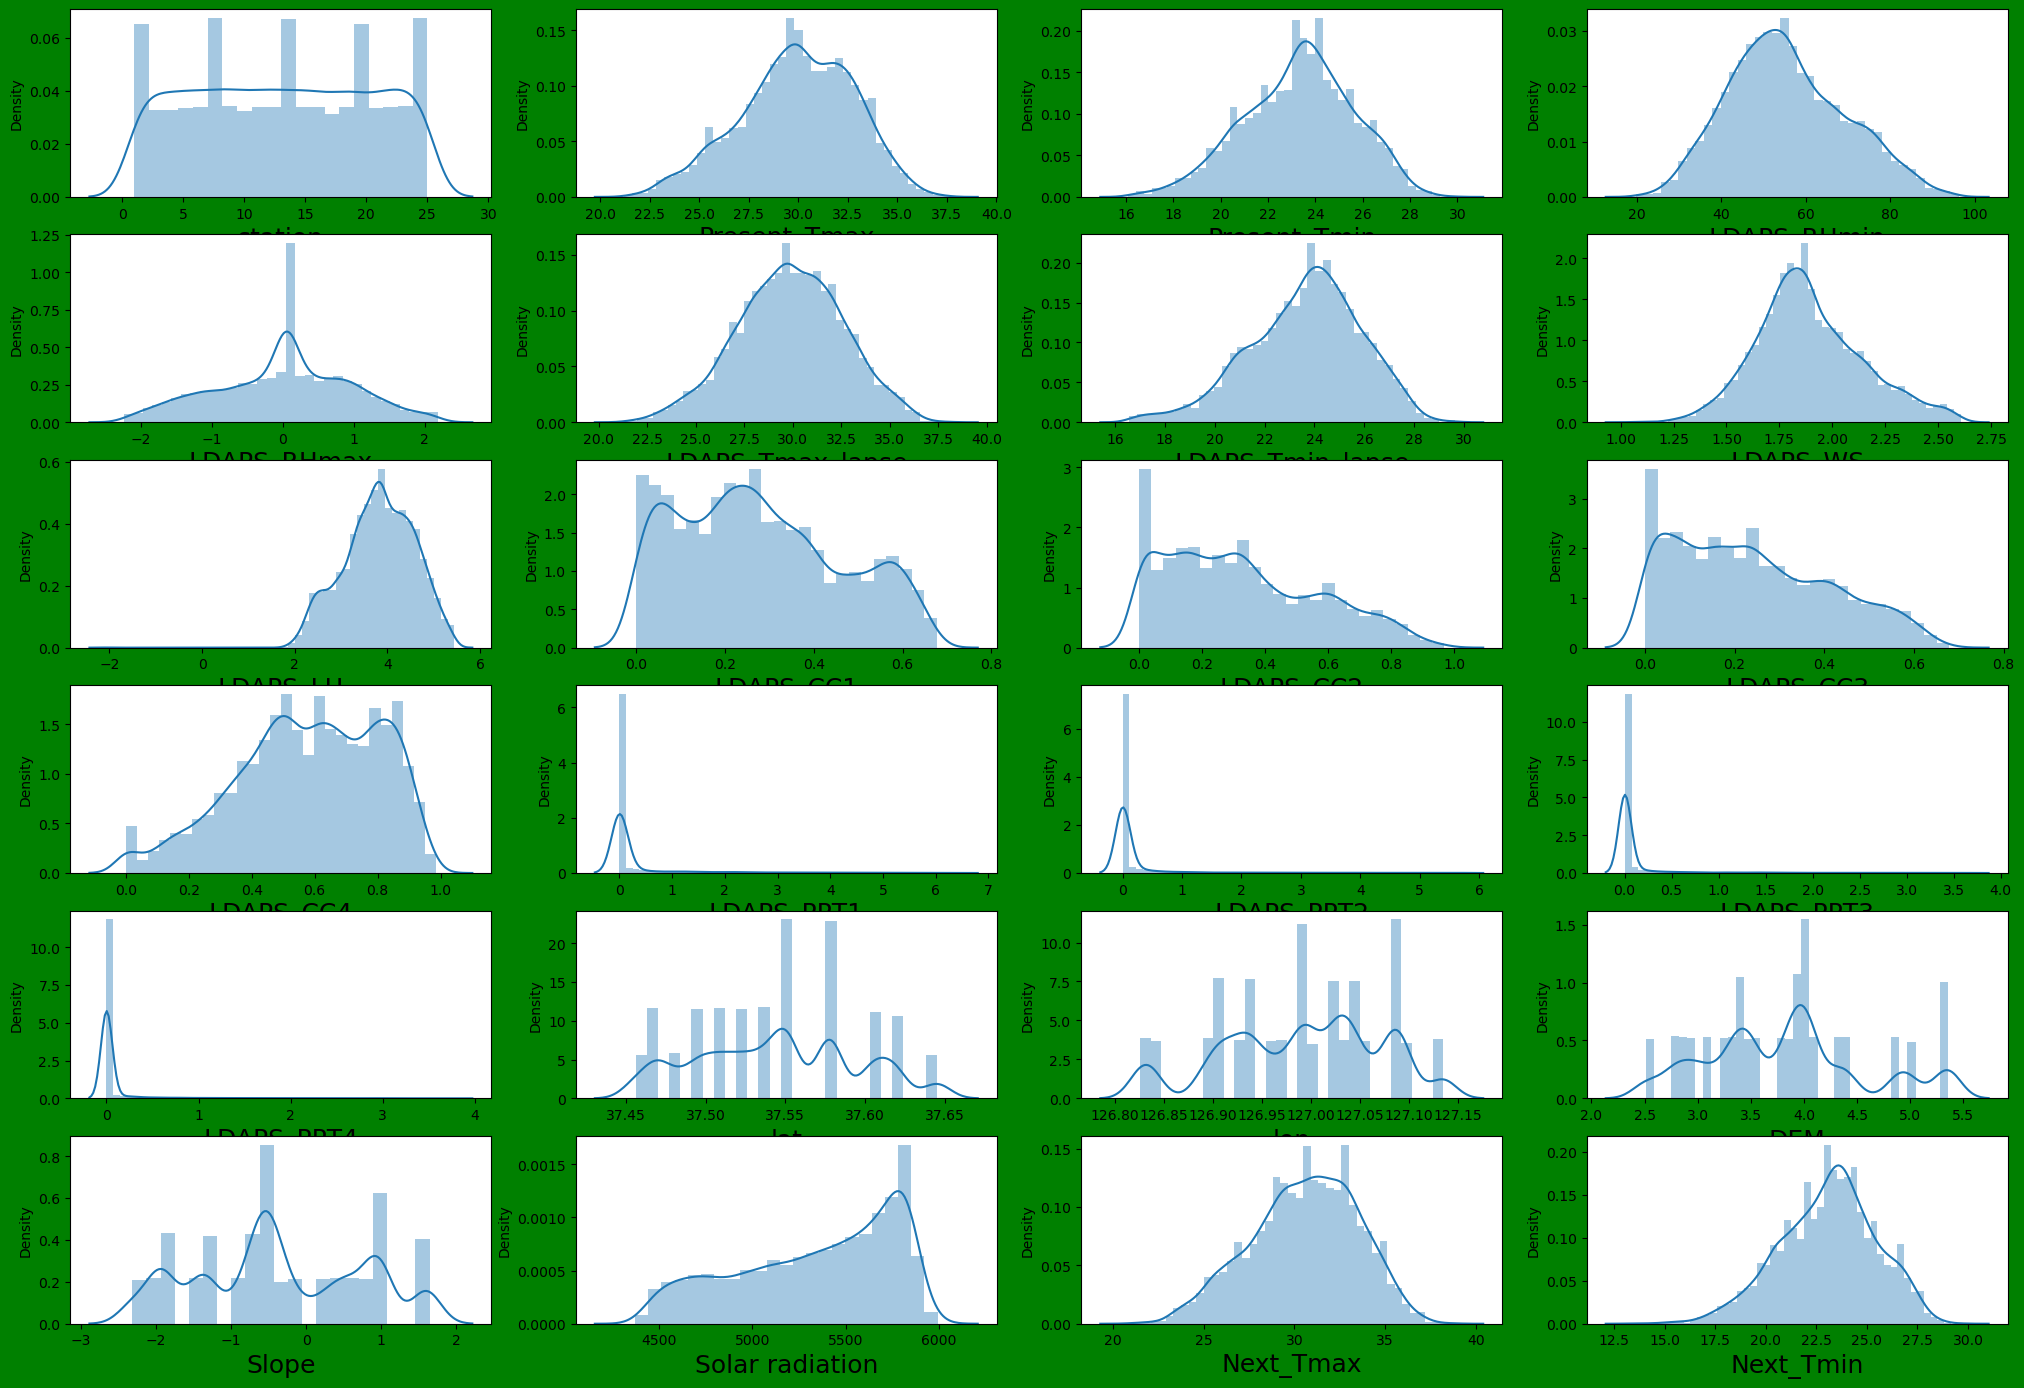

<Figure size 640x480 with 0 Axes>

In [203]:
plt.figure(figsize=(25,20),facecolor="g")
plot=1

for i in new_df2.columns:
    if plot<27:
        plt.subplot(7,4,plot)
        sns.distplot(new_df[i])
        plt.xlabel(i,fontsize=18)
        
    plot+=1
    
plt.show()
plt.tight_layout()

**Observation:-**

So you can see most of the columns that have skewness under accptable range some of them are look like normally distributed.

# Checking correlation between all columns

In [204]:
new_df2.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110581      0.132761    -0.067398   
Present_Tmax      0.110581      1.000000      0.614416    -0.149638   
Present_Tmin      0.132761      0.614416      1.000000     0.152369   
LDAPS_RHmin      -0.067398     -0.149638      0.152369     1.000000   
LDAPS_RHmax      -0.014739     -0.066968     -0.012326     0.036910   
LDAPS_Tmax_lapse  0.066364      0.535863      0.436694    -0.551152   
LDAPS_Tmin_lapse  0.103964      0.611716      0.756629     0.136908   
LDAPS_WS          0.025395     -0.086848      0.024869     0.199459   
LDAPS_LH         -0.135484      0.110390     -0.013475     0.007797   
LDAPS_CC1         0.012467     -0.264418      0.112770     0.565531   
LDAPS_CC2         0.006916     -0.153736      0.118491     0.714723   
LDAPS_CC3         0.003502     -0.055979      0.054589     0.614725   
LDAPS_CC4         0.012506     -0.043004      0.017283     0.459314   
LDAPS_PPT1       -0.002709     -0.135157      0.068919     0.291552   
LDAPS_PPT2       -0.021617     -0.041142      0.080084     0.376456   
LDAPS_PPT3        0.002863     -0.016496      0.032538     0.260327   
LDAPS_PPT4        0.014286     -0.043645     -0.057120     0.185919   
lat              -0.239932     -0.051180     -0.071682     0.089616   
lon              -0.122079      0.010649     -0.044933    -0.095152   
DEM              -0.312368     -0.142151     -0.244892     0.065868   
Slope            -0.140475     -0.092625     -0.164756     0.070480   
Solar radiation  -0.028565     -0.061212      0.015879     0.253060   
Next_Tmax         0.106367      0.586895      0.449007    -0.426429   
Next_Tmin         0.128311      0.615625      0.786178     0.140575   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.014739          0.066364          0.103964  0.025395   
Present_Tmax        -0.066968          0.535863          0.611716 -0.086848   
Present_Tmin        -0.012326          0.436694          0.756629  0.024869   
LDAPS_RHmin          0.036910         -0.551152          0.136908  0.199459   
LDAPS_RHmax          1.000000          0.010680         -0.000821  0.048792   
LDAPS_Tmax_lapse     0.010680          1.000000          0.620307 -0.186102   
LDAPS_Tmin_lapse    -0.000821          0.620307          1.000000 -0.028571   
LDAPS_WS             0.048792         -0.186102         -0.028571  1.000000   
LDAPS_LH            -0.009086         -0.008413         -0.145705 -0.050131   
LDAPS_CC1            0.080860         -0.366850          0.115229  0.187913   
LDAPS_CC2            0.057282         -0.490450          0.106812  0.183001   
LDAPS_CC3            0.040886         -0.421566          0.063286  0.081563   
LDAPS_CC4            0.052358         -0.341145          0.010019  0.106022   
LDAPS_PPT1           0.036871         -0.181744         -0.008802  0.162006   
LDAPS_PPT2          -0.012566         -0.237277          0.013093  0.100300   
LDAPS_PPT3           0.002234         -0.140929          0.013816  0.107031   
LDAPS_PPT4           0.002846         -0.159753         -0.079388  0.177251   
lat                 -0.015521         -0.038447         -0.089888 -0.020441   
lon                 -0.009855          0.102172         -0.031088 -0.075913   
DEM                  0.000925         -0.127331         -0.178649  0.124572   
Slope               -0.003641         -0.096949         -0.154496  0.100356   
Solar radiation      0.157394          0.015544          0.111941  0.142075   
Next_Tmax           -0.042743          0.808212          0.542410 -0.236467   
Next_Tmin           -0.019852          0.547803          0.871019  0.005596   

                  LDAPS_LH  LDAPS_CC1  ...  LDAPS_PPT2  LDAPS_PPT3  \
station          -0.135484   0.012467  ...   -0.021617    0.002863   
Present_Tmax      0.110390  -0.264418  ...   -0.041142   -0.016496   
Present_Tmin     -0.013475   0.112770  ...    0.080084   

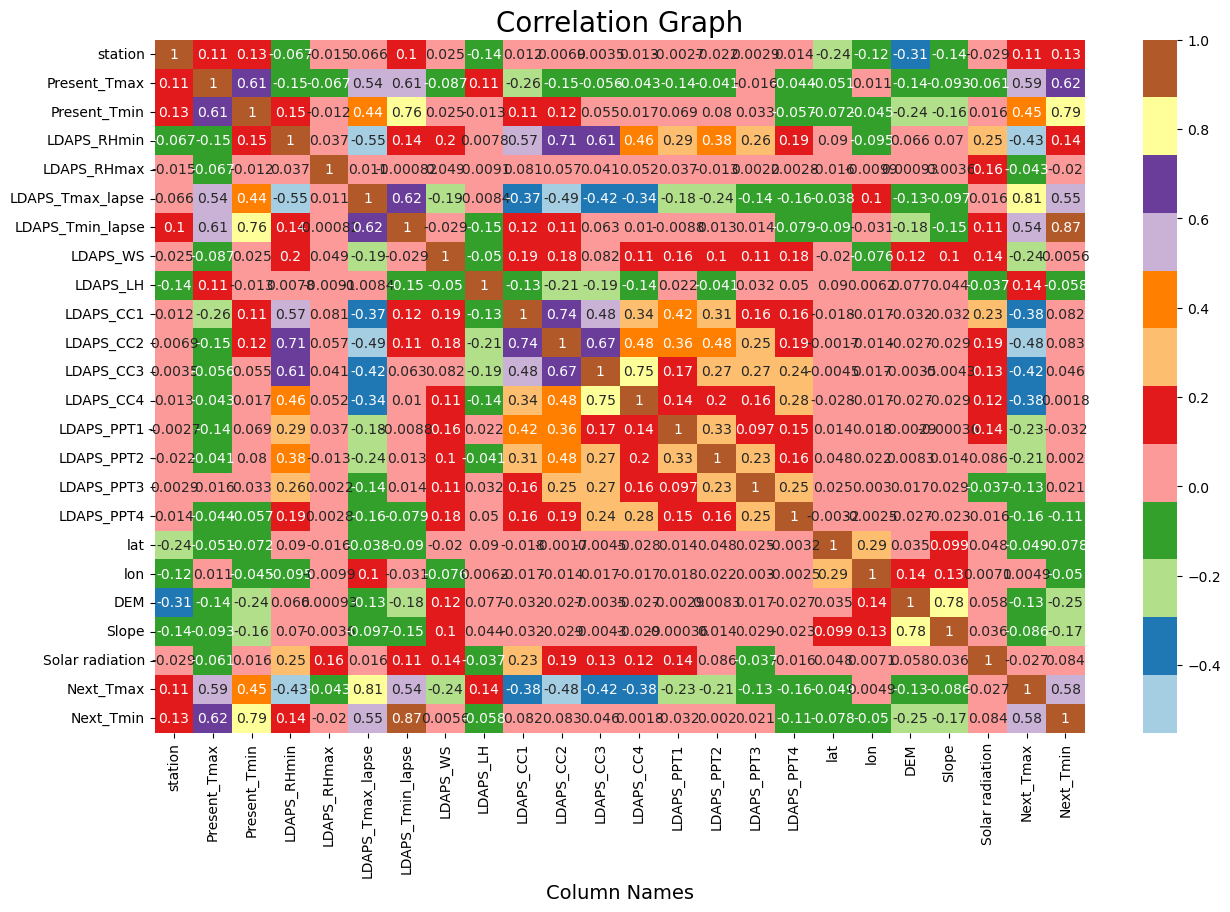

In [205]:
#Visualizing checking correlation between all the columns using heatmap
plt.figure(figsize=(15,9))
sns.heatmap(new_df2.corr(),cmap="Paired",annot=True)
plt.xlabel("Column Names",fontsize=14)
plt.title("Correlation Graph",fontsize=20)
plt.show()

**Observation:-**

*1) Here you can see our Target column Next_Tmin highly positive correlated with Present_Tmin.*

*2) And our Target column Next_Tmin most negatively correlated with DEM,Slope.*

# Non Graphycal Analysis For Correlation With Our Target Column

In [208]:
#Checking skewness in ascending order towards our Target column Next_Tmin
new_df2.corr()["Next_Tmin"].sort_values(ascending=True)

DEM                -0.246445
Slope              -0.167445
LDAPS_PPT4         -0.105350
lat                -0.077543
LDAPS_LH           -0.058429
lon                -0.049812
LDAPS_PPT1         -0.031666
LDAPS_RHmax        -0.019852
LDAPS_CC4           0.001788
LDAPS_PPT2          0.001973
LDAPS_WS            0.005596
LDAPS_PPT3          0.021115
LDAPS_CC3           0.046464
LDAPS_CC1           0.082458
LDAPS_CC2           0.082688
Solar radiation     0.083600
station             0.128311
LDAPS_RHmin         0.140575
LDAPS_Tmax_lapse    0.547803
Next_Tmax           0.584633
Present_Tmax        0.615625
Present_Tmin        0.786178
LDAPS_Tmin_lapse    0.871019
Next_Tmin           1.000000
Name: Next_Tmin, dtype: float64

**Here you can see all columns skewness towards our Target column Next_Tmin.**

# Separating Target variable and Feature variable

In [210]:
#Separating Target and Independent variable
x=new_df2.iloc[:,:22]
y=new_df2.iloc[:,23]

print("Features Dimension",x.shape)
print("Label Dimension",y.shape)

Features Dimension (6901, 22)
Label Dimension (6901,)


In [211]:
x.sample(3)

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
3362     13.0          33.1          23.3    39.545109     0.065249   
1369     20.0          28.1          23.3    44.966686    -0.142119   
5323     24.0          31.7          26.3    69.788887    -1.535068   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
3362         35.746482         26.201733  1.704983  3.149687   0.343030  ...   
1369         29.711823         21.798397  1.966916  4.363639   0.508953  ...   
5323         29.087232         25.607779  2.137874  3.481778   0.778113  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4      lat  \
3362   0.704793    0.000000    0.000000    0.000000     0.00824  37.5776   
1369   0.137580    0.000000    0.000000    0.000000     0.00000  37.6181   
5323   0.788072    0.001707    1.110942    0.426702     0.12806  37.5237   

          lon       DEM     Slope  Solar radiation  
3362  127.083  4.091547  0.988239      5779.356934  
1369  127.004  4.987394  1.553841      4819.099121  
5323  126.909  2.850452 -1.503727      5496.240723  

[3 rows x 22 columns]

In [212]:
y.sample(2)

6995    23.7
5487    24.8
Name: Next_Tmin, dtype: float64

# Feature scaling using StandardScaler

In [213]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
x=pd.DataFrame(SS.fit_transform(x),columns=x.columns)
x

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.671666     -0.431803     -0.822293     0.195931     0.363109   
1    -1.532751      0.687976     -0.735912    -0.237667     0.269914   
2    -1.393837      0.582997     -0.001671    -0.496201    -0.775735   
3    -1.254922      0.722969      0.041520     0.194780     1.462889   
4    -1.116007      0.513011     -0.606340     0.045308     0.189593   
...        ...           ...           ...          ...          ...   
6896  1.106627     -2.391416     -2.377156    -2.232930     0.051864   
6897  1.245542     -2.601375     -2.549919    -1.841766     0.051864   
6898  1.384456     -2.321430     -2.679491    -2.084426     0.051864   
6899  1.523371     -2.321430     -2.420347    -2.279845     0.051864   
6900  1.662286     -2.356423     -2.549919    -2.359992     0.051864   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.661316         -0.285856  0.107139  0.390428  -0.130869  ...   
1            -0.011558          0.175631 -0.610009 -0.114081  -0.166831  ...   
2             0.076438          0.413820 -0.310322 -1.431461  -0.238302  ...   
3            -0.064977         -0.142553 -0.639297  0.290937  -0.206790  ...   
4            -0.281014         -0.070596 -0.580053  1.256167  -0.529770  ...   
...                ...               ...       ...       ...        ...  ...   
6896         -0.756920         -2.397376 -0.020424 -2.247407  -1.285390  ...   
6897         -1.162077         -2.616870 -0.557222  0.704940  -1.143146  ...   
6898         -1.291116         -2.185204 -0.303412  0.457953  -1.594932  ...   
6899         -1.050422         -2.204129 -0.056923 -0.268323  -1.503994  ...   
6900         -0.710538         -2.298643  0.371945 -2.299732  -1.331338  ...   

      LDAPS_CC4  LDAPS_PPT1  LDAPS_PPT2  LDAPS_PPT3  LDAPS_PPT4       lat  \
0     -0.306039   -0.339238   -0.276313   -0.258124   -0.235512  1.213193   
1     -0.324521   -0.339238   -0.276313   -0.258124   -0.235512  1.213193   
2     -0.243663   -0.339238   -0.276313   -0.258124   -0.235512  0.673012   
3     -0.287182   -0.339238   -0.276313   -0.258124   -0.235512  2.021465   
4     -0.101357   -0.339238   -0.276313   -0.258124   -0.235512  0.134831   
...         ...         ...         ...         ...         ...       ...   
6896  -1.830617   -0.339238   -0.276313   -0.258124   -0.235512  0.134831   
6897  -1.401436   -0.339238   -0.276313   -0.258124   -0.235512 -0.675442   
6898  -2.555392   -0.339238   -0.276313   -0.258124   -0.235512 -0.135260   
6899  -2.555392   -0.339238   -0.276313   -0.258124   -0.235512 -0.405351   
6900  -2.144830   -0.339238   -0.276313   -0.258124   -0.235512 -0.405351   

           lon       DEM     Slope  Solar radiation  
0     0.001493  2.073347  1.247744         1.551359  
1     0.516082 -0.019419 -0.268632         1.257754  
2     0.842406 -0.416796 -0.859666         1.244077  
3     0.390572  0.008918  1.163261         1.228419  
4     1.808829 -0.348680 -0.283772         1.234566  
...        ...       ...       ...              ...  
6896  0.616489 -0.734407 -0.172694        -2.099886  
6897  1.193833 -0.976324 -1.480743        -2.133671  
6898 -1.253601 -1.437487 -1.342395        -2.130083  
6899 -1.027684 -1.297713 -1.021073        -2.141820  
6900 -0.262077 -1.130645 -0.842297        -2.111002  

[6901 rows x 22 columns]

# Checking Multicollinearity

In [214]:
#Finding VIF for each column
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF Values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features Name"]=x.columns
vif

VIF Values     Features Name
0     1.259891           station
1     2.593328      Present_Tmax
2     2.939425      Present_Tmin
3     5.028424       LDAPS_RHmin
4     1.042849       LDAPS_RHmax
5     6.728009  LDAPS_Tmax_lapse
6     6.816424  LDAPS_Tmin_lapse
7     1.168368          LDAPS_WS
8     1.353850          LDAPS_LH
9     2.816552         LDAPS_CC1
10    4.425050         LDAPS_CC2
11    3.574755         LDAPS_CC3
12    2.385439         LDAPS_CC4
13    1.343040        LDAPS_PPT1
14    1.434990        LDAPS_PPT2
15    1.199699        LDAPS_PPT3
16    1.214065        LDAPS_PPT4
17    1.240477               lat
18    1.191017               lon
19    3.148213               DEM
20    2.796738             Slope
21    1.260601   Solar radiation

**All columns skewness are under 10 that is our default acceptable range of VIF value so I don't have to delete any column.**

# Modeling

# Finding the best Random State

In [215]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

MaxAcc=0
MaxRs=0

for i in range(1,100):

    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)

    RFR=RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    Acc=r2_score(y_test,pred)
    
    if Acc>MaxAcc:
        MaxAcc=Acc
        MaxRs=i
        
print("Max Accuracy is",MaxAcc,"in the random state: ",MaxRs)

Max Accuracy is 0.9041562480491417 in the random state:  85


# Creating train_test_split

In [216]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=MaxRs)

In [217]:
#Importing Regression algorithms
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import ElasticNet

**LinearRegression**

In [218]:
#Testing LinearRegression r2_score with all error metrics
LR=LinearRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLR))
print("Mean Squared Error:-",mean_squared_error(y_test,predLR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLR)))

R2 Score:- 0.8271797741426499
Mean Squared Error:- 1.0006604789793925
Mean Absolute Error:- 0.7828481183243104
Root Mean Absolute Error:- 0.8847870468786885


**RandomForestRegressor**

In [219]:
#Testing RandomForestRegressor r2_score with all error metrics
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
predRFR=RFR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRFR))
print("Mean Squared Error:-",mean_squared_error(y_test,predRFR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRFR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRFR)))

R2 Score:- 0.9044022748497822
Mean Squared Error:- 0.553528182037663
Mean Absolute Error:- 0.5712916465475615
Root Mean Absolute Error:- 0.7558383732965411


**ExtraTreesRegressor**

In [220]:
#Testing ExtraTreesRegressor r2_score with all error metrics
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
predETR=ETR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predETR))
print("Mean Squared Error:-",mean_squared_error(y_test,predETR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predETR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predETR)))

R2 Score:- 0.9104118159989312
Mean Squared Error:- 0.5187318478995655
Mean Absolute Error:- 0.5512134234669243
Root Mean Absolute Error:- 0.742437487918629


**DecisionTreeRegressor**

In [221]:
#Testing DecisionTreeRegressor r2_score with all error metrics
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
predDTR=DTR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predDTR))
print("Mean Squared Error:-",mean_squared_error(y_test,predDTR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predDTR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predDTR)))

R2 Score:- 0.7820800214704116
Mean Squared Error:- 1.2617962337035251
Mean Absolute Error:- 0.8391115403186867
Root Mean Absolute Error:- 0.916030316266163


**KNeighborsRegressor**

In [222]:
#Testing KNeighborsRegressor r2_score with all error metrics
KNN=KNeighborsRegressor()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predKNN))
print("Mean Squared Error:-",mean_squared_error(y_test,predKNN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predKNN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predKNN)))

R2 Score:- 0.8440982604224463
Mean Squared Error:- 0.9026993722839208
Mean Absolute Error:- 0.732399806856591
Root Mean Absolute Error:- 0.8558036029700921


**SVR**

In [223]:
#Testing SVR r2_score with all error metrics
svr=SVR()
svr.fit(x_train,y_train)
predsvr=svr.predict(x_test)
print("R2 Score:-",r2_score(y_test,predsvr))
print("Mean Squared Error:-",mean_squared_error(y_test,predsvr))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predsvr))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predsvr)))

R2 Score:- 0.8882807478932819
Mean Squared Error:- 0.6468747495828675
Mean Absolute Error:- 0.6045744914374998
Root Mean Absolute Error:- 0.777543883930354


**LASSO**

In [224]:
#Testing Lasso r2_score with all error metrics
Lasso=Lasso()
Lasso.fit(x_train,y_train)
predLasso=Lasso.predict(x_test)
print("R2 Score:-",r2_score(y_test,predLasso))
print("Mean Squared Error:-",mean_squared_error(y_test,predLasso))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predLasso))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predLasso)))

R2 Score:- 0.6057248928153652
Mean Squared Error:- 2.282924441556319
Mean Absolute Error:- 1.2019822336518553
Root Mean Absolute Error:- 1.0963495034211743


**RIDGE**

In [225]:
#Testing Ridge r2_score with all error metrics
ridge=Ridge()
ridge.fit(x_train,y_train)
predRidge=ridge.predict(x_test)
print("R2 Score:-",r2_score(y_test,predRidge))
print("Mean Squared Error:-",mean_squared_error(y_test,predRidge))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predRidge))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predRidge)))

R2 Score:- 0.8271854874844184
Mean Squared Error:- 1.0006273976934361
Mean Absolute Error:- 0.7828426638012763
Root Mean Absolute Error:- 0.8847839644801867


**GradientBoostingRegressor**

In [226]:
#Testing GradientBoostingRegressor r2_score with all error metrics
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
predGBR=GBR.predict(x_test)
print("R2 Score:-",r2_score(y_test,predGBR))
print("Mean Squared Error:-",mean_squared_error(y_test,predGBR))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predGBR))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predGBR)))

R2 Score:- 0.8870836147402241
Mean Squared Error:- 0.6538063678491797
Mean Absolute Error:- 0.6336560908641904
Root Mean Absolute Error:- 0.7960251823053027


**ElasticNet**

In [227]:
#Testing ElasticNet r2_score with all error metrics
EN=ElasticNet()
EN.fit(x_train,y_train)
predEN=EN.predict(x_test)
print("R2 Score:-",r2_score(y_test,predEN))
print("Mean Squared Error:-",mean_squared_error(y_test,predEN))
print("Mean Absolute Error:-",mean_absolute_error(y_test,predEN))
print("Root Mean Absolute Error:-",np.sqrt(mean_absolute_error(y_test,predEN)))

R2 Score:- 0.6745492270339859
Mean Squared Error:- 1.884419053063832
Mean Absolute Error:- 1.100948574330982
Root Mean Absolute Error:- 1.0492609657901995


**Observation:-**

*1) Considering all the metrics, ExtraTreesRegressor consistently performs well, having the highest R2 score and the lowest values for MSE, MAE, and RMSE.So I can say ExtraTreesRegressor is our best model but we have to do cross validation to confirm that.*

# Cross Validation

**In crossvalidation of Regressors we have to use a parameter called scoring and we have to put "r2" as it's value.**

In [228]:
from sklearn.model_selection import cross_val_score

In [230]:
result1=cross_val_score(LR,x,y,scoring="r2")
print(result1)
print(result1.mean())
print("The differents between R2 Score of LinearRegression with it's cross validation is :-",(r2_score(y_test,predLR)-result1.mean())*100)

[0.70559982 0.65296719 0.78779928 0.83640661 0.83531933]
0.7636184443709322
The differents between R2 Score of LinearRegression with it's cross validation is :- 6.356132977171769


In [231]:
result2=cross_val_score(RFR,x,y,scoring="r2")
print(result2)
print(result2.mean())
print("The differents between R2 Score of RandomForestRegressor with it's cross validation is :-",(r2_score(y_test,predRFR)-result2.mean())*100)

[0.70252755 0.69143295 0.80961071 0.83078934 0.83926012]
0.7747241347628462
The differents between R2 Score of RandomForestRegressor with it's cross validation is :- 12.967814008693601


In [232]:
result3=cross_val_score(ETR,x,y,scoring="r2")
print(result3)
print(result3.mean())
print("The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :-",(r2_score(y_test,predETR)-result3.mean())*100)

[0.72454512 0.68972991 0.81279856 0.84234683 0.8524212 ]
0.784368325097702
The differents between R2 Score of ExtraTreesRegressor with it's cross validation is :- 12.604349090122913


In [233]:
result4=cross_val_score(DTR,x,y,scoring="r2")
print(result4)
print(result4.mean())
print("The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :-",(r2_score(y_test,predDTR)-result4.mean())*100)

[0.41835364 0.4862992  0.65958971 0.68934298 0.60691613]
0.5721003314767401
The differents between R2 Score of DecisionTreeRegressor with it's cross validation is :- 20.997968999367146


In [234]:
result5=cross_val_score(KNN,x,y,scoring="r2")
print(result5)
print(result5.mean())
print("The differents between R2 Score of KNeighborsRegressor with it's cross validation is :-",(r2_score(y_test,predKNN)-result5.mean())*100)

[0.55622349 0.48629478 0.67864739 0.69737918 0.76141308]
0.6359915849762806
The differents between R2 Score of KNeighborsRegressor with it's cross validation is :- 20.810667544616567


In [235]:
result6=cross_val_score(svr,x,y,scoring="r2")
print(result6)
print(result6.mean())
print("The differents between R2 Score of SVR with it's cross validation is :-",(r2_score(y_test,predsvr)-result6.mean())*100)

[0.65907757 0.64228476 0.78030359 0.77196934 0.81791305]
0.7343096605846695
The differents between R2 Score of SVR with it's cross validation is :- 15.397108730861241


In [236]:
result7=cross_val_score(Lasso,x,y,scoring="r2")
print(result7)
print(result7.mean())
print("The differents between R2 Score of Lasso with it's cross validation is :-",(r2_score(y_test,predLasso)-result7.mean())*100)

[0.55188979 0.41145182 0.57268383 0.47147045 0.63347428]
0.5281940364177979
The differents between R2 Score of Lasso with it's cross validation is :- 7.75308563975673


In [237]:
result8=cross_val_score(ridge,x,y,scoring="r2")
print(result8)
print(result8.mean())
print("The differents between R2 Score of Ridge with it's cross validation is :-",(r2_score(y_test,predRidge)-result8.mean())*100)

[0.70561988 0.65300604 0.78779037 0.83642108 0.83533278]
0.7636340314350137
The differents between R2 Score of Ridge with it's cross validation is :- 6.355145604940471


In [238]:
result9=cross_val_score(GBR,x,y,scoring="r2")
print(result9)
print(result9.mean())
print("The differents between R2 Score of GradientBoostingRegressor with it's cross validation is :-",(r2_score(y_test,predGBR)-result9.mean())*100)

[0.71860348 0.67574538 0.82063261 0.8409225  0.86245508]
0.7836718071251548
The differents between R2 Score of GradientBoostingRegressor with it's cross validation is :- 10.34118076150693


In [239]:
result10=cross_val_score(EN,x,y,scoring="r2")
print(result10)
print(result10.mean())
print("The differents between R2 Score of ElasticNet with it's cross validation is :-",(r2_score(y_test,predEN)-result10.mean())*100)

[0.57142969 0.4845594  0.62268517 0.61443509 0.69893949]
0.5984097669730554
The differents between R2 Score of ElasticNet with it's cross validation is :- 7.6139460060930535


**Observation:-**

*1) Considering the overall cross val difference and generalization performance, LinearRegression, Lasso, and Ridge seem to be more more preferable.*

*2) I pick ridge over LinearRegression because Ridge is a regularization technique also.*

*3) So ridge is our best model.*

# Hyper Parameter Tuning

In [240]:
#Ridge
from sklearn.model_selection import GridSearchCV

paramiter={"alpha":[1.0,.05, .4,2], 
       "fit_intercept":[True, False],
       "solver":["auto", "svd", "cholesky", "lsar", "sag", "saga", "lbfgs","sparse_cg"],
       "positive":[False, True], 
       "random_state":[1,4,10,15,20],
       "max_iter":[1,4,10,15,20]
          }

In [241]:
GSCV=GridSearchCV(Ridge(),paramiter,cv=5)

In [242]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'max_iter': [1, 4, 10, 15, 20],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 15, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsar', 'sag',
                                    'saga', 'lbfgs', 'sparse_cg']})

In [243]:
#Checking for best parameters
GSCV.best_params_

{'alpha': 0.05,
 'fit_intercept': True,
 'max_iter': 15,
 'positive': False,
 'random_state': 10,
 'solver': 'sag'}

# Final Model

In [244]:
Model=Ridge(alpha= 0.05, fit_intercept=True, positive= False, random_state= 4,solver= "sag",max_iter=15)

In [245]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print("R2 Score",r2_score(y_test,pred))
print("Mean Squared Error",mean_squared_error(y_test,pred))
print("Mean Absolute Error",mean_absolute_error(y_test,pred))
print("Root Mean Absolute Error",np.sqrt(mean_absolute_error(y_test,pred)))

R2 Score 0.827133496185357
Mean Squared Error 1.0009284367527442
Mean Absolute Error 0.7831016783698658
Root Mean Absolute Error 0.8849303240198438


**Observation:-**

So you can see earlier my Ridge model R2 score was 0.8271 and now R2 score is 0.8271.So my model R2 score nither decrease nor increase so there is no problem.

# Serialization

In [246]:
#Saving the best model(Serialization)
import joblib
joblib.dump(Model,"Next_Day_Min.pkl")

['Next_Day_Min.pkl']

# Deserialization

In [247]:
#Loading the model and try to make prediction with it (Deserialization).
Model=joblib.load("Next_Day_Min.pkl")

prediction=Model.predict(x_test)
prediction

array([20.5231799 , 23.3380144 , 18.98688113, ..., 20.48539257,
       25.07895787, 18.66142862])

In [248]:
#Comparing orginal data with predicted one
Check=np.array(y_test)
df1=pd.DataFrame()
df1["Prediction"]=prediction
df1["Original"]=Check
df1

Prediction  Original
0      20.523180      20.3
1      23.338014      23.1
2      18.986881      18.9
3      22.703233      25.4
4      24.647052      24.8
...          ...       ...
2066   23.153629      23.8
2067   23.962276      22.5
2068   20.485393      21.6
2069   25.078958      24.9
2070   18.661429      18.5

[2071 rows x 2 columns]

**So you can see my model's predict the minimum temperature for next day accurately.**

# User Define Function to predict next day's minimum air temperature

In [249]:
#Temperature_prediction

def Temperature_prediction(a):
    a=a.reshape(1,-1)
    result=Model.predict(a)
    print("The next day's minimum air temperature is ",result[0]," (Â°C)")

In [250]:
user=np.array([-1.664101,-0.362182,-0.761944,0.103776,0.381200,-0.526131,-0.218139,-0.125655,0.209167,-0.514235,-0.661916,-0.303923,-0.274746,-0.23932,-0.223166,1.189704,-0.005038,2.773649,1.115761,1.518401,-0.761944,0.103776])

In [251]:
Temperature_prediction(user)

The next day's minimum air temperature is  21.457362765049425  (Â°C)


**So you can see my model works really well.**

# So here I have built separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.Thank you.

# The End